# Part 2: The British Cohort Study

Below is a demonstration of the intended analysis for Chapter Two of my PhD. This analysis uses the BCS dataset using sweeps 1-6 (1970-2000). The following analysis focuses upon Youth Transition after mandatory education. This analysis attempts to understand the decisions, choices, and constraints that individuals face when negotiating entry into economic activity post-mandatory schooling for the first time. As such, the outcome variable of interest is a post-hoc economic activity entry from a sub-sample sweep at age 21 and sweep 6 when individuals were aged 30 - the outcome variable in question covers the month of September when individuals were aged 16 years old. The independent variables of interest are: Sex, Housing Tenure when a child, Parental Social Class when a child, Educational Attainment at 16 (Number of O-level Passes), Reading and Maths scores at age 11. 

The analysis below is made up of several important steps. Firstly the data is cleaned and recoded in a way that the data will be used all throughout the rest of the analysis. Secondly, descriptive statistics will be produced to best understand the data. Third, model construction and sensitivity analysis of social class measures. Finally, there will be an attempt to handle missing data within the model. 

## Importing and Setting up Stata

In [1]:
import stata_setup

stata_setup.config("C:\Program Files\Stata18", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 14 Sep 2024
Serial number: 401809305318
  Licensed to: Scott Oatley
               University of Edinburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


## Data Cleanup and Recoding

This section consists of locating the most appropriate variables for inclusion within the given analysis, merging these variables together into one dataset, cleaning these variables up, and finally recoding them ready for analysis. 

This section starts by loading up the first dataset used in subsequent analysis. I start with the dataset that includes the outcome variable - economic activity - which is located in the 21-sub-sample. This sub-sample is not the full sample of the BCS. It consists of 10 per cent of the overall sample population. Two important things to not about this sample. The first is that there are no Northern Irish people in the Study post birth sample. Secondly, there are also no Scottish people in the 21-sub-sample. The clustered postcode sampling strategy that the sub-sample used only focused on post-codes within England and Wales. Any analysis on an outcome variable using this sub-sample will thus be restricted to an analysis of people living in England and Wave. 

I start by loading in the 21-sub-sample, locating the outcome variable of choice which is the economic activity of youth in September of 1986 - this is at age 16 for the BCS youth. This is the exact time point we measure economic activity for NCDS youth in the previous part. Finally this variable is recoded into four outcomes: Employment, Education, Training & Apprenticeships, and finally Unemployment & Out of the Labour Force. Unlike the NCDS part, a fifth category: Non-traditional Education is not included as an outcome category. This is because there was no such data availible to construct this category using the BCS data. 

Before moving on to another dataset to merge and recode independent variables I also construct a 'cohort' variable. This will be used later for multiple imputation purposes - I want to compare the Complete Records Analysis with a Multiple Imputed model. To do this I need to define what population I wish to impute - this population will be the 21-sub-sample in its entirety. 

In [2]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

use "G:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11\bcs21yearsample"


. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Tw
> o"
G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two

. 
. use "G:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11\bcs21yearsam
> ple"

. 


This has set the root directory for any outputs in the Tables and Figures folder of my local drive. It has also loaded up the 21-sub-sample dataset.

In [3]:
%%stata

codebook va86sep


. 
. codebook va86sep

-------------------------------------------------------------------------------
va86sep                                STATUS IN SEPTEMBER 1986                
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: va86sep

                 Range: [1,8]                         Units: 1
         Unique values: 8                         Missing .: 16/1,647

            Tabulation: Freq.   Numeric  Label
                           68         1  Seeking work
                            9         2  Looking after children/home ft
                          426         3  On training scheme
                          723         4  FT education
                          352         5  FT employee
                           35         6  PT employee
                            5         7  Self-employed
                           13         8  Something else
                         

This has identified the outcome variable of choice. It currently has 8 distinct values. Value 8 needs to be recoded as missing as it does not identify qualitative distinction in terms of economic activity. Values 1 and 2 need to be recoded as Unemployed & OLF, value 3 needs to be recoded to training & apprenticeships, values 4,5,6,7 need to be recoded to Employment. This will form the recoded economic activity variable. 

In [4]:
%%stata

gen econ201=.
replace econ201=1 if(va86sep==5)
replace econ201=1 if(va86sep==6)
replace econ201=1 if(va86sep==7)

replace econ201=2 if(va86sep==4)

replace econ201=3 if(va86sep==3)

replace econ201=4 if(va86sep==1)
replace econ201=4 if(va86sep==2)

label define econ201_lbl 1"Employment" 2"Education" 3"Training & Apprenticeships" 4"Unemployment & OLF"
label values econ201 econ201_lbl

tab econ201


. 
. gen econ201=.
(1,647 missing values generated)

. replace econ201=1 if(va86sep==5)
(352 real changes made)

. replace econ201=1 if(va86sep==6)
(35 real changes made)

. replace econ201=1 if(va86sep==7)
(5 real changes made)

. 
. replace econ201=2 if(va86sep==4)
(723 real changes made)

. 
. replace econ201=3 if(va86sep==3)
(426 real changes made)

. 
. replace econ201=4 if(va86sep==1)
(68 real changes made)

. replace econ201=4 if(va86sep==2)
(9 real changes made)

. 
. label define econ201_lbl 1"Employment" 2"Education" 3"Training & Apprenticesh
> ips" 4"Unemployment & OLF"

. label values econ201 econ201_lbl

. 
. tab econ201

                   econ201 |      Freq.     Percent        Cum.
---------------------------+-----------------------------------
                Employment |        392       24.23       24.23
                 Education |        723       44.68       68.91
Training & Apprenticeships |        426       26.33       95.24
        Unemployment & OLF |        

In [5]:
%%stata

gen female=.
replace female=0 if(sex==2)
replace female=1 if(sex==1)

label define female_lbl 0"Female" 1"Male"
label values female female_lbl


. 
. gen female=.
(1,647 missing values generated)

. replace female=0 if(sex==2)
(885 real changes made)

. replace female=1 if(sex==1)
(762 real changes made)

. 
. label define female_lbl 0"Female" 1"Male"

. label values female female_lbl

. 


The outcome variable has now been recoded. From this recoding it can be seen that the records of economic activity see a plurality of people in Education with a somewhat even split between Employment and Training & Apprenticeships, and the rest being in Unemployment & OLF. 

In [6]:
%%stata 

gen crecords=bcsid

tab crecords


. 
. gen crecords=bcsid
(2 missing values generated)

. 
. tab crecords

   crecords |      Freq.     Percent        Cum.
------------+-----------------------------------
    B10018X |          1        0.06        0.06
    B10020R |          1        0.06        0.12
    B10021S |          1        0.06        0.18
    B10038B |          1        0.06        0.24
    B10049E |          1        0.06        0.30
    B10076H |          1        0.06        0.36
    B10081E |          1        0.06        0.43
    B10088M |          1        0.06        0.49
    B10102S |          1        0.06        0.55
    B10103T |          1        0.06        0.61
    B10108Y |          1        0.06        0.67
    B10119B |          1        0.06        0.73
    B10148G |          1        0.06        0.79
    B10155F |          1        0.06        0.85
    B10166J |          1        0.06        0.91
    B10172G |          1        0.06        0.97
    B10190J |          1        0.06        

The cohort complete records variable will be used for missing data and multiple imputation later on in the analysis. I am using the id code for the BCS to construct this. Of note is that 2 individuals in the sub-sample do not have any bcsid code but they will be imputed at a later time. 

In [7]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"
save subsample_test, replace

use "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9\bcs3_occupation_coding_father"


. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Tw
> o"
G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two

. save subsample_test, replace
file subsample_test.dta saved

. 
. use "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9\bcs3_
> occupation_coding_father"

. 


This recoding will be now saved in an altered dataset 'subsample_test'. Now I move on to the second dataset. This is the Occupational coding files offered by Gregg. I start with Father's occupational codes, creating Father's NS-SEC, RGSC, and CAMSIS. CAMSIS codes had to be recoded from scratch as there was an error with the file transfer from SPSS (which is where Gregg originally coded them) to Stata.

After this, the same process will be done with Mother's Occupational codes and then NS-SEC and RGSC will be recoded into a semi-dominance variable.

One thing to note is that occupational codes were taken at age 10 or in 1980. 

In [8]:
%%stata

gen nssecf=. 
replace nssecf=1 if (B3FSNSSEC==2)

replace nssecf=2 if (B3FSNSSEC==3.1)
replace nssecf=2 if (B3FSNSSEC==3.2)
replace nssecf=2 if (B3FSNSSEC==3.3)

replace nssecf=3 if (B3FSNSSEC==4.1)
replace nssecf=3 if (B3FSNSSEC==4.2)
replace nssecf=3 if (B3FSNSSEC==4.3)
replace nssecf=3 if (B3FSNSSEC==5)

replace nssecf=4 if (B3FSNSSEC==7.1)
replace nssecf=4 if (B3FSNSSEC==7.2)
replace nssecf=4 if (B3FSNSSEC==7.3)
replace nssecf=4 if (B3FSNSSEC==7.4)

replace nssecf=5 if (B3FSNSSEC==8.1)
replace nssecf=5 if (B3FSNSSEC==9.1)
replace nssecf=5 if (B3FSNSSEC==9.2)

replace nssecf=6 if (B3FSNSSEC==10)
replace nssecf=6 if (B3FSNSSEC==11.1)
replace nssecf=6 if (B3FSNSSEC==11.2)

replace nssecf=7 if (B3FSNSSEC==12.1)
replace nssecf=7 if (B3FSNSSEC==12.2)
replace nssecf=7 if (B3FSNSSEC==12.3)
replace nssecf=7 if (B3FSNSSEC==12.4)
replace nssecf=7 if (B3FSNSSEC==12.5)
replace nssecf=7 if (B3FSNSSEC==12.6)
replace nssecf=7 if (B3FSNSSEC==12.7)

replace nssecf=8 if (B3FSNSSEC==13.1)
replace nssecf=8 if (B3FSNSSEC==13.2)
replace nssecf=8 if (B3FSNSSEC==13.3)
replace nssecf=8 if (B3FSNSSEC==13.4)
replace nssecf=8 if (B3FSNSSEC==13.5)

label define nssec_lbl 1"Large Employers and higher managerial occupations" 2"Higher professional occupations" 3"Lower Managerial and professional occupations" 4"Intermediate occupations" 5"Small employers and own account workers" 6"Lower supervisory and technical occupations" 7"Semi-routine occupations" 8"Routine occupations"
label value nssecf nssec_lbl

tab nssecf


. 
. gen nssecf=. 
(14,874 missing values generated)

. replace nssecf=1 if (B3FSNSSEC==2)
(570 real changes made)

. 
. replace nssecf=2 if (B3FSNSSEC==3.1)
(624 real changes made)

. replace nssecf=2 if (B3FSNSSEC==3.2)
(120 real changes made)

. replace nssecf=2 if (B3FSNSSEC==3.3)
(16 real changes made)

. 
. replace nssecf=3 if (B3FSNSSEC==4.1)
(905 real changes made)

. replace nssecf=3 if (B3FSNSSEC==4.2)
(176 real changes made)

. replace nssecf=3 if (B3FSNSSEC==4.3)
(30 real changes made)

. replace nssecf=3 if (B3FSNSSEC==5)
(695 real changes made)

. 
. replace nssecf=4 if (B3FSNSSEC==7.1)
(329 real changes made)

. replace nssecf=4 if (B3FSNSSEC==7.2)
(471 real changes made)

. replace nssecf=4 if (B3FSNSSEC==7.3)
(137 real changes made)

. replace nssecf=4 if (B3FSNSSEC==7.4)
(153 real changes made)

. 
. replace nssecf=5 if (B3FSNSSEC==8.1)
(224 real changes made)

. replace nssecf=5 if (B3FSNSSEC==9.1)
(1,137 real changes made)

. replace nssecf=5 if (B3FSNSSEC==9.2)
(2

This is Father's NS-SEC social class when the respondent was aged 10 at 1980. 

In [9]:
%%stata

gen camsisf=.
replace camsisf=85.6 if B3FSSOC90==100
replace camsisf=71.5 if B3FSSOC90==101
replace camsisf=70.7 if B3FSSOC90==102
replace camsisf=69.3 if B3FSSOC90==103
replace camsisf=59.5 if B3FSSOC90==110
replace camsisf=58.2 if B3FSSOC90==111
replace camsisf=55.4 if B3FSSOC90==112
replace camsisf=66.2 if B3FSSOC90==113
replace camsisf=76.4 if B3FSSOC90==120
replace camsisf=65.9 if B3FSSOC90==121
replace camsisf=61.5 if B3FSSOC90==122
replace camsisf=71 if B3FSSOC90==123
replace camsisf=70.4 if B3FSSOC90==124
replace camsisf=70.4 if B3FSSOC90==125
replace camsisf=69.9 if B3FSSOC90==126
replace camsisf=70 if B3FSSOC90==127
replace camsisf=58.5 if B3FSSOC90==130
replace camsisf=65.1 if B3FSSOC90==131
replace camsisf=64.1 if B3FSSOC90==132
replace camsisf=63.7 if B3FSSOC90==139
replace camsisf=57.5 if B3FSSOC90==140
replace camsisf=50.3 if B3FSSOC90==141
replace camsisf=48.3 if B3FSSOC90==142
replace camsisf=77 if B3FSSOC90==150
replace camsisf=68.6 if B3FSSOC90==151
replace camsisf=60 if B3FSSOC90==152
replace camsisf=68.6 if B3FSSOC90==153
replace camsisf=68.6 if B3FSSOC90==154
replace camsisf=68.6 if B3FSSOC90==155
replace camsisf=55.4 if B3FSSOC90==160
replace camsisf=52.6 if B3FSSOC90==169
replace camsisf=68.5 if B3FSSOC90==170
replace camsisf=56.4 if B3FSSOC90==171
replace camsisf=56.9 if B3FSSOC90==172
replace camsisf=56.5 if B3FSSOC90==173
replace camsisf=54 if B3FSSOC90==174
replace camsisf=50.7 if B3FSSOC90==175
replace camsisf=58.1 if B3FSSOC90==176
replace camsisf=73.2 if B3FSSOC90==177
replace camsisf=49.4 if B3FSSOC90==178
replace camsisf=59.5 if B3FSSOC90==179
replace camsisf=71.7 if B3FSSOC90==190
replace camsisf=82.3 if B3FSSOC90==191
replace camsisf=63.5 if B3FSSOC90==199

replace camsisf=73.4 if B3FSSOC90==200
replace camsisf=74.7 if B3FSSOC90==201
replace camsisf=84.4 if B3FSSOC90==202
replace camsisf=81.4 if B3FSSOC90==209
replace camsisf=66.6 if B3FSSOC90==210
replace camsisf=68.5 if B3FSSOC90==211
replace camsisf=68.3 if B3FSSOC90==212
replace camsisf=67.1 if B3FSSOC90==213
replace camsisf=81.9 if B3FSSOC90==214
replace camsisf=80.3 if B3FSSOC90==215
replace camsisf=64.2 if B3FSSOC90==216
replace camsisf=55.8 if B3FSSOC90==217
replace camsisf=60.2 if B3FSSOC90==218
replace camsisf=64.9 if B3FSSOC90==219
replace camsisf=87.4 if B3FSSOC90==220
replace camsisf=73.7 if B3FSSOC90==221
replace camsisf=80.2 if B3FSSOC90==222
replace camsisf=83.7 if B3FSSOC90==223
replace camsisf=79.6 if B3FSSOC90==224
replace camsisf=82.3 if B3FSSOC90==230
replace camsisf=63.8 if B3FSSOC90==231
replace camsisf=79.9 if B3FSSOC90==232
replace camsisf=70.9 if B3FSSOC90==233
replace camsisf=65.5 if B3FSSOC90==234
replace camsisf=65.8 if B3FSSOC90==235
replace camsisf=66.9 if B3FSSOC90==239
replace camsisf=85.7 if B3FSSOC90==240
replace camsisf=87.9 if B3FSSOC90==241
replace camsisf=85.2 if B3FSSOC90==242
replace camsisf=72.5 if B3FSSOC90==250
replace camsisf=68 if B3FSSOC90==251
replace camsisf=75.3 if B3FSSOC90==252
replace camsisf=81.6 if B3FSSOC90==253
replace camsisf=79.6 if B3FSSOC90==260
replace camsisf=86.3 if B3FSSOC90==261
replace camsisf=68.1 if B3FSSOC90==262
replace camsisf=86.2 if B3FSSOC90==270
replace camsisf=76.5 if B3FSSOC90==271
replace camsisf=94 if B3FSSOC90==290
replace camsisf=79.8 if B3FSSOC90==291
replace camsisf=82.2 if B3FSSOC90==292
replace camsisf=73.6 if B3FSSOC90==293

replace camsisf=61.3 if B3FSSOC90==300
replace camsisf=51.6 if B3FSSOC90==301
replace camsisf=49.6 if B3FSSOC90==302
replace camsisf=67.4 if B3FSSOC90==303
replace camsisf=58.2 if B3FSSOC90==304
replace camsisf=51.8 if B3FSSOC90==309
replace camsisf=59.3 if B3FSSOC90==310
replace camsisf=62.1 if B3FSSOC90==311
replace camsisf=69.7 if B3FSSOC90==312
replace camsisf=63.3 if B3FSSOC90==313
replace camsisf=69.2 if B3FSSOC90==320
replace camsisf=71.8 if B3FSSOC90==330
replace camsisf=73.9 if B3FSSOC90==331
replace camsisf=55.8 if B3FSSOC90==332
replace camsisf=52.4 if B3FSSOC90==340
replace camsisf=59.8 if B3FSSOC90==341
replace camsisf=66.3 if B3FSSOC90==342
replace camsisf=66.1 if B3FSSOC90==343
replace camsisf=66.9 if B3FSSOC90==344
replace camsisf=66.3 if B3FSSOC90==345
replace camsisf=46.7 if B3FSSOC90==346
replace camsisf=66.3 if B3FSSOC90==347
replace camsisf=67.9 if B3FSSOC90==348
replace camsisf=43.9 if B3FSSOC90==349
replace camsisf=65.7 if B3FSSOC90==350
replace camsisf=56.2 if B3FSSOC90==360
replace camsisf=68.1 if B3FSSOC90==361
replace camsisf=67.8 if B3FSSOC90==362
replace camsisf=63.1 if B3FSSOC90==363
replace camsisf=72.2 if B3FSSOC90==364
replace camsisf=60.4 if B3FSSOC90==370
replace camsisf=62.8 if B3FSSOC90==371
replace camsisf=75.8 if B3FSSOC90==380
replace camsisf=71.9 if B3FSSOC90==381
replace camsisf=65.4 if B3FSSOC90==382
replace camsisf=70.9 if B3FSSOC90==383
replace camsisf=70.7 if B3FSSOC90==384
replace camsisf=71.9 if B3FSSOC90==385
replace camsisf=64.6 if B3FSSOC90==386
replace camsisf=70.4 if B3FSSOC90==387
replace camsisf=70.1 if B3FSSOC90==390
replace camsisf=54.2 if B3FSSOC90==391
replace camsisf=57 if B3FSSOC90==392
replace camsisf=54.4 if B3FSSOC90==393
replace camsisf=53.7 if B3FSSOC90==394
replace camsisf=69.5 if B3FSSOC90==395
replace camsisf=58.2 if B3FSSOC90==396
replace camsisf=61.5 if B3FSSOC90==399

replace camsisf=50.9 if B3FSSOC90==400
replace camsisf=57.2 if B3FSSOC90==401
replace camsisf=58.3 if B3FSSOC90==410
replace camsisf=53.9 if B3FSSOC90==411
replace camsisf=42.6 if B3FSSOC90==412
replace camsisf=50.6 if B3FSSOC90==420
replace camsisf=50.5 if B3FSSOC90==421
replace camsisf=51.9 if B3FSSOC90==430
replace camsisf=36 if B3FSSOC90==440
replace camsisf=37.5 if B3FSSOC90==441
replace camsisf=62.6 if B3FSSOC90==450
replace camsisf=62.6 if B3FSSOC90==451
replace camsisf=62.6 if B3FSSOC90==452
replace camsisf=62.3 if B3FSSOC90==459
replace camsisf=51.4 if B3FSSOC90==460
replace camsisf=51.4 if B3FSSOC90==461
replace camsisf=49.3 if B3FSSOC90==462
replace camsisf=46.5 if B3FSSOC90==463
replace camsisf=51.6 if B3FSSOC90==490
replace camsisf=57.6 if B3FSSOC90==491

replace camsisf=33.9 if B3FSSOC90==500
replace camsisf=34.2 if B3FSSOC90==501
replace camsisf=36.4 if B3FSSOC90==502
replace camsisf=39.7 if B3FSSOC90==503
replace camsisf=46.5 if B3FSSOC90==504
replace camsisf=33.7 if B3FSSOC90==505
replace camsisf=43.2 if B3FSSOC90==506
replace camsisf=38.8 if B3FSSOC90==507
replace camsisf=38.4 if B3FSSOC90==509
replace camsisf=38.6 if B3FSSOC90==510
replace camsisf=33.7 if B3FSSOC90==511
replace camsisf=32 if B3FSSOC90==512
replace camsisf=36.6 if B3FSSOC90==513
replace camsisf=24.7 if B3FSSOC90==514
replace camsisf=42.8 if B3FSSOC90==515
replace camsisf=41.2 if B3FSSOC90==516
replace camsisf=46.5 if B3FSSOC90==517
replace camsisf=57.1 if B3FSSOC90==518
replace camsisf=30.3 if B3FSSOC90==519
replace camsisf=47.4 if B3FSSOC90==520
replace camsisf=45.4 if B3FSSOC90==521
replace camsisf=54.8 if B3FSSOC90==522
replace camsisf=48.9 if B3FSSOC90==523
replace camsisf=41.5 if B3FSSOC90==524
replace camsisf=47.4 if B3FSSOC90==525
replace camsisf=54.1 if B3FSSOC90==526
replace camsisf=50.3 if B3FSSOC90==529
replace camsisf=33.2 if B3FSSOC90==530
replace camsisf=18.3 if B3FSSOC90==531
replace camsisf=43.5 if B3FSSOC90==532
replace camsisf=38.6 if B3FSSOC90==533
replace camsisf=33.9 if B3FSSOC90==534
replace camsisf=31.9 if B3FSSOC90==535
replace camsisf=37.7 if B3FSSOC90==536
replace camsisf=33.3 if B3FSSOC90==537
replace camsisf=43.3 if B3FSSOC90==540
replace camsisf=38.8 if B3FSSOC90==541
replace camsisf=39.9 if B3FSSOC90==542
replace camsisf=54.2 if B3FSSOC90==543
replace camsisf=42.5 if B3FSSOC90==544
replace camsisf=13.7 if B3FSSOC90==550
replace camsisf=26.4 if B3FSSOC90==551
replace camsisf=26.3 if B3FSSOC90==552
replace camsisf=33.3 if B3FSSOC90==553
replace camsisf=42.4 if B3FSSOC90==554
replace camsisf=39.8 if B3FSSOC90==555
replace camsisf=44.9 if B3FSSOC90==556
replace camsisf=33.1 if B3FSSOC90==557
replace camsisf=39.3 if B3FSSOC90==559
replace camsisf=51.1 if B3FSSOC90==560
replace camsisf=48.7 if B3FSSOC90==561
replace camsisf=38.5 if B3FSSOC90==562
replace camsisf=43.9 if B3FSSOC90==563
replace camsisf=38.5 if B3FSSOC90==569
replace camsisf=41.5 if B3FSSOC90==570
replace camsisf=43.6 if B3FSSOC90==571
replace camsisf=21.2 if B3FSSOC90==572
replace camsisf=41.7 if B3FSSOC90==573
replace camsisf=44.1 if B3FSSOC90==579
replace camsisf=33.5 if B3FSSOC90==580
replace camsisf=33.6 if B3FSSOC90==581
replace camsisf=24.6 if B3FSSOC90==582
replace camsisf=24.6 if B3FSSOC90==590
replace camsisf=19.5 if B3FSSOC90==591
replace camsisf=63.6 if B3FSSOC90==592
replace camsisf=66 if B3FSSOC90==593
replace camsisf=37.8 if B3FSSOC90==594
replace camsisf=39.6 if B3FSSOC90==595
replace camsisf=36.1 if B3FSSOC90==596
replace camsisf=17.5 if B3FSSOC90==597
replace camsisf=50.2 if B3FSSOC90==598
replace camsisf=31.6 if B3FSSOC90==599

replace camsisf=45.1 if B3FSSOC90==600
replace camsisf=46.2 if B3FSSOC90==601
replace camsisf=57.4 if B3FSSOC90==610
replace camsisf=52.7 if B3FSSOC90==611
replace camsisf=48.6 if B3FSSOC90==612
replace camsisf=81.6 if B3FSSOC90==613
replace camsisf=43.8 if B3FSSOC90==614
replace camsisf=38.6 if B3FSSOC90==615
replace camsisf=43.5 if B3FSSOC90==619
replace camsisf=42.3 if B3FSSOC90==620
replace camsisf=38.4 if B3FSSOC90==621
replace camsisf=36 if B3FSSOC90==622
replace camsisf=52.2 if B3FSSOC90==630
replace camsisf=28.7 if B3FSSOC90==631
replace camsisf=40.4 if B3FSSOC90==640
replace camsisf=42.5 if B3FSSOC90==641
replace camsisf=46.6 if B3FSSOC90==642
replace camsisf=44.8 if B3FSSOC90==643
replace camsisf=43.5 if B3FSSOC90==644
replace camsisf=46.5 if B3FSSOC90==650
replace camsisf=43.7 if B3FSSOC90==651
replace camsisf=43.5 if B3FSSOC90==652
replace camsisf=46.7 if B3FSSOC90==659
replace camsisf=52.6 if B3FSSOC90==660
replace camsisf=52.6 if B3FSSOC90==661
replace camsisf=32.8 if B3FSSOC90==670
replace camsisf=32.8 if B3FSSOC90==671
replace camsisf=39.5 if B3FSSOC90==672
replace camsisf=44.1 if B3FSSOC90==673
replace camsisf=56.4 if B3FSSOC90==690
replace camsisf=51 if B3FSSOC90==691
replace camsisf=43 if B3FSSOC90==699

replace camsisf=57.6 if B3FSSOC90==700
replace camsisf=53.6 if B3FSSOC90==701
replace camsisf=61.2 if B3FSSOC90==702
replace camsisf=60 if B3FSSOC90==703
replace camsisf=56.6 if B3FSSOC90==710
replace camsisf=56.9 if B3FSSOC90==719
replace camsisf=51.5 if B3FSSOC90==720
replace camsisf=34.4 if B3FSSOC90==721
replace camsisf=37 if B3FSSOC90==722
replace camsisf=37.9 if B3FSSOC90==730
replace camsisf=39.7 if B3FSSOC90==731
replace camsisf=46.6 if B3FSSOC90==732
replace camsisf=44 if B3FSSOC90==733
replace camsisf=42 if B3FSSOC90==790
replace camsisf=51.5 if B3FSSOC90==791
replace camsisf=53.3 if B3FSSOC90==792

replace camsisf=31.3 if B3FSSOC90==800
replace camsisf=32.3 if B3FSSOC90==801
replace camsisf=31.1 if B3FSSOC90==802
replace camsisf=30.7 if B3FSSOC90==809
replace camsisf=24.4 if B3FSSOC90==810
replace camsisf=24.3 if B3FSSOC90==811
replace camsisf=24.5 if B3FSSOC90==812
replace camsisf=24.8 if B3FSSOC90==813
replace camsisf=22.5 if B3FSSOC90==814
replace camsisf=38 if B3FSSOC90==820
replace camsisf=33 if B3FSSOC90==821
replace camsisf=35.4 if B3FSSOC90==822
replace camsisf=13.1 if B3FSSOC90==823
replace camsisf=27.1 if B3FSSOC90==824
replace camsisf=30.1 if B3FSSOC90==825
replace camsisf=36.7 if B3FSSOC90==826
replace camsisf=31.5 if B3FSSOC90==829
replace camsisf=27.9 if B3FSSOC90==830
replace camsisf=31.2 if B3FSSOC90==831
replace camsisf=29.4 if B3FSSOC90==832
replace camsisf=29.5 if B3FSSOC90==833
replace camsisf=24.3 if B3FSSOC90==834
replace camsisf=31.1 if B3FSSOC90==839
replace camsisf=37.2 if B3FSSOC90==840
replace camsisf=31.4 if B3FSSOC90==841
replace camsisf=31.4 if B3FSSOC90==842
replace camsisf=23.7 if B3FSSOC90==843
replace camsisf=21.1 if B3FSSOC90==844
replace camsisf=37 if B3FSSOC90==850
replace camsisf=37.5 if B3FSSOC90==851
replace camsisf=20.6 if B3FSSOC90==859
replace camsisf=42.2 if B3FSSOC90==860
replace camsisf=34.3 if B3FSSOC90==861
replace camsisf=30.2 if B3FSSOC90==862
replace camsisf=30.1 if B3FSSOC90==863
replace camsisf=44.6 if B3FSSOC90==864
replace camsisf=37.1 if B3FSSOC90==869

replace camsisf=35.1 if B3FSSOC90==870
replace camsisf=35.1 if B3FSSOC90==871
replace camsisf=34.5 if B3FSSOC90==872
replace camsisf=35.1 if B3FSSOC90==873
replace camsisf=42.3 if B3FSSOC90==874
replace camsisf=32 if B3FSSOC90==875
replace camsisf=39.8 if B3FSSOC90==880
replace camsisf=39.9 if B3FSSOC90==881
replace camsisf=36.5 if B3FSSOC90==882
replace camsisf=31.5 if B3FSSOC90==883
replace camsisf=29.2 if B3FSSOC90==884
replace camsisf=30.3 if B3FSSOC90==885
replace camsisf=24.3 if B3FSSOC90==886
replace camsisf=29.1 if B3FSSOC90==887
replace camsisf=30 if B3FSSOC90==889
replace camsisf=28.5 if B3FSSOC90==890
replace camsisf=44.9 if B3FSSOC90==891
replace camsisf=42 if B3FSSOC90==892
replace camsisf=33 if B3FSSOC90==893
replace camsisf=23.7 if B3FSSOC90==894
replace camsisf=32 if B3FSSOC90==895
replace camsisf=40.4 if B3FSSOC90==896
replace camsisf=33.1 if B3FSSOC90==897
replace camsisf=35.9 if B3FSSOC90==898
replace camsisf=35.8 if B3FSSOC90==899

replace camsisf=32.2 if B3FSSOC90==900
replace camsisf=35 if B3FSSOC90==901
replace camsisf=35.9 if B3FSSOC90==902
replace camsisf=33 if B3FSSOC90==903
replace camsisf=44.7 if B3FSSOC90==904
replace camsisf=17.4 if B3FSSOC90==910
replace camsisf=16 if B3FSSOC90==911
replace camsisf=24.3 if B3FSSOC90==912
replace camsisf=31.4 if B3FSSOC90==913
replace camsisf=23.8 if B3FSSOC90==919
replace camsisf=30.8 if B3FSSOC90==920
replace camsisf=29.4 if B3FSSOC90==921
replace camsisf=24.9 if B3FSSOC90==922
replace camsisf=26.9 if B3FSSOC90==923
replace camsisf=31.5 if B3FSSOC90==924
replace camsisf=29.1 if B3FSSOC90==929
replace camsisf=32.1 if B3FSSOC90==930
replace camsisf=33.6 if B3FSSOC90==931
replace camsisf=32.5 if B3FSSOC90==932
replace camsisf=19.8 if B3FSSOC90==933
replace camsisf=32.5 if B3FSSOC90==934
replace camsisf=38.8 if B3FSSOC90==940
replace camsisf=43 if B3FSSOC90==941
replace camsisf=38.5 if B3FSSOC90==950
replace camsisf=43.1 if B3FSSOC90==951
replace camsisf=37.9 if B3FSSOC90==952
replace camsisf=48.3 if B3FSSOC90==953
replace camsisf=33.8 if B3FSSOC90==954
replace camsisf=39.3 if B3FSSOC90==955
replace camsisf=37.6 if B3FSSOC90==956
replace camsisf=32.5 if B3FSSOC90==957
replace camsisf=36.4 if B3FSSOC90==958
replace camsisf=34.6 if B3FSSOC90==959
replace camsisf=29 if B3FSSOC90==990
replace camsisf=46.8 if B3FSSOC90==999


. 
. gen camsisf=.
(14,874 missing values generated)

. replace camsisf=85.6 if B3FSSOC90==100
(3 real changes made)

. replace camsisf=71.5 if B3FSSOC90==101
(4 real changes made)

. replace camsisf=70.7 if B3FSSOC90==102
(9 real changes made)

. replace camsisf=69.3 if B3FSSOC90==103
(8 real changes made)

. replace camsisf=59.5 if B3FSSOC90==110
(261 real changes made)

. replace camsisf=58.2 if B3FSSOC90==111
(51 real changes made)

. replace camsisf=55.4 if B3FSSOC90==112
(6 real changes made)

. replace camsisf=66.2 if B3FSSOC90==113
(8 real changes made)

. replace camsisf=76.4 if B3FSSOC90==120
(26 real changes made)

. replace camsisf=65.9 if B3FSSOC90==121
(165 real changes made)

. replace camsisf=61.5 if B3FSSOC90==122
(4 real changes made)

. replace camsisf=71 if B3FSSOC90==123
(9 real changes made)

. replace camsisf=70.4 if B3FSSOC90==124
(21 real changes made)

. replace camsisf=70.4 if B3FSSOC90==125
(1 real change made)

. replace camsisf=69.9 if B3FSSOC90==126
(30 

CAMSIS has been recoded using SOC90 codes.

In [10]:
%%stata 

gen rgscf=.
replace rgscf=1 if (B3FSRGSC==1)
replace rgscf=2 if (B3FSRGSC==2)
replace rgscf=3 if (B3FSRGSC==3.1)
replace rgscf=4 if (B3FSRGSC==3.2)
replace rgscf=5 if (B3FSRGSC==4)
replace rgscf=6 if (B3FSRGSC==5)

label define rgsc_lbl 1"Professional" 2"Managerial and Technical" 3"Skilled non-manual" 4"Skilled manual" 5"Partly skilled" 6"Unskilled"
label value rgscf rgsc_lbl

tab rgscf


. 
. gen rgscf=.
(14,874 missing values generated)

. replace rgscf=1 if (B3FSRGSC==1)
(640 real changes made)

. replace rgscf=2 if (B3FSRGSC==2)
(2,899 real changes made)

. replace rgscf=3 if (B3FSRGSC==3.1)
(1,156 real changes made)

. replace rgscf=4 if (B3FSRGSC==3.2)
(5,110 real changes made)

. replace rgscf=5 if (B3FSRGSC==4)
(1,437 real changes made)

. replace rgscf=6 if (B3FSRGSC==5)
(800 real changes made)

. 
. label define rgsc_lbl 1"Professional" 2"Managerial and Technical" 3"Skilled n
> on-manual" 4"Skilled manual" 5"Partly skilled" 6"Unskilled"

. label value rgscf rgsc_lbl

. 
. tab rgscf

                   rgscf |      Freq.     Percent        Cum.
-------------------------+-----------------------------------
            Professional |        640        5.31        5.31
Managerial and Technical |      2,899       24.07       29.39
      Skilled non-manual |      1,156        9.60       38.99
          Skilled manual |      5,110       42.43       81.42
          P

This is Father's RGSC social class when the respondent was aged 10 at 1980. 

In [11]:
%%stata

cd "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"

merge 1:1 BCSID using bcs3_occupation_coding_mother

drop _merge

gen nssecm=. 
replace nssecm=1 if (B3MSNSSEC==2)

replace nssecm=2 if (B3MSNSSEC==3.1)
replace nssecm=2 if (B3MSNSSEC==3.2)
replace nssecm=2 if (B3MSNSSEC==3.3)

replace nssecm=3 if (B3MSNSSEC==4.1)
replace nssecm=3 if (B3MSNSSEC==4.2)
replace nssecm=3 if (B3MSNSSEC==4.3)
replace nssecm=3 if (B3MSNSSEC==5)

replace nssecm=4 if (B3MSNSSEC==7.1)
replace nssecm=4 if (B3MSNSSEC==7.2)
replace nssecm=4 if (B3MSNSSEC==7.3)
replace nssecm=4 if (B3MSNSSEC==7.4)

replace nssecm=5 if (B3MSNSSEC==8.1)
replace nssecm=5 if (B3MSNSSEC==9.1)
replace nssecm=5 if (B3MSNSSEC==9.2)

replace nssecm=6 if (B3MSNSSEC==10)
replace nssecm=6 if (B3MSNSSEC==11.1)
replace nssecm=6 if (B3MSNSSEC==11.2)

replace nssecm=7 if (B3MSNSSEC==12.1)
replace nssecm=7 if (B3MSNSSEC==12.2)
replace nssecm=7 if (B3MSNSSEC==12.3)
replace nssecm=7 if (B3MSNSSEC==12.4)
replace nssecm=7 if (B3MSNSSEC==12.5)
replace nssecm=7 if (B3MSNSSEC==12.6)
replace nssecm=7 if (B3MSNSSEC==12.7)

replace nssecm=8 if (B3MSNSSEC==13.1)
replace nssecm=8 if (B3MSNSSEC==13.2)
replace nssecm=8 if (B3MSNSSEC==13.3)
replace nssecm=8 if (B3MSNSSEC==13.4)
replace nssecm=8 if (B3MSNSSEC==13.5)

label value nssecm nssec_lbl

tab nssecm


. 
. cd "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"
G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9

. 
. merge 1:1 BCSID using bcs3_occupation_coding_mother

    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                            14,874  (_merge==3)
    -----------------------------------------

. 
. drop _merge

. 
. gen nssecm=. 
(14,874 missing values generated)

. replace nssecm=1 if (B3MSNSSEC==2)
(51 real changes made)

. 
. replace nssecm=2 if (B3MSNSSEC==3.1)
(67 real changes made)

. replace nssecm=2 if (B3MSNSSEC==3.2)
(24 real changes made)

. replace nssecm=2 if (B3MSNSSEC==3.3)
(4 real changes made)

. 
. replace nssecm=3 if (B3MSNSSEC==4.1)
(899 real changes made)

. replace nssecm=3 if (B3MSNSSEC==4.2)
(32 real changes made)

. replace nssecm=3 if (B3MSNSSEC==4.3)
(33 real changes made)

. replace nssecm=3 if (B3MSNSSEC==5

This has now merged the mother's occupational codes into our master dataset and also recoded mother's NS-SEC when respondent was age 10 in 1980.

In [12]:
%%stata

gen rgscm=.
replace rgscm=1 if (B3MSRGSC==1)
replace rgscm=2 if (B3MSRGSC==2)
replace rgscm=3 if (B3MSRGSC==3.1)
replace rgscm=4 if (B3MSRGSC==3.2)
replace rgscm=5 if (B3MSRGSC==4)
replace rgscm=6 if (B3MSRGSC==5)

label value rgscm rgsc_lbl

tab rgscm


. 
. gen rgscm=.
(14,874 missing values generated)

. replace rgscm=1 if (B3MSRGSC==1)
(71 real changes made)

. replace rgscm=2 if (B3MSRGSC==2)
(1,624 real changes made)

. replace rgscm=3 if (B3MSRGSC==3.1)
(3,103 real changes made)

. replace rgscm=4 if (B3MSRGSC==3.2)
(530 real changes made)

. replace rgscm=5 if (B3MSRGSC==4)
(2,774 real changes made)

. replace rgscm=6 if (B3MSRGSC==5)
(1,422 real changes made)

. 
. label value rgscm rgsc_lbl

. 
. tab rgscm

                   rgscm |      Freq.     Percent        Cum.
-------------------------+-----------------------------------
            Professional |         71        0.75        0.75
Managerial and Technical |      1,624       17.05       17.80
      Skilled non-manual |      3,103       32.58       50.38
          Skilled manual |        530        5.56       55.94
          Partly skilled |      2,774       29.13       85.07
               Unskilled |      1,422       14.93      100.00
-------------------------+-----

In [13]:
%%stata

gen camsism=.
replace camsism=67.9 if B3MSSOC90==100
replace camsism=64.5 if B3MSSOC90==101
replace camsism=63 if B3MSSOC90==102
replace camsism=67.9 if B3MSSOC90==103
replace camsism=57.7 if B3MSSOC90==110
replace camsism=49 if B3MSSOC90==111
replace camsism=56.7 if B3MSSOC90==112
replace camsism=57.7 if B3MSSOC90==113
replace camsism=70.7 if B3MSSOC90==120
replace camsism=64.3 if B3MSSOC90==121
replace camsism=63.6 if B3MSSOC90==122
replace camsism=80.3 if B3MSSOC90==123
replace camsism=66.1 if B3MSSOC90==124
replace camsism=66.1 if B3MSSOC90==125
replace camsism=62.8 if B3MSSOC90==126
replace camsism=67.9 if B3MSSOC90==127
replace camsism=54.7 if B3MSSOC90==130
replace camsism=58.8 if B3MSSOC90==131
replace camsism=59.5 if B3MSSOC90==132
replace camsism=62.9 if B3MSSOC90==139
replace camsism=57.1 if B3MSSOC90==140
replace camsism=50.8 if B3MSSOC90==141
replace camsism=45.7 if B3MSSOC90==142
replace camsism=63.1 if B3MSSOC90==150
replace camsism=59.2 if B3MSSOC90==151
replace camsism=63.1 if B3MSSOC90==152
replace camsism=59.2 if B3MSSOC90==153
replace camsism=59.2 if B3MSSOC90==154
replace camsism=70.7 if B3MSSOC90==155
replace camsism=59.1 if B3MSSOC90==160
replace camsism=62.6 if B3MSSOC90==169
replace camsism=74.9 if B3MSSOC90==170
replace camsism=56.7 if B3MSSOC90==171
replace camsism=45.4 if B3MSSOC90==172
replace camsism=51.9 if B3MSSOC90==173
replace camsism=47.1 if B3MSSOC90==174
replace camsism=38.6 if B3MSSOC90==175
replace camsism=66.8 if B3MSSOC90==176
replace camsism=61.4 if B3MSSOC90==177
replace camsism=56.2 if B3MSSOC90==178
replace camsism=52.4 if B3MSSOC90==179
replace camsism=70.6 if B3MSSOC90==190
replace camsism=71.2 if B3MSSOC90==191
replace camsism=61.9 if B3MSSOC90==199

replace camsism=81.6 if B3MSSOC90==200
replace camsism=79.4 if B3MSSOC90==201
replace camsism=81.5 if B3MSSOC90==202
replace camsism=80.1 if B3MSSOC90==209
replace camsism=83.4 if B3MSSOC90==210
replace camsism=84.1 if B3MSSOC90==211
replace camsism=79.6 if B3MSSOC90==212
replace camsism=79.6 if B3MSSOC90==213
replace camsism=79.7 if B3MSSOC90==214
replace camsism=76.4 if B3MSSOC90==215
replace camsism=76.4 if B3MSSOC90==216
replace camsism=79.6 if B3MSSOC90==217
replace camsism=60.5 if B3MSSOC90==218
replace camsism=84.2 if B3MSSOC90==219
replace camsism=88.2 if B3MSSOC90==220
replace camsism=83.2 if B3MSSOC90==221
replace camsism=90.7 if B3MSSOC90==222
replace camsism=90.8 if B3MSSOC90==223
replace camsism=88.4 if B3MSSOC90==224
replace camsism=95.4 if B3MSSOC90==230
replace camsism=78.6 if B3MSSOC90==231
replace camsism=87 if B3MSSOC90==232
replace camsism=80.6 if B3MSSOC90==233
replace camsism=73.9 if B3MSSOC90==234
replace camsism=75.2 if B3MSSOC90==235
replace camsism=74.7 if B3MSSOC90==239
replace camsism=90.8 if B3MSSOC90==240
replace camsism=90.8 if B3MSSOC90==241
replace camsism=90.8 if B3MSSOC90==242
replace camsism=75.9 if B3MSSOC90==250
replace camsism=74.5 if B3MSSOC90==251
replace camsism=73.9 if B3MSSOC90==252
replace camsism=82.7 if B3MSSOC90==253
replace camsism=77.9 if B3MSSOC90==260
replace camsism=77.9 if B3MSSOC90==261
replace camsism=77.9 if B3MSSOC90==262
replace camsism=78.6 if B3MSSOC90==270
replace camsism=86.1 if B3MSSOC90==271
replace camsism=86.4 if B3MSSOC90==290
replace camsism=58.8 if B3MSSOC90==291
replace camsism=86.4 if B3MSSOC90==292
replace camsism=56 if B3MSSOC90==293

replace camsism=61.5 if B3MSSOC90==300
replace camsism=61.2 if B3MSSOC90==301
replace camsism=55.6 if B3MSSOC90==302
replace camsism=83.8 if B3MSSOC90==303
replace camsism=83.8 if B3MSSOC90==304
replace camsism=55.4 if B3MSSOC90==309
replace camsism=69.4 if B3MSSOC90==310
replace camsism=83.8 if B3MSSOC90==311
replace camsism=83.5 if B3MSSOC90==312
replace camsism=68.4 if B3MSSOC90==313
replace camsism=71.2 if B3MSSOC90==320
replace camsism=67 if B3MSSOC90==330
replace camsism=67.5 if B3MSSOC90==331
replace camsism=65.1 if B3MSSOC90==332
replace camsism=59.4 if B3MSSOC90==340
replace camsism=64.5 if B3MSSOC90==341
replace camsism=73.8 if B3MSSOC90==342
replace camsism=78 if B3MSSOC90==343
replace camsism=70.1 if B3MSSOC90==344
replace camsism=73.7 if B3MSSOC90==345
replace camsism=60.9 if B3MSSOC90==346
replace camsism=78.1 if B3MSSOC90==347
replace camsism=54 if B3MSSOC90==348
replace camsism=54 if B3MSSOC90==349
replace camsism=71.7 if B3MSSOC90==350
replace camsism=60.2 if B3MSSOC90==360
replace camsism=61.9 if B3MSSOC90==361
replace camsism=65.4 if B3MSSOC90==362
replace camsism=66.2 if B3MSSOC90==363
replace camsism=66.5 if B3MSSOC90==364
replace camsism=51.2 if B3MSSOC90==370
replace camsism=58.8 if B3MSSOC90==371
replace camsism=85.6 if B3MSSOC90==380
replace camsism=70 if B3MSSOC90==381
replace camsism=72.9 if B3MSSOC90==382
replace camsism=74.3 if B3MSSOC90==383
replace camsism=67.2 if B3MSSOC90==384
replace camsism=75.3 if B3MSSOC90==385
replace camsism=63.9 if B3MSSOC90==386
replace camsism=73.6 if B3MSSOC90==387
replace camsism=69.7 if B3MSSOC90==390
replace camsism=65.8 if B3MSSOC90==391
replace camsism=67.2 if B3MSSOC90==392
replace camsism=65.2 if B3MSSOC90==393
replace camsism=69.3 if B3MSSOC90==394
replace camsism=69.3 if B3MSSOC90==395
replace camsism=69.3 if B3MSSOC90==396
replace camsism=68.2 if B3MSSOC90==399

replace camsism=51 if B3MSSOC90==400
replace camsism=56.5 if B3MSSOC90==401
replace camsism=54.5 if B3MSSOC90==410
replace camsism=52.5 if B3MSSOC90==411
replace camsism=41.2 if B3MSSOC90==412
replace camsism=58.3 if B3MSSOC90==420
replace camsism=65 if B3MSSOC90==421
replace camsism=53.3 if B3MSSOC90==430
replace camsism=48.9 if B3MSSOC90==440
replace camsism=35.7 if B3MSSOC90==441
replace camsism=65.8 if B3MSSOC90==450
replace camsism=54.8 if B3MSSOC90==451
replace camsism=52.9 if B3MSSOC90==452
replace camsism=63 if B3MSSOC90==459
replace camsism=56.7 if B3MSSOC90==460
replace camsism=54.7 if B3MSSOC90==461
replace camsism=48.6 if B3MSSOC90==462
replace camsism=49.3 if B3MSSOC90==463
replace camsism=48.3 if B3MSSOC90==490
replace camsism=55.7 if B3MSSOC90==491

replace camsism=44.1 if B3MSSOC90==500
replace camsism=44.1 if B3MSSOC90==501
replace camsism=44.1 if B3MSSOC90==502
replace camsism=44.1 if B3MSSOC90==503
replace camsism=55.1 if B3MSSOC90==504
replace camsism=44.1 if B3MSSOC90==505
replace camsism=44.1 if B3MSSOC90==506
replace camsism=50.1 if B3MSSOC90==507
replace camsism=45.9 if B3MSSOC90==509
replace camsism=29.7 if B3MSSOC90==510
replace camsism=29.7 if B3MSSOC90==511
replace camsism=33.7 if B3MSSOC90==512
replace camsism=32.3 if B3MSSOC90==513
replace camsism=29.7 if B3MSSOC90==514
replace camsism=30 if B3MSSOC90==515
replace camsism=29.7 if B3MSSOC90==516
replace camsism=40.9 if B3MSSOC90==517
replace camsism=40.1 if B3MSSOC90==518
replace camsism=29.7 if B3MSSOC90==519
replace camsism=31.1 if B3MSSOC90==520
replace camsism=46.9 if B3MSSOC90==521
replace camsism=46.2 if B3MSSOC90==522
replace camsism=56.7 if B3MSSOC90==523
replace camsism=42.9 if B3MSSOC90==524
replace camsism=57.2 if B3MSSOC90==525
replace camsism=56.7 if B3MSSOC90==526
replace camsism=47.1 if B3MSSOC90==529
replace camsism=29 if B3MSSOC90==530
replace camsism=28.6 if B3MSSOC90==531
replace camsism=40.3 if B3MSSOC90==532
replace camsism=29.2 if B3MSSOC90==533
replace camsism=28.6 if B3MSSOC90==534
replace camsism=29 if B3MSSOC90==535
replace camsism=31 if B3MSSOC90==536
replace camsism=28.7 if B3MSSOC90==537
replace camsism=50 if B3MSSOC90==540
replace camsism=49.7 if B3MSSOC90==541
replace camsism=49.7 if B3MSSOC90==542
replace camsism=49.7 if B3MSSOC90==543
replace camsism=49.7 if B3MSSOC90==544
replace camsism=26.1 if B3MSSOC90==550
replace camsism=27.7 if B3MSSOC90==551
replace camsism=28.2 if B3MSSOC90==552
replace camsism=28.3 if B3MSSOC90==553
replace camsism=41 if B3MSSOC90==554
replace camsism=31 if B3MSSOC90==555
replace camsism=43.3 if B3MSSOC90==556
replace camsism=19.7 if B3MSSOC90==557
replace camsism=29.5 if B3MSSOC90==559
replace camsism=61.4 if B3MSSOC90==560
replace camsism=41.2 if B3MSSOC90==561
replace camsism=31.5 if B3MSSOC90==562
replace camsism=35.9 if B3MSSOC90==563
replace camsism=34.4 if B3MSSOC90==569
replace camsism=41 if B3MSSOC90==570
replace camsism=48.2 if B3MSSOC90==571
replace camsism=36.9 if B3MSSOC90==572
replace camsism=36.9 if B3MSSOC90==573
replace camsism=43.7 if B3MSSOC90==579
replace camsism=39.1 if B3MSSOC90==580
replace camsism=35 if B3MSSOC90==581
replace camsism=24.9 if B3MSSOC90==582
replace camsism=25.7 if B3MSSOC90==590
replace camsism=33.7 if B3MSSOC90==591
replace camsism=34.4 if B3MSSOC90==592
replace camsism=41.8 if B3MSSOC90==593
replace camsism=60.1 if B3MSSOC90==594
replace camsism=52.5 if B3MSSOC90==595
replace camsism=30.2 if B3MSSOC90==596
replace camsism=29.3 if B3MSSOC90==597
replace camsism=29.3 if B3MSSOC90==598
replace camsism=34.7 if B3MSSOC90==599

replace camsism=56.1 if B3MSSOC90==600
replace camsism=56.1 if B3MSSOC90==601
replace camsism=60.8 if B3MSSOC90==610
replace camsism=60.8 if B3MSSOC90==611
replace camsism=59 if B3MSSOC90==612
replace camsism=60.8 if B3MSSOC90==613
replace camsism=38.2 if B3MSSOC90==614
replace camsism=48.4 if B3MSSOC90==615
replace camsism=29.6 if B3MSSOC90==619
replace camsism=39.3 if B3MSSOC90==620
replace camsism=38.9 if B3MSSOC90==621
replace camsism=36.6 if B3MSSOC90==622
replace camsism=55.9 if B3MSSOC90==630
replace camsism=29.6 if B3MSSOC90==631
replace camsism=40.2 if B3MSSOC90==640
replace camsism=44.3 if B3MSSOC90==641
replace camsism=42.2 if B3MSSOC90==642
replace camsism=51.3 if B3MSSOC90==643
replace camsism=37.2 if B3MSSOC90==644
replace camsism=56.6 if B3MSSOC90==650
replace camsism=65.1 if B3MSSOC90==651
replace camsism=57.2 if B3MSSOC90==652
replace camsism=49.7 if B3MSSOC90==659
replace camsism=43.3 if B3MSSOC90==660
replace camsism=62.2 if B3MSSOC90==661
replace camsism=39 if B3MSSOC90==670
replace camsism=42 if B3MSSOC90==671
replace camsism=26.5 if B3MSSOC90==672
replace camsism=27.2 if B3MSSOC90==673
replace camsism=40.9 if B3MSSOC90==690
replace camsism=36.2 if B3MSSOC90==691
replace camsism=41.6 if B3MSSOC90==699

replace camsism=74.6 if B3MSSOC90==700
replace camsism=58.3 if B3MSSOC90==701
replace camsism=63.5 if B3MSSOC90==702
replace camsism=62.9 if B3MSSOC90==703
replace camsism=59.8 if B3MSSOC90==710
replace camsism=58.8 if B3MSSOC90==719
replace camsism=42.8 if B3MSSOC90==720
replace camsism=40.6 if B3MSSOC90==721
replace camsism=38 if B3MSSOC90==722
replace camsism=51.4 if B3MSSOC90==730
replace camsism=42.9 if B3MSSOC90==731
replace camsism=42.7 if B3MSSOC90==732
replace camsism=42.9 if B3MSSOC90==733
replace camsism=54.1 if B3MSSOC90==790
replace camsism=54.7 if B3MSSOC90==791
replace camsism=48.6 if B3MSSOC90==792

replace camsism=27.4 if B3MSSOC90==800
replace camsism=35.3 if B3MSSOC90==801
replace camsism=35.5 if B3MSSOC90==802
replace camsism=26.7 if B3MSSOC90==809
replace camsism=18.1 if B3MSSOC90==810
replace camsism=18.2 if B3MSSOC90==811
replace camsism=17.2 if B3MSSOC90==812
replace camsism=17.2 if B3MSSOC90==813
replace camsism=25.2 if B3MSSOC90==814
replace camsism=35.2 if B3MSSOC90==820
replace camsism=25.6 if B3MSSOC90==821
replace camsism=25.3 if B3MSSOC90==822
replace camsism=26.3 if B3MSSOC90==823
replace camsism=27.8 if B3MSSOC90==824
replace camsism=28.9 if B3MSSOC90==825
replace camsism=30.7 if B3MSSOC90==826
replace camsism=28.1 if B3MSSOC90==829
replace camsism=29.7 if B3MSSOC90==830
replace camsism=32.3 if B3MSSOC90==831
replace camsism=29.7 if B3MSSOC90==832
replace camsism=40.3 if B3MSSOC90==833
replace camsism=26.4 if B3MSSOC90==834
replace camsism=31.1 if B3MSSOC90==839
replace camsism=25.9 if B3MSSOC90==840
replace camsism=22.8 if B3MSSOC90==841
replace camsism=22.8 if B3MSSOC90==842
replace camsism=22.8 if B3MSSOC90==843
replace camsism=23.1 if B3MSSOC90==844
replace camsism=32.5 if B3MSSOC90==850
replace camsism=29.2 if B3MSSOC90==851
replace camsism=29 if B3MSSOC90==859
replace camsism=33.4 if B3MSSOC90==860
replace camsism=29.9 if B3MSSOC90==861
replace camsism=28.3 if B3MSSOC90==862
replace camsism=26.9 if B3MSSOC90==863
replace camsism=52.1 if B3MSSOC90==864
replace camsism=36.8 if B3MSSOC90==869
replace camsism=46.5 if B3MSSOC90==870
replace camsism=46.5 if B3MSSOC90==871
replace camsism=46.2 if B3MSSOC90==872
replace camsism=46.1 if B3MSSOC90==873
replace camsism=50.5 if B3MSSOC90==874
replace camsism=30.1 if B3MSSOC90==875
replace camsism=33.4 if B3MSSOC90==880
replace camsism=43.9 if B3MSSOC90==881
replace camsism=30.1 if B3MSSOC90==882
replace camsism=30.1 if B3MSSOC90==883
replace camsism=30.1 if B3MSSOC90==884
replace camsism=30.1 if B3MSSOC90==885
replace camsism=30.1 if B3MSSOC90==886
replace camsism=30.2 if B3MSSOC90==887
replace camsism=32 if B3MSSOC90==889
replace camsism=28.1 if B3MSSOC90==890
replace camsism=41 if B3MSSOC90==891
replace camsism=37.8 if B3MSSOC90==892
replace camsism=28.1 if B3MSSOC90==893
replace camsism=28.1 if B3MSSOC90==894
replace camsism=28.3 if B3MSSOC90==895
replace camsism=40.2 if B3MSSOC90==896
replace camsism=17 if B3MSSOC90==897
replace camsism=47.7 if B3MSSOC90==898
replace camsism=28.4 if B3MSSOC90==899

replace camsism=35.3 if B3MSSOC90==900
replace camsism=37.9 if B3MSSOC90==901
replace camsism=40.5 if B3MSSOC90==902
replace camsism=37.9 if B3MSSOC90==903
replace camsism=39.8 if B3MSSOC90==904
replace camsism=25.3 if B3MSSOC90==910
replace camsism=20.8 if B3MSSOC90==911
replace camsism=20.8 if B3MSSOC90==912
replace camsism=28 if B3MSSOC90==913
replace camsism=28.4 if B3MSSOC90==919
replace camsism=29.5 if B3MSSOC90==920
replace camsism=39.4 if B3MSSOC90==921
replace camsism=32.5 if B3MSSOC90==922
replace camsism=59.2 if B3MSSOC90==923
replace camsism=43.4 if B3MSSOC90==924
replace camsism=34.2 if B3MSSOC90==929
replace camsism=31.6 if B3MSSOC90==930
replace camsism=38.9 if B3MSSOC90==931
replace camsism=43.4 if B3MSSOC90==932
replace camsism=38.3 if B3MSSOC90==933
replace camsism=38.1 if B3MSSOC90==934
replace camsism=38.3 if B3MSSOC90==940
replace camsism=38.7 if B3MSSOC90==941
replace camsism=50.7 if B3MSSOC90==950
replace camsism=39.1 if B3MSSOC90==951
replace camsism=33.3 if B3MSSOC90==952
replace camsism=35.4 if B3MSSOC90==953
replace camsism=37.8 if B3MSSOC90==954
replace camsism=25 if B3MSSOC90==955
replace camsism=38.9 if B3MSSOC90==956
replace camsism=27.3 if B3MSSOC90==957
replace camsism=26.8 if B3MSSOC90==958
replace camsism=39.7 if B3MSSOC90==959
replace camsism=25.4 if B3MSSOC90==990
replace camsism=52.3 if B3MSSOC90==999



. 
. gen camsism=.
(14,874 missing values generated)

. replace camsism=67.9 if B3MSSOC90==100
(2 real changes made)

. replace camsism=64.5 if B3MSSOC90==101
(0 real changes made)

. replace camsism=63 if B3MSSOC90==102
(14 real changes made)

. replace camsism=67.9 if B3MSSOC90==103
(4 real changes made)

. replace camsism=57.7 if B3MSSOC90==110
(8 real changes made)

. replace camsism=49 if B3MSSOC90==111
(0 real changes made)

. replace camsism=56.7 if B3MSSOC90==112
(2 real changes made)

. replace camsism=57.7 if B3MSSOC90==113
(1 real change made)

. replace camsism=70.7 if B3MSSOC90==120
(3 real changes made)

. replace camsism=64.3 if B3MSSOC90==121
(23 real changes made)

. replace camsism=63.6 if B3MSSOC90==122
(0 real changes made)

. replace camsism=80.3 if B3MSSOC90==123
(3 real changes made)

. replace camsism=66.1 if B3MSSOC90==124
(1 real change made)

. replace camsism=66.1 if B3MSSOC90==125
(0 real changes made)

. replace camsism=62.8 if B3MSSOC90==126
(1 real chan

This is mother's RGSC when respondent at age 10 in 1980.

In [14]:
%%stata

gen nssecdom=nssecf
replace nssecdom = nssecm if missing(nssecf)

label values nssecdom nssec_lbl


gen rgscdom=rgscf
replace rgscdom = rgscm if missing(rgscf)

label values rgscdom rgsc_lbl

gen camsisdom=camsisf
replace camsisdom = camsism if missing(camsisf)

tab nssecdom 

tab rgscdom

codebook camsisdom
tab camsisdom


. 
. gen nssecdom=nssecf
(2,829 missing values generated)

. replace nssecdom = nssecm if missing(nssecf)
(1,088 real changes made)

. 
. label values nssecdom nssec_lbl

. 
. 
. gen rgscdom=rgscf
(2,832 missing values generated)

. replace rgscdom = rgscm if missing(rgscf)
(1,091 real changes made)

. 
. label values rgscdom rgsc_lbl

. 
. gen camsisdom=camsisf
(2,457 missing values generated)

. replace camsisdom = camsism if missing(camsisf)
(882 real changes made)

. 
. tab nssecdom 

                               nssecdom |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
Large Employers and higher managerial o |        578        4.40        4.40
        Higher professional occupations |        766        5.83       10.23
Lower Managerial and professional occup |      1,929       14.69       24.92
               Intermediate occupations |      1,312        9.99       34.91
Small employers and own account workers |  

One more thing before moving on to another dataset to merge and recode is that the id variable for both mother and father's occupational codes has become capitalised. The id variable needs to be renamed in order for any merging to be possible.

In [15]:
%%stata

rename BCSID bcsid
keep bcsid nssecdom nssecdom rgscdom camsisdom


. 
. rename BCSID bcsid

. keep bcsid nssecdom nssecdom rgscdom camsisdom

. 


In [16]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

merge 1:m bcsid using subsample_test

keep bcsid econ201 nssecdom rgscdom camsisdom crecords female

save subsample_test, replace


. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Tw
> o"
G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two

. 
. merge 1:m bcsid using subsample_test

    Result                      Number of obs
    -----------------------------------------
    Not matched                        13,417
        from master                    13,322  (_merge==1)
        from using                         95  (_merge==2)

    Matched                             1,552  (_merge==3)
    -----------------------------------------

. 
. keep bcsid econ201 nssecdom rgscdom camsisdom crecords female

. 
. save subsample_test, replace
file subsample_test.dta saved

. 


This code again sets the root directory for saving items in, then merges the recoded variables with the existing new dataset file, then it removes all variables in this dataset that are not specified by the keep command, finally it saves the dataset once more, so that a new dataset - the birth sweep - can be used to construct and recode auxillary variables.

These variables are identified in Mostafa and Wiggins (2014) and consist of: marital status, parity, breastfeeding, mother's age at delivery, mother's age at completion of education, and father's age at completion of education. There were other variables: gender, and father's social class that were also considered as auxillary variables however these are included within the proposed analytical model and as such would not be suitable to be included. 

In [17]:
%%stata

use "G:\Stata data and do\BCS\BCS Birth\stata9\bcs7072a"

gen pmart=.
replace pmart=0 if (a0012==1)
replace pmart=1 if (a0012==2)
replace pmart=0 if (a0012==3)
replace pmart=0 if (a0012==4)
replace pmart=0 if (a0012==5)

label define pmart_lbl 0"Single" 1"Married"
label values pmart pmart_lbl

gen parity=.
replace parity=1 if(a0166==0)
replace parity=2 if(a0166==1)
replace parity=3 if(a0166==2)
replace parity=4 if(a0166==3)
replace parity=4 if(a0166>3 & a0166<18)

label define parity_lbl 1"0" 2"1" 3"2" 4"3+"
label values parity parity_lbl

gen breast=.
replace breast=0 if(a0297==1)
replace breast=1 if(a0297==2)

label define breast_lbl 0"Attempted" 1"Not Attempted"
label values breast breast_lbl

gen mage=.
replace mage=1 if(a0005a>13 & a0005a<20)
replace mage=2 if(a0005a>19 & a0005a<25)
replace mage=3 if(a0005a>24 & a0005a<30)
replace mage=4 if(a0005a>29 & a0005a<35)
replace mage=5 if(a0005a>34 & a0005a<53)

label define mage_lbl 1"less than 20" 2"20-24" 3"25-29" 4"30-34" 5"35 or more"
label values mage mage_lbl

gen med=.
replace med=1 if(a0009>6 & a0009<15)
replace med=2 if(a0009==15)
replace med=3 if(a0009==16)
replace med=4 if(a0009==17)
replace med=5 if(a0009>17 & a0009<32)

label define med 1"14 or less" 2"15" 3"16" 4"17" 5"18 or more"
label values med med_lbl 

gen fed=.
replace fed=1 if(a0010>6 & a0010<15)
replace fed=2 if(a0010==15)
replace fed=3 if(a0010==16)
replace fed=4 if(a0010==17)
replace fed=5 if(a0010>17 & a0010<32)

label define fed 1"14 or less" 2"15" 3"16" 4"17" 5"18 or more"
label values fed fed_lbl

keep bcsid pmart parity breast mage med fed

merge 1:m bcsid using subsample_test

drop _merge

save subsample_test, replace


. 
. use "G:\Stata data and do\BCS\BCS Birth\stata9\bcs7072a"

. 
. gen pmart=.
(17,196 missing values generated)

. replace pmart=0 if (a0012==1)
(952 real changes made)

. replace pmart=1 if (a0012==2)
(15,914 real changes made)

. replace pmart=0 if (a0012==3)
(23 real changes made)

. replace pmart=0 if (a0012==4)
(62 real changes made)

. replace pmart=0 if (a0012==5)
(228 real changes made)

. 
. label define pmart_lbl 0"Single" 1"Married"

. label values pmart pmart_lbl

. 
. gen parity=.
(17,196 missing values generated)

. replace parity=1 if(a0166==0)
(6,389 real changes made)

. replace parity=2 if(a0166==1)
(5,520 real changes made)

. replace parity=3 if(a0166==2)
(2,787 real changes made)

. replace parity=4 if(a0166==3)
(1,266 real changes made)

. replace parity=4 if(a0166>3 & a0166<18)
(1,202 real changes made)

. 
. label define parity_lbl 1"0" 2"1" 3"2" 4"3+"

. label values parity parity_lbl

. 
. gen breast=.
(17,196 missing values generated)

. replace breast=0 i

After constructing proposed auxillary variables and saving these to the new dataset, the age 10 and 16 sweeps are introduced and used to construct the housing tenure variable. Housing tenure is asked at age 10 but there is a substantive amount of missingness - this variable is supplemented with corresponding questions asked at age 16. A semi-dominance approach is used, whereby if there is data on both age 10 and age 16, the age 10 data is given dominance, when there is no data at age 10 but there is at age 16, the respondent is recoded with the age 16 data. The addition of the age 16 data adds about 800 cases to the housing tenure variable. 

In [18]:
%%stata

use "G:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se\sn3723"

gen htenure=.
replace htenure=0 if (d2==1)
replace htenure=0 if (d2==2)

replace htenure=1 if (d2==3)
replace htenure=1 if (d2==4)
replace htenure=1 if (d2==5)
replace htenure=1 if (d2==6)
replace htenure=1 if (d2==7)

label define tenure_lbl 0"Own Home" 1"Don't Own Home"
label value htenure tenure_lbl

tab htenure

keep bcsid htenure

cd "G:\Stata data and do\BCS\BCS Sweep 16\stata\stata11_se"

merge 1:m bcsid using bcs7016x

drop _merge

replace htenure=0 if(htenure==. & of3_1==1) 
replace htenure=0 if(htenure==. & of3_2==1) 

replace htenure=1 if(htenure==. & of3_3==1) 
replace htenure=1 if(htenure==. & of3_4==1) 
replace htenure=1 if(htenure==. & of3_5==1) 

tab htenure 

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

keep bcsid htenure

merge 1:m bcsid using subsample_test

drop _merge

save subsample_test, replace


. 
. use "G:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se\s
> n3723"

. 
. gen htenure=.
(14,870 missing values generated)

. replace htenure=0 if (d2==1)
(1,530 real changes made)

. replace htenure=0 if (d2==2)
(6,809 real changes made)

. 
. replace htenure=1 if (d2==3)
(4,374 real changes made)

. replace htenure=1 if (d2==4)
(425 real changes made)

. replace htenure=1 if (d2==5)
(31 real changes made)

. replace htenure=1 if (d2==6)
(391 real changes made)

. replace htenure=1 if (d2==7)
(46 real changes made)

. 
. label define tenure_lbl 0"Own Home" 1"Don't Own Home"

. label value htenure tenure_lbl

. 
. tab htenure

       htenure |      Freq.     Percent        Cum.
---------------+-----------------------------------
      Own Home |      8,339       61.29       61.29
Don't Own Home |      5,267       38.71      100.00
---------------+-----------------------------------
         Total |     13,606      100.00

. 
. keep bcsid htenure

. 
. cd "G:\Sta

Sweeps at age 26 and age 30 are now introduced in the same way for educational attainment as was for housing tenure previously. A semi-dominance approach is applied.

In [19]:
%%stata

use "G:\Stata data and do\BCS\BCS Sweep 26\stata\stata11\bcs96x"

gen bin26=. 
replace bin26=1 if(b960154>4 & b960154<16)

replace bin26=0 if(b960154<5 & b960154>0)

replace bin26=1 if(b960169>4 & b960169<11)

replace bin26=0 if(b960169<5 & b960169>0)

replace bin26=0 if(b960154==. & b960157>0 & b960157<11)

replace bin26=0 if(b960169==. & b960172>0 & b960172<9)

tab bin26

keep bcsid bin26 

cd "G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se"

merge 1:m bcsid using bcs2000

gen o30=edolev1
tab o30
replace o30=. if(o30==98)
replace o30=. if(o30==99)

list bin26 o30 in 1/100


gen obinary=.
replace obinary=0 if(o30==0)
replace obinary=0 if(o30==1)
replace obinary=0 if(o30==2)
replace obinary=0 if(o30==3)
replace obinary=0 if(o30==4)

replace obinary=1 if(o30==5)
replace obinary=1 if(o30==6)
replace obinary=1 if(o30==7)
replace obinary=1 if(o30==8)
replace obinary=1 if(o30==9)
replace obinary=1 if(o30==10)
replace obinary=1 if(o30==11)
replace obinary=1 if(o30==12)
replace obinary=1 if(o30==13)
replace obinary=1 if(o30==14)
replace obinary=1 if(o30==15)

tab obinary


gen obin=.
replace obin=0 if(bin26==0)
replace obin=0 if(bin26==. & obinary==0)


replace obin=1 if(bin26==1)
replace obin=1 if(bin26==. & obinary==1)

label define obin_lbl 0"Less than Five O'Levels" 1"Five or More O'Levels"
label values obin obin_lbl

tab obin

keep bcsid obin 

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

merge 1:m bcsid using subsample_test

drop _merge

save subsample_test, replace


. 
. use "G:\Stata data and do\BCS\BCS Sweep 26\stata\stata11\bcs96x"

. 
. gen bin26=. 
(9,003 missing values generated)

. replace bin26=1 if(b960154>4 & b960154<16)
(2,488 real changes made)

. 
. replace bin26=0 if(b960154<5 & b960154>0)
(2,071 real changes made)

. 
. replace bin26=1 if(b960169>4 & b960169<11)
(349 real changes made)

. 
. replace bin26=0 if(b960169<5 & b960169>0)
(141 real changes made)

. 
. replace bin26=0 if(b960154==. & b960157>0 & b960157<11)
(382 real changes made)

. 
. replace bin26=0 if(b960169==. & b960172>0 & b960172<9)
(14 real changes made)

. 
. tab bin26

      bin26 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,602       47.85       47.85
          1 |      2,836       52.15      100.00
------------+-----------------------------------
      Total |      5,438      100.00

. 
. keep bcsid bin26 

. 
. cd "G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se"
G:\Stata da

Finally, all variables have been recoded. Now to produce labels to them and save the dataset.

In [20]:
%%stata

label variable econ201 "Economic Activity of Respondent"
label variable obin "Educational Attainment O'levels"
label variable female "Sex of Respondent"
label variable htenure "Housing Tenure of Respondent when a Child"
label variable nssecdom "Semi-Dominant NS-SEC Social Class of Parents when Respondent was 10"
label variable rgscdom "Semi-Dominant RGSC Social Class of Parents when Respondent was 10"
label variable camsisdom "Semi-Dominant CAMSIS Respondent was 10"


. 
. label variable econ201 "Economic Activity of Respondent"

. label variable obin "Educational Attainment O'levels"

. label variable female "Sex of Respondent"

. label variable htenure "Housing Tenure of Respondent when a Child"

. label variable nssecdom "Semi-Dominant NS-SEC Social Class of Parents when Re
> spondent was 10"

. label variable rgscdom "Semi-Dominant RGSC Social Class of Parents when Respo
> ndent was 10"

. label variable camsisdom "Semi-Dominant CAMSIS Respondent was 10"

. 


## Missingness within Proposed Model

All variables have been cleaned and recoded. Prior to conducting a full complete records analysis, the missingness of variables within the proposed model will be looked at.

In [21]:
%%stata

keep if !missing(crecords)

misstable summarize econ201 obin htenure female nssecdom rgscdom camsisdom

misstable patterns econ201 obin htenure female nssecdom rgscdom camsisdom

misstable patterns econ201 obin htenure female nssecdom rgscdom camsisdom, frequency

cd "G:\Stata data and do\do files\PhD Chapters\Chapter Two"

save BCS_Variables_Complete, replace


. 
. keep if !missing(crecords)
(17,042 observations deleted)

. 
. misstable summarize econ201 obin htenure female nssecdom rgscdom camsisdom
                                                               Obs<.
                                                +------------------------------
               |                                | Unique
      Variable |     Obs=.     Obs>.     Obs<.  | values        Min         Max
  -------------+--------------------------------+------------------------------
       econ201 |        29               1,616  |      4          1           4
          obin |       805                 840  |      2          0           1
       htenure |        85               1,560  |      2          0           1
      nssecdom |       251               1,394  |      8          1           8
       rgscdom |       251               1,394  |      6          1           6
     camsisdom |       229               1,416  |    233       13.1        87.4
  --------

The bulk of missingness in the proposed model comes directly from the educational attainment variable. In fact if that variable was not in our model there would be next to no missingness at all.

Alongside a complete records analysis, a sensitivity analysis of social stratification measures will be conducted. For this reason, the dataset needs all cases to be nested within the three models: NS-SEC, RGSC, and CAMSIS. 

In [22]:
%%stata

keep if !missing(econ201, obin, female, htenure, nssecdom, rgscdom, camsisdom)

count


. 
. keep if !missing(econ201, obin, female, htenure, nssecdom, rgscdom, camsisdom
> )
(922 observations deleted)

. 
. count
  723

. 


## Descriptive Statistics

Firstly a descriptive statistics table will be produced, followed by a descriptive statistics table by the outcome variable.

In [23]:
%%stata

collect clear

table (var) (), statistic(fvfrequency econ201 obin female htenure nssecdom rgscdom) ///
					statistic(fvpercent econ201 obin female htenure nssecdom rgscdom) /// 
					statistic(mean camsisdom) ///  
					statistic(sd camsisdom) 			
collect remap result[fvfrequency mean] = Col[1 1] 
	collect remap result[fvpercent sd] = Col[2 2]
collect get resname = "Mean", tag(Col[1] var[mylabel]) 
	collect get resname = "SD", tag(Col[2] var[mylabel])
collect get empty = "  ", tag(Col[1] var[empty]) 
	collect get empty = "  ", tag(Col[2] var[empty])
    
count
	collect get n = `r(N)', tag(Col[2] var[n])
	
collect layout (var[1.econ201 2.econ201 3.econ201 4.econ201 5.econ201 ///
					0.obin 1.obin ///
					0.female 1.female  ///
					0.htenure 1.htenure ///
					1.nssecdom 2.nssecdom 3.nssecdom 4.nssecdom 5.nssecdom 6.nssecdom 7.nssecdom 8.nssecdom ///
					1.rgscdom 2.rgscdom 3.rgscdom 4.rgscdom 5.rgscdom 6.rgscdom ///
					empty mylabel ///
					camsisdom ///
					empty n]) (Col[1 2])

collect label levels Col 1 "n" 2 "%"			
collect style header Col, title(hide)
collect style header var[empty mylabel], level(hide)
collect style row stack, nobinder
collect style cell var[econ201 obin female htenure nssecdom rgscdom]#Col[1], nformat(%6.0fc) 
collect style cell var[econ201 obin female htenure nssecdom rgscdom]#Col[2], nformat(%6.2f) sformat("%s%%") 	
collect style cell var[camsisdom], nformat(%6.2f)
collect style cell border_block[item row-header], border(top, pattern(nil)) 
collect title "Table 1: Descriptive Statistics for Economic Activity"
collect note "Data Source: BCS [Sweeps 0-4]"
collect preview

collect export "Table1BCS.docx", replace


. 
. collect clear

. 
. table (var) (), statistic(fvfrequency econ201 obin female htenure nssecdom rg
> scdom) ///
>                                         statistic(fvpercent econ201 obin fema
> le htenure nssecdom rgscdom) /// 
>                                         statistic(mean camsisdom) ///  
>                                         statistic(sd camsisdom)              
>            

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
> ----
                                                                                                                      |  Factor-variable frequency   Factor-variable percent       Mean   Standard devia
> tion
----------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------

In [24]:
%%stata

dtable i.obin i.female i.htenure i.nssecdom i.rgscdom camsisdom, by(econ201) nformat(%6.2fc) title(Descriptive Statistics by Economic Activity) export("Table2BCS", as(docx) replace)



. 
. dtable i.obin i.female i.htenure i.nssecdom i.rgscdom camsisdom, by(econ201) 
> nformat(%6.2fc) title(Descriptive Statistics by Economic Activity) export("Ta
> ble2BCS", as(docx) replace)

Descriptive Statistics by Economic Activity
------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                    Economic Activity of Respondent                               
                                                                       Employment      Education    Training & Apprenticeships Unemployment & OLF       Total     
------------------------------------------------------------------------------------------------------------------------------------------------------------------
N                                                                   122.00 (16.87%) 463.00 (64.04%)          

## Model Building

In [25]:
%%stata

quietly mlogit econ201, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin, b(2)
fitstat
estat ic

quietly mlogit econ201 i.female, b(2)
fitstat
estat ic

quietly mlogit econ201 i.htenure, b(2)
fitstat
estat ic

quietly mlogit econ201 ib(3).nssecdom, b(2)
fitstat
estat ic

quietly mlogit econ201 camsisdom, b(2)
fitstat
estat ic

quietly mlogit econ201 ib(2).rgscdom, b(2)
fitstat
estat ic


. 
. quietly mlogit econ201, b(2)

. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -709.091     Log-Lik Full Model:         -709.091
D(719):                     1418.182     LR(0):                         0.000
                                         Prob > LR:                         .
McFadden's R2:                 0.000     McFadden's Adj R2:            -0.006
Maximum Likelihood R2:         0.000     Cragg & Uhler's R2:            0.000
Count R2:                      0.640     Adj Count R2:                  0.000
AIC:                           1.973     AIC*n:                      1426.182
BIC:                       -3315.289     BIC':                         -0.000

. estat ic

Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |          N   ll(null)  ll(model)      df        AIC        BIC
-------------+----------------------------------------

In [26]:
%%stata 

quietly mlogit econ201 i.obin i.female, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin i.female i.htenure, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin i.female i.htenure ib(3).nssecdom, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin i.female i.htenure camsisdom, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin i.female i.htenure ib(2).rgscdom, b(2)
fitstat
estat ic


. 
. quietly mlogit econ201 i.obin i.female, b(2)

. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -709.091     Log-Lik Full Model:         -649.645
D(703):                     1299.290     LR(6):                       118.893
                                         Prob > LR:                     0.000
McFadden's R2:                 0.084     McFadden's Adj R2:             0.056
Maximum Likelihood R2:         0.152     Cragg & Uhler's R2:            0.176
Count R2:                      0.640     Adj Count R2:                  0.000
AIC:                           1.852     AIC*n:                      1339.290
BIC:                       -3328.847     BIC':                        -79.392

. estat ic

Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |          N   ll(null)  ll(model)      df        AIC        BIC
-------------+------------------------

## Modelling

In [27]:
%%stata

mlogit econ201 i.obin i.htenure i.female ib(3).nssecdom, b(2)

est store modelone

etable


. 
. mlogit econ201 i.obin i.htenure i.female ib(3).nssecdom, b(2)

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -634.68908  
Iteration 2:  Log likelihood = -627.22213  
Iteration 3:  Log likelihood = -626.67022  
Iteration 4:  Log likelihood = -626.57029  
Iteration 5:  Log likelihood = -626.54666  
Iteration 6:  Log likelihood = -626.54157  
Iteration 7:  Log likelihood = -626.54051  
Iteration 8:  Log likelihood = -626.54027  
Iteration 9:  Log likelihood = -626.54021  
Iteration 10: Log likelihood =  -626.5402  

Multinomial logistic regression                         Number of obs =    723
                                                        LR chi2(30)   = 165.10
                                                        Prob > chi2   = 0.0000
Log likelihood = -626.5402                              Pseudo R2     = 0.1164

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>

### NS-SEC Quasi-Variance Statistics

QV statistics are difficult to compute with the qv command in stata because I am using mlogits. Two issues with this - the first is that the ib(). subcommand was created after the qv command and thus does not work with it, second is that the qv command only produces qv statistics for the first outcome category. NS-SEC needs to be recoded and the outcome variable also needs to be recoded for each outcome category=1 whilst being held at the same reference category of Education. 

In [28]:
%%stata

gen qvnssec=.
replace qvnssec=1 if(nssecdom==3)
replace qvnssec=2 if(nssecdom==1)
replace qvnssec=3 if(nssecdom==2)
replace qvnssec=4 if(nssecdom==4)
replace qvnssec=5 if(nssecdom==5)
replace qvnssec=6 if(nssecdom==6)
replace qvnssec=7 if(nssecdom==7)
replace qvnssec=8 if(nssecdom==8)

label define qvnssec_lbl 1"Lower Managerial and professional occupations" 2"Large Employers and higher managerial occupations" 3"Higher professional occupations" 4"Intermediate occupations" 5"Small employers and own account workers" 6"Lower supervisory and technical occupations" 7"Semi-routine occupations" 8"Routine occupations"
label values qvnssec qvnssec_lbl




. 
. gen qvnssec=.
(723 missing values generated)

. replace qvnssec=1 if(nssecdom==3)
(142 real changes made)

. replace qvnssec=2 if(nssecdom==1)
(42 real changes made)

. replace qvnssec=3 if(nssecdom==2)
(55 real changes made)

. replace qvnssec=4 if(nssecdom==4)
(82 real changes made)

. replace qvnssec=5 if(nssecdom==5)
(72 real changes made)

. replace qvnssec=6 if(nssecdom==6)
(125 real changes made)

. replace qvnssec=7 if(nssecdom==7)
(89 real changes made)

. replace qvnssec=8 if(nssecdom==8)
(116 real changes made)

. 
. label define qvnssec_lbl 1"Lower Managerial and professional occupations" 2"L
> arge Employers and higher managerial occupations" 3"Higher professional occup
> ations" 4"Intermediate occupations" 5"Small employers and own account workers
> " 6"Lower supervisory and technical occupations" 7"Semi-routine occupations" 
> 8"Routine occupations"

. label values qvnssec qvnssec_lbl

. 
. 


In [29]:
%%stata

set scheme stcolor, permanent 

mlogit econ201 i.obin i.female i.htenure i.qvnssec, b(2)

estimates store modela

estimates restore modela

qv i.qvnssec


. 
. set scheme stcolor, permanent 
(set scheme preference recorded)

. 
. mlogit econ201 i.obin i.female i.htenure i.qvnssec, b(2)

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -634.68908  
Iteration 2:  Log likelihood = -627.22213  
Iteration 3:  Log likelihood = -626.67022  
Iteration 4:  Log likelihood = -626.57029  
Iteration 5:  Log likelihood = -626.54666  
Iteration 6:  Log likelihood = -626.54157  
Iteration 7:  Log likelihood = -626.54051  
Iteration 8:  Log likelihood = -626.54027  
Iteration 9:  Log likelihood = -626.54021  
Iteration 10: Log likelihood =  -626.5402  

Multinomial logistic regression                         Number of obs =    723
                                                        LR chi2(30)   = 165.10
                                                        Prob > chi2   = 0.0000
Log likelihood = -626.5402                              Pseudo R2     = 0.1164

----------------------------------------------------------------


. 
. matrix define LB = e(qvlb)

. matrix list LB

LB[8,1]
                    lb
1b.qvnssec  -.51263622
 2.qvnssec  -2.8267415
 3.qvnssec  -1.5258281
 4.qvnssec  -.94382454
 5.qvnssec  -.38295486
 6.qvnssec   .05010257
 7.qvnssec  -.23289111
 8.qvnssec   -.0339589

. 
. gen lba=LB[1,1] if _n==6
(722 missing values generated)

. gen lbb=LB[2,1] if _n==2
(722 missing values generated)

. gen lbc=LB[3,1] if _n==4
(722 missing values generated)

. gen lbd=LB[4,1] if _n==8
(722 missing values generated)

. gen lbe=LB[5,1] if _n==10
(722 missing values generated)

. gen lbf=LB[6,1] if _n==12
(722 missing values generated)

. gen lbg=LB[7,1] if _n==14
(722 missing values generated)

. gen lbh=LB[8,1] if _n==16
(722 missing values generated)

. egen quasilower = rowtotal(lba lbb lbc lbd lbe lbf lbg lbh)

. replace quasilower=. if(quasilower==0)
(715 real changes made, 715 to missing)

. 
. matrix define UB = e(qvub)

. matrix list UB

UB[8,1]
                   ub
1b.qvnssec  .51263622
 2.qv

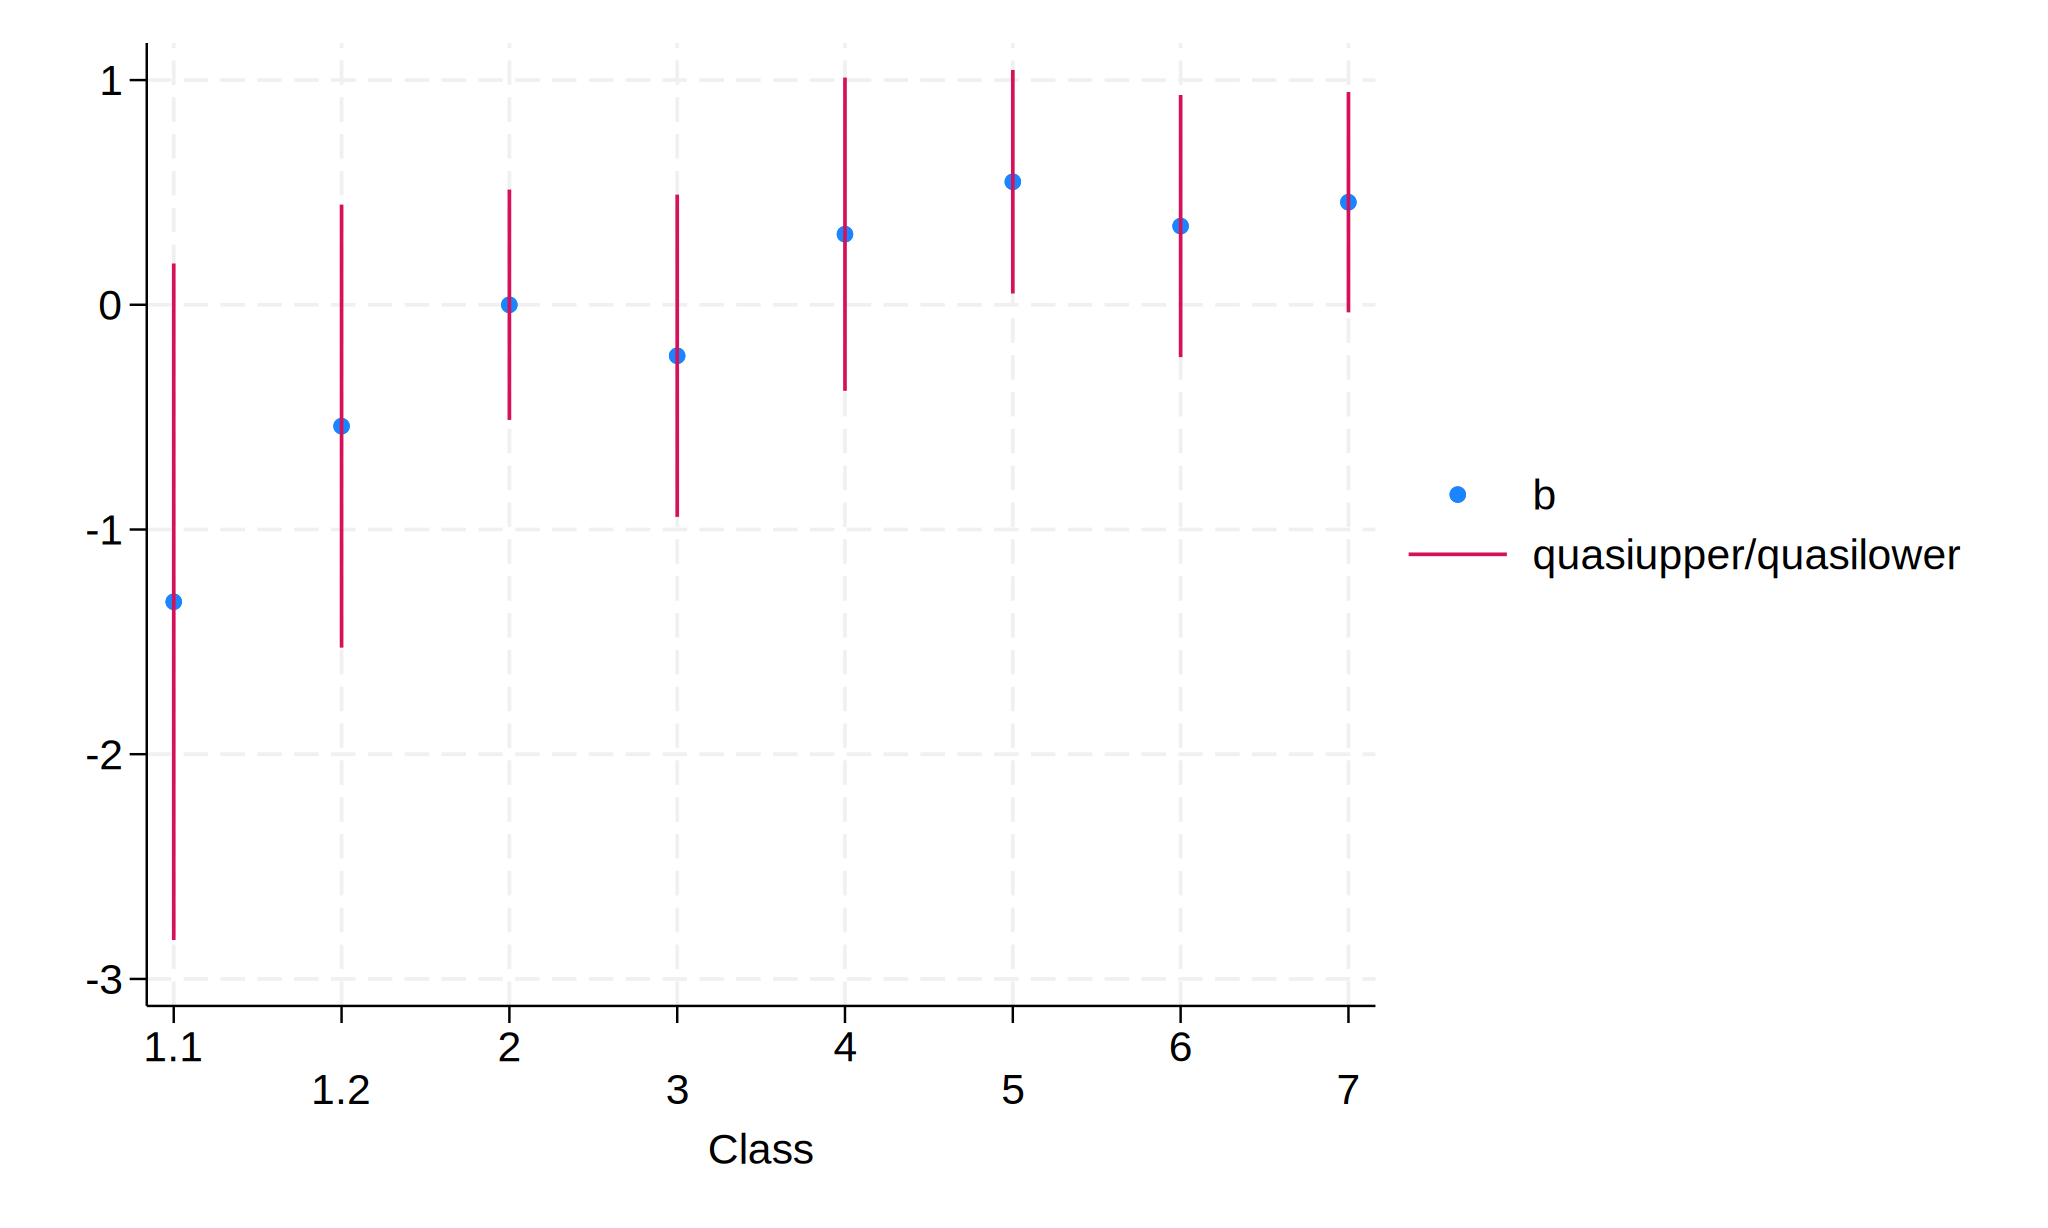

In [30]:
%%stata 

matrix define LB = e(qvlb)
matrix list LB

gen lba=LB[1,1] if _n==6
gen lbb=LB[2,1] if _n==2
gen lbc=LB[3,1] if _n==4
gen lbd=LB[4,1] if _n==8
gen lbe=LB[5,1] if _n==10
gen lbf=LB[6,1] if _n==12
gen lbg=LB[7,1] if _n==14
gen lbh=LB[8,1] if _n==16
egen quasilower = rowtotal(lba lbb lbc lbd lbe lbf lbg lbh)
replace quasilower=. if(quasilower==0)

matrix define UB = e(qvub)
matrix list UB

gen uba=UB[1,1] if _n==6
gen ubb=UB[2,1] if _n==2
gen ubc=UB[3,1] if _n==4
gen ubd=UB[4,1] if _n==8
gen ube=UB[5,1] if _n==10
gen ubf=UB[6,1] if _n==12
gen ubg=UB[7,1] if _n==14
gen ubh=UB[8,1] if _n==16
egen quasiupper = rowtotal(uba ubb ubc ubd ube ubf ubg ubh)
replace quasiupper=. if(quasiupper==0)

gen b=(quasilower+quasiupper)/2

gen group=_n if _n==6
replace group=_n if _n==2
replace group=_n if _n==4
replace group=_n if _n==8
replace group=_n if _n==10
replace group=_n if _n==12
replace group=_n if _n==14
replace group=_n if _n==16

label variable group "Class"
label define region 2 "1.1" 4 "1.2" 6 "2" 8 "3" 10 "4" 12 "5" 14 "6" 16 "7"
label value group region

graph twoway scatter b group ///
|| rspike quasiupper quasilower group, vert   /// 
xlabel(2 4 6 8 10 12 14 16, valuelabel alternate )


. 
. mlogit econ201 i.obin i.female i.htenure i.qvnssec, b(2) 

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -634.68908  
Iteration 2:  Log likelihood = -627.22213  
Iteration 3:  Log likelihood = -626.67022  
Iteration 4:  Log likelihood = -626.57029  
Iteration 5:  Log likelihood = -626.54666  
Iteration 6:  Log likelihood = -626.54157  
Iteration 7:  Log likelihood = -626.54051  
Iteration 8:  Log likelihood = -626.54027  
Iteration 9:  Log likelihood = -626.54021  
Iteration 10: Log likelihood =  -626.5402  

Multinomial logistic regression                         Number of obs =    723
                                                        LR chi2(30)   = 165.10
                                                        Prob > chi2   = 0.0000
Log likelihood = -626.5402                              Pseudo R2     = 0.1164

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z| 

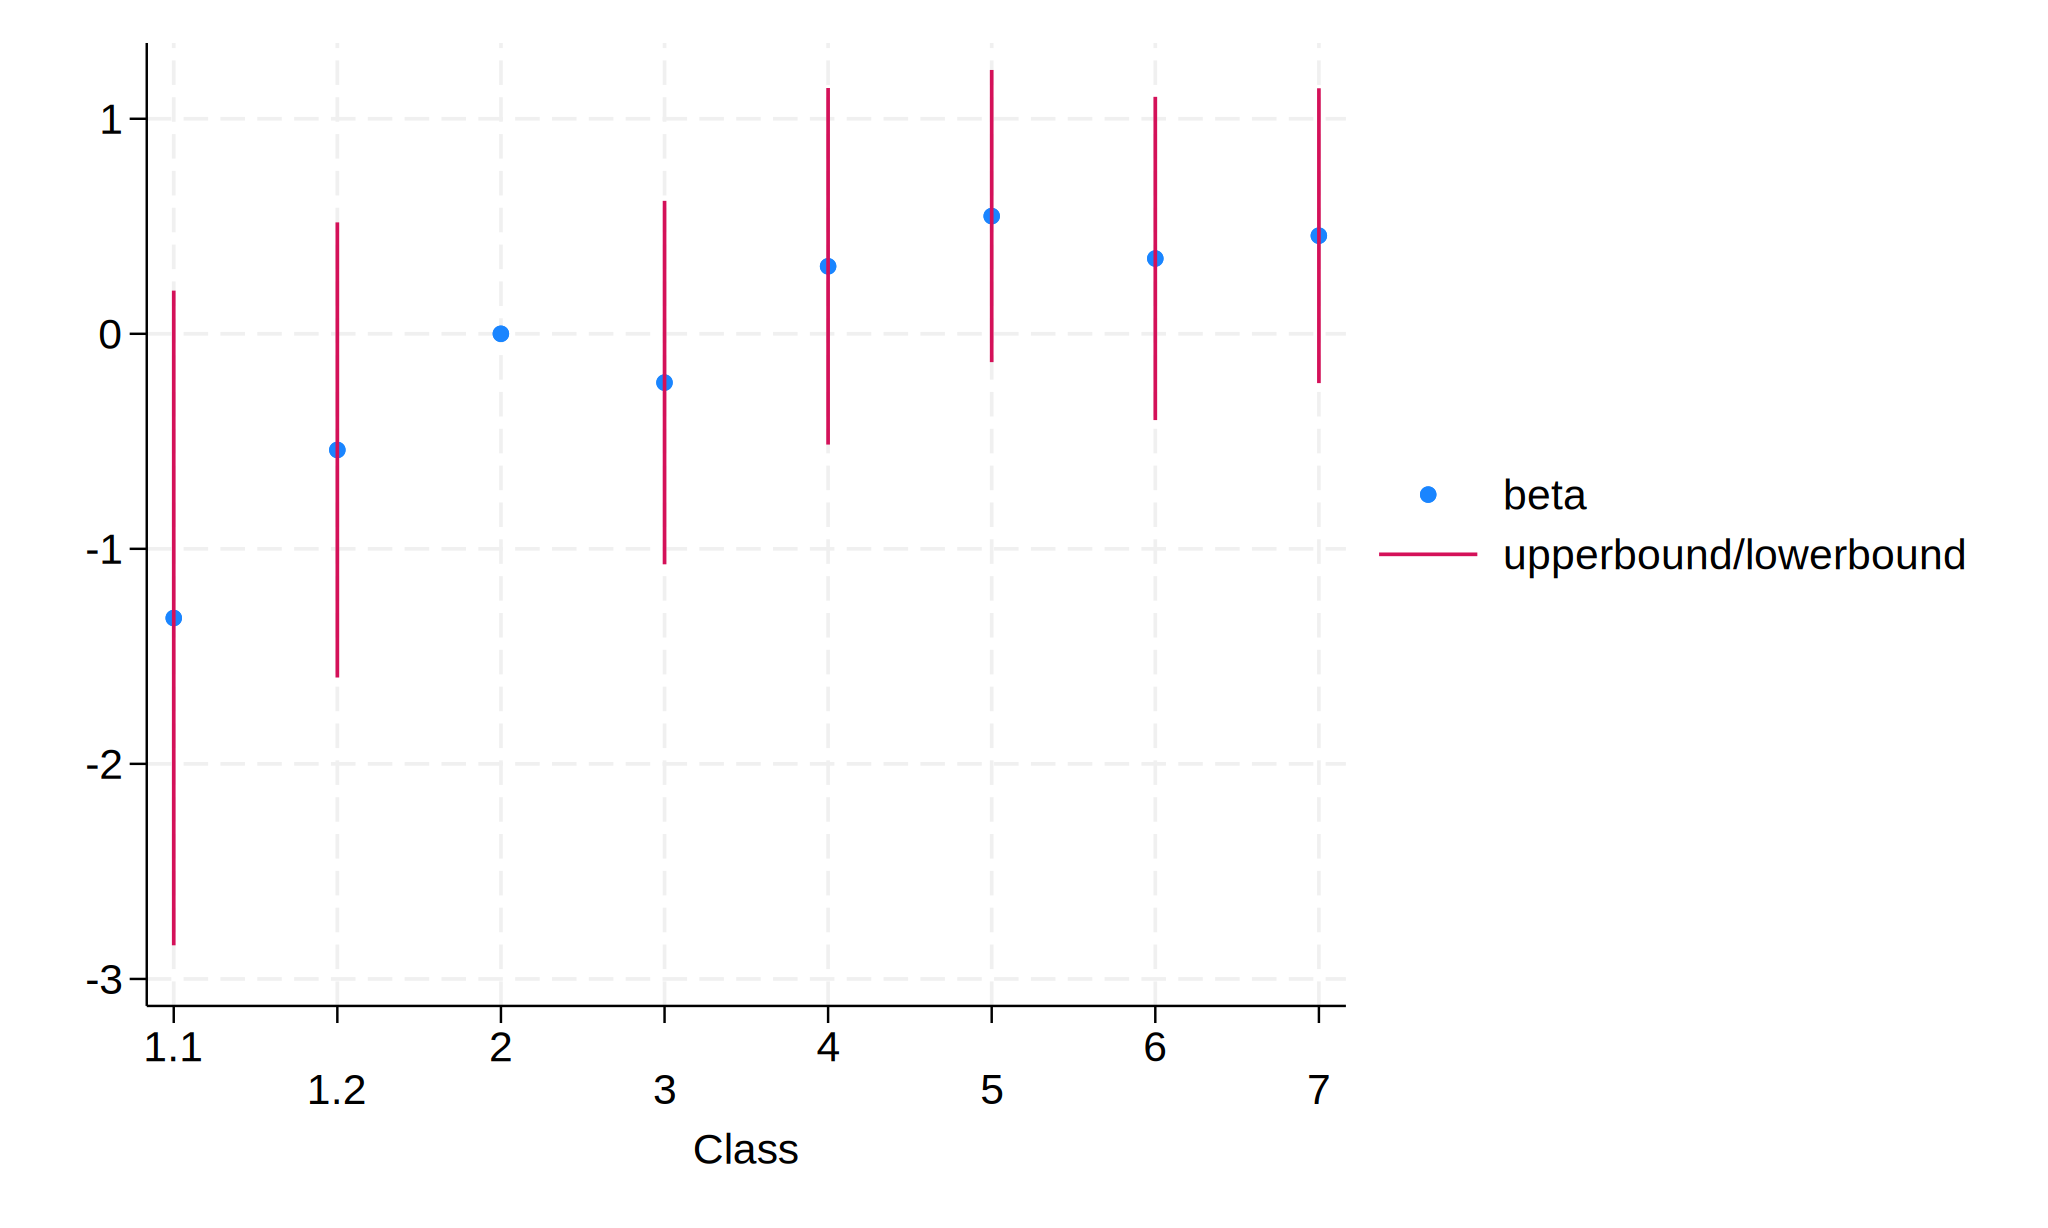

In [31]:
%%stata

mlogit econ201 i.obin i.female i.htenure i.qvnssec, b(2) 
matrix list e(b)
matrix list r(table)
matrix define A = r(table)
matrix define A = A["ll".."ul", 1...]
matrix list A

gen lla=0 if _n==5
gen llb=A[1,8] if _n==1
gen llc=A[1,9] if _n==3
gen lld=A[1,10] if _n==7
gen lle=A[1,11] if _n==9
gen llf=A[1,12] if _n==11
gen llg=A[1,13] if _n==13
gen llh=A[1,14] if _n==15
egen lowerbound = rowtotal(lla llb llc lld lle llf llg llh)

gen ula=0 if _n==5
gen ulb=A[2,8] if _n==1
gen ulc=A[2,9] if _n==3
gen uld=A[2,10] if _n==7
gen ule=A[2,11] if _n==9
gen ulf=A[2,12] if _n==11
gen ulg=A[2,13] if _n==13
gen ulh=A[2,14] if _n==15
egen upperbound = rowtotal(ula ulb ulc uld ule ulf ulg ulh)

gen beta=(lowerbound+upperbound)/2

gen grouping=_n if _n==5
replace grouping=_n if _n==1
replace grouping=_n if _n==3
replace grouping=_n if _n==7
replace grouping=_n if _n==9
replace grouping=_n if _n==11
replace grouping=_n if _n==13
replace grouping=_n if _n==15
label variable grouping "Class"
label define regions 1 "1.1" 3 "1.2" 5 "2" 7 "3" 9 "4" 11 "5" 13 "6" 15 "7"
label value grouping regions

graph twoway scatter beta grouping ///
|| rspike upperbound lowerbound grouping, vert   /// 
xlabel(1 3 5 7 9 11 13 15, valuelabel alternate )


. 
. graph twoway (scatter beta grouping, symbol(Oh) mcolor(black) legend(label(1 
> "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) ||
>  rspike upperbound lowerbound grouping, lcolor(black) || (scatter b group, ms
> ymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 
> "Quasi-Variance Confidence Intervals"))) || rspike quasiupper quasilower grou
> p, lcolor(red) ///
> title("Predictions of Entering Employment Over Education Post-Mandatory Schoo
> ling by Parental NS-SEC", size(small) color(black)) ///
> subtitle("Confidence intervals of regression coefficients, by estimation meth
> od", size(vsmall) color(black)) ///
> note("Data Source: BCS, N=723", size(small) color(black)) ///
> caption("Educational Attainment, Sex, and Housing Tenure included in Model", 
> size(small) color(black)) ///
> xla(1 3 5 7 9 11 13 15, valuelabel alternate )

. 


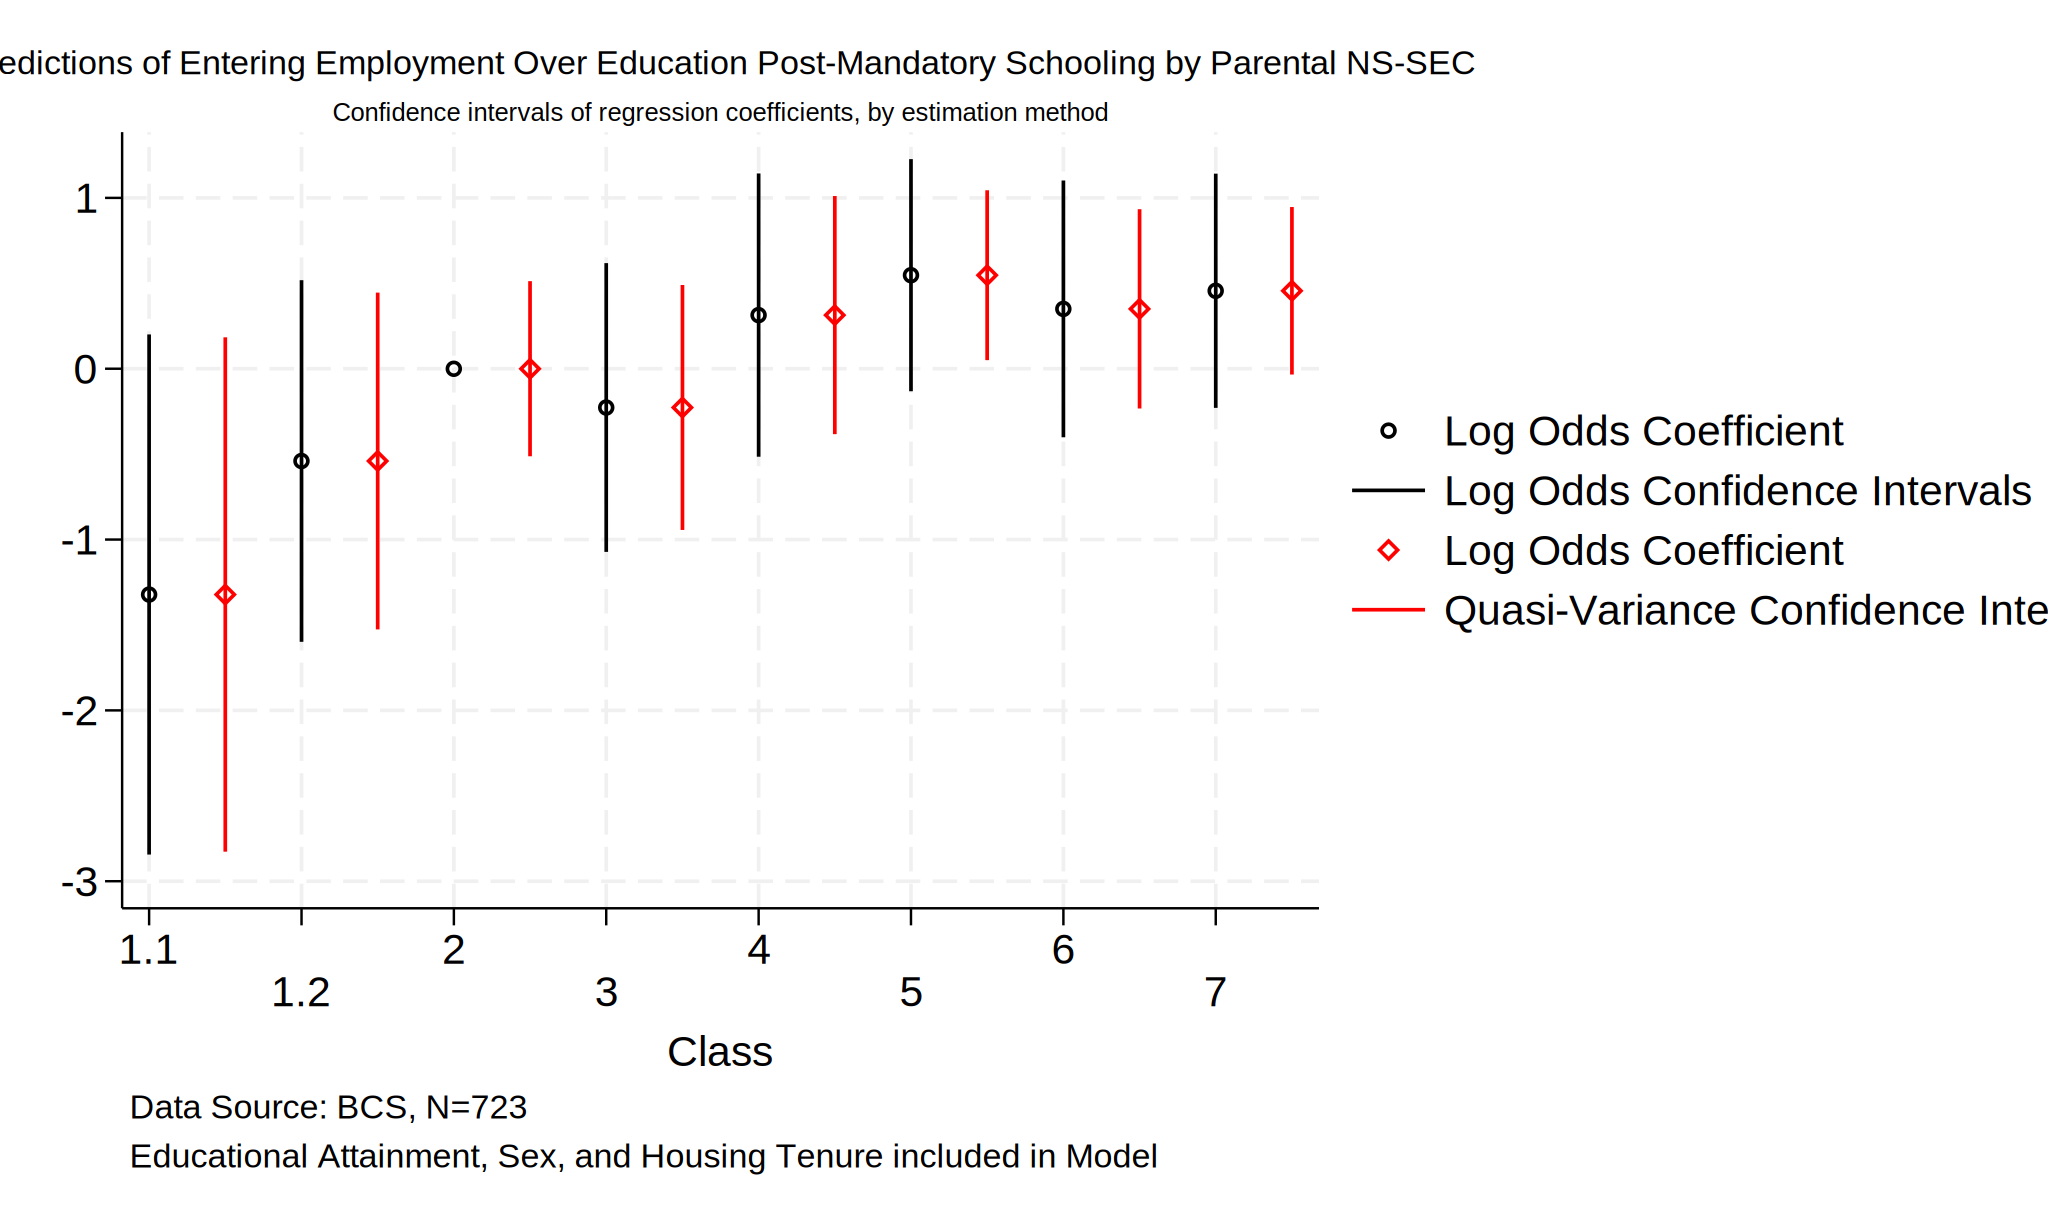

In [32]:
%%stata

graph twoway (scatter beta grouping, symbol(Oh) mcolor(black) legend(label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) || rspike upperbound lowerbound grouping, lcolor(black) || (scatter b group, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspike quasiupper quasilower group, lcolor(red) ///
title("Predictions of Entering Employment Over Education Post-Mandatory Schooling by Parental NS-SEC", size(small) color(black)) ///
subtitle("Confidence intervals of regression coefficients, by estimation method", size(vsmall) color(black)) ///
note("Data Source: BCS, N=723", size(small) color(black)) ///
caption("Educational Attainment, Sex, and Housing Tenure included in Model", size(small) color(black)) ///
xla(1 3 5 7 9 11 13 15, valuelabel alternate )


. 
. gen qvecon1=.
(723 missing values generated)

. replace qvecon1=2 if(econ201==2)
(463 real changes made)

. replace qvecon1=1 if(econ201==3)
(118 real changes made)

. replace qvecon1=4 if(econ201==1)
(122 real changes made)

. replace qvecon1=3 if(econ201==4)
(20 real changes made)

. 
. label define qvecon1_lbl 4"Employment" 2"School" 1"Training & Apprenticeships
> " 3"Unemployment & OLF"

. label values qvecon1 qvecon1_lbl

. 
. mlogit qvecon1 i.obin i.female i.htenure i.qvnssec, b(2)

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -634.68908  
Iteration 2:  Log likelihood = -627.22213  
Iteration 3:  Log likelihood = -626.67022  
Iteration 4:  Log likelihood = -626.57029  
Iteration 5:  Log likelihood = -626.54666  
Iteration 6:  Log likelihood = -626.54157  
Iteration 7:  Log likelihood = -626.54051  
Iteration 8:  Log likelihood = -626.54027  
Iteration 9:  Log likelihood = -626.54021  
Iteration 10: Log likelihood =  -626.5402  

Multinomial log

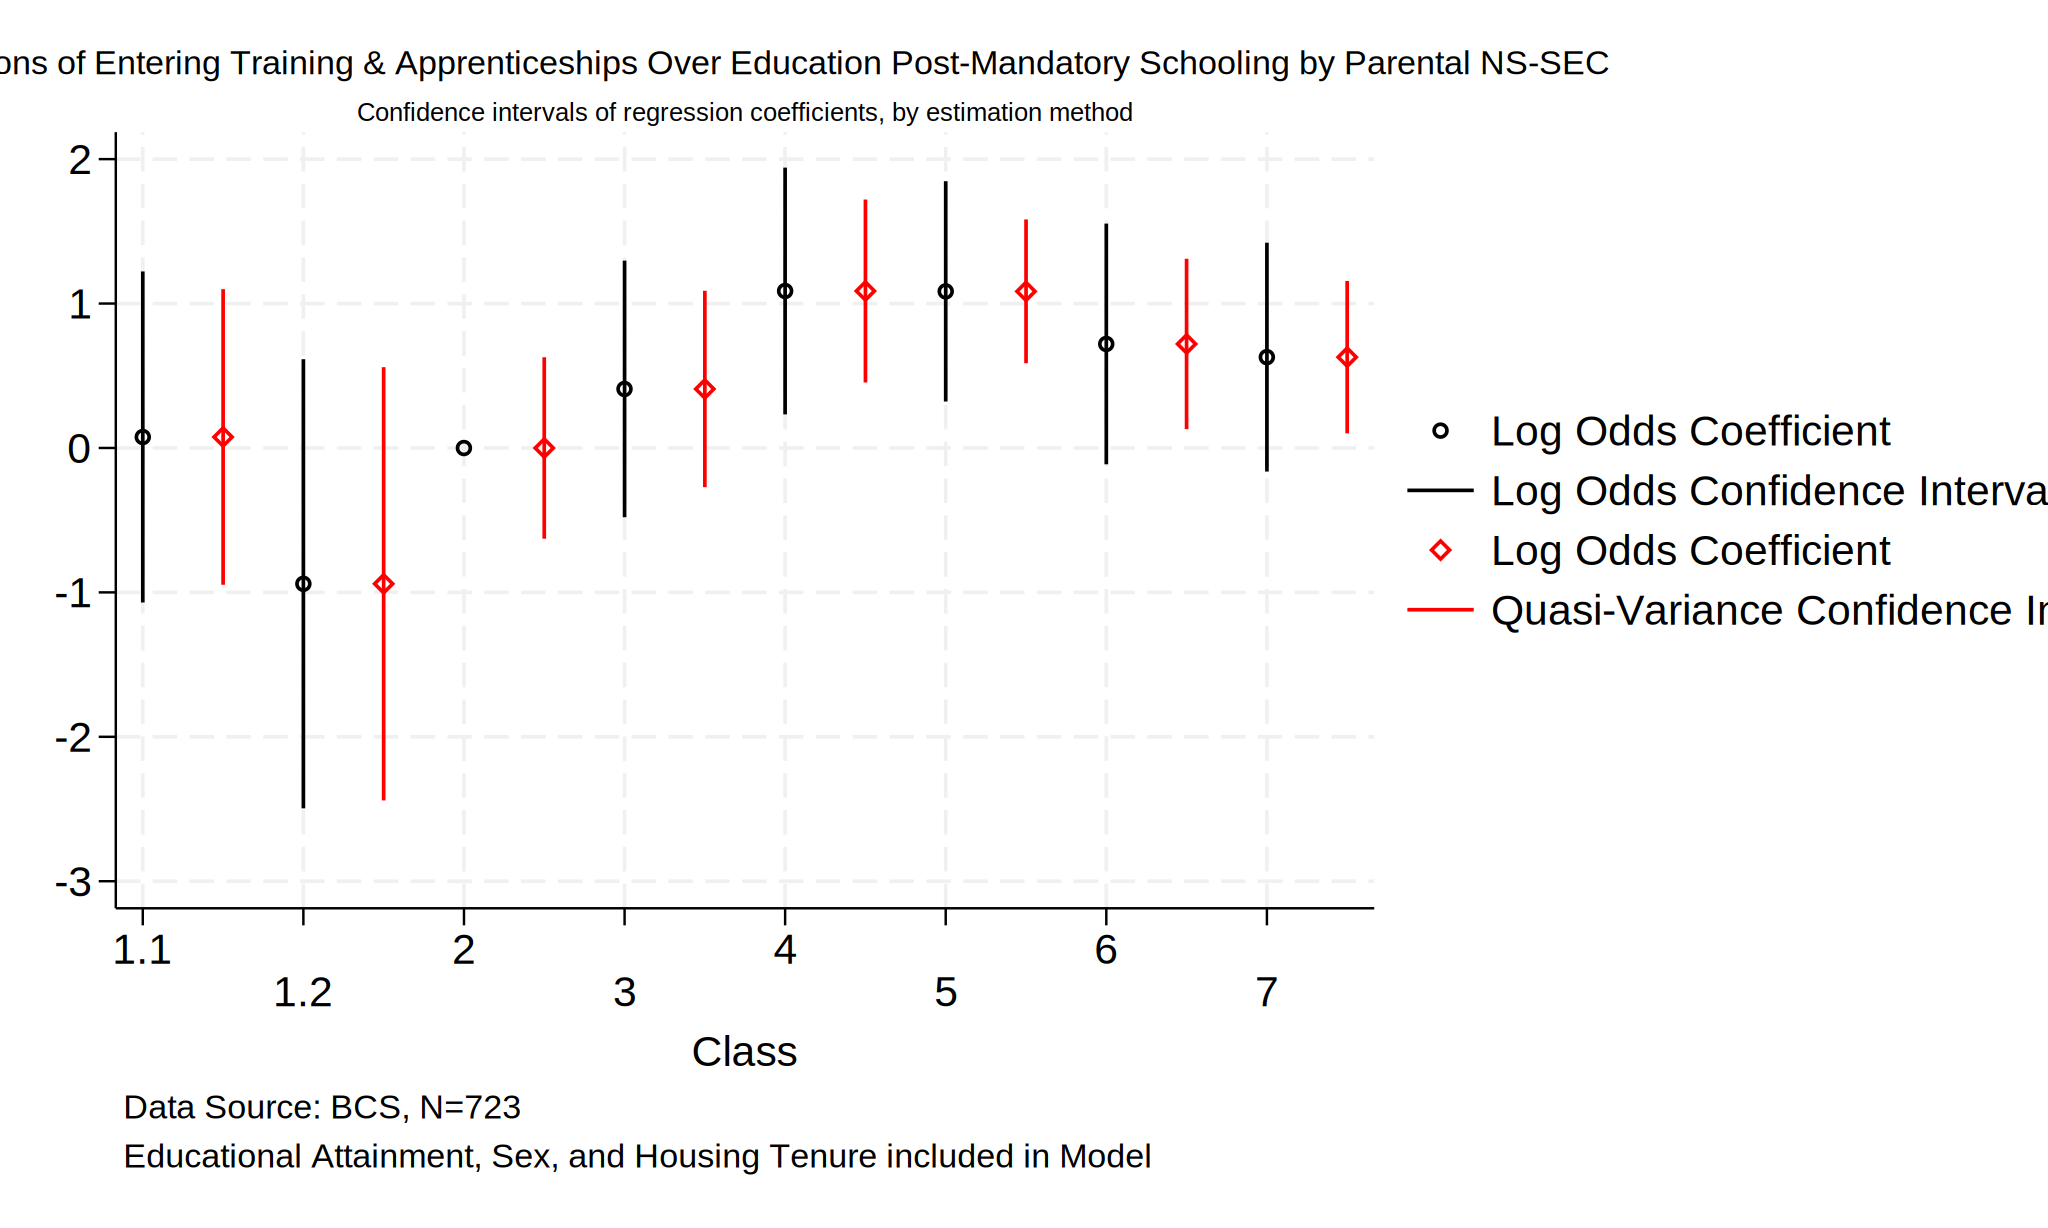

In [33]:
%%stata

gen qvecon1=.
replace qvecon1=2 if(econ201==2)
replace qvecon1=1 if(econ201==3)
replace qvecon1=4 if(econ201==1)
replace qvecon1=3 if(econ201==4)

label define qvecon1_lbl 4"Employment" 2"School" 1"Training & Apprenticeships" 3"Unemployment & OLF"
label values qvecon1 qvecon1_lbl

mlogit qvecon1 i.obin i.female i.htenure i.qvnssec, b(2)

qv i.qvnssec

matrix define LBtwo = e(qvlb)
matrix list LBtwo

gen lbatwo=LBtwo[1,1] if _n==6
gen lbbtwo=LBtwo[2,1] if _n==2
gen lbctwo=LBtwo[3,1] if _n==4
gen lbdtwo=LBtwo[4,1] if _n==8
gen lbetwo=LBtwo[5,1] if _n==10
gen lbftwo=LBtwo[6,1] if _n==12
gen lbgtwo=LBtwo[7,1] if _n==14
gen lbhtwo=LBtwo[8,1] if _n==16
egen quasilowertwo = rowtotal(lbatwo lbbtwo lbctwo lbdtwo lbetwo lbftwo lbgtwo lbhtwo)
replace quasilowertwo=. if(quasilowertwo==0)

matrix define UBtwo = e(qvub)
matrix list UBtwo

gen ubatwo=UBtwo[1,1] if _n==6
gen ubbtwo=UBtwo[2,1] if _n==2
gen ubctwo=UBtwo[3,1] if _n==4
gen ubdtwo=UBtwo[4,1] if _n==8
gen ubetwo=UBtwo[5,1] if _n==10
gen ubftwo=UBtwo[6,1] if _n==12
gen ubgtwo=UBtwo[7,1] if _n==14
gen ubhtwo=UBtwo[8,1] if _n==16
egen quasiuppertwo = rowtotal(ubatwo ubbtwo ubctwo ubdtwo ubetwo ubftwo ubgtwo ubhtwo)
replace quasiuppertwo=. if(quasiuppertwo==0)

gen btwo=(quasilowertwo+quasiuppertwo)/2

gen grouptwo=_n if _n==6
replace grouptwo=_n if _n==2
replace grouptwo=_n if _n==4
replace grouptwo=_n if _n==8
replace grouptwo=_n if _n==10
replace grouptwo=_n if _n==12
replace grouptwo=_n if _n==14
replace grouptwo=_n if _n==16

label variable grouptwo "Class"
label define regiontwo 2 "1.1" 4 "1.2" 6 "2" 8 "3" 10 "4" 12 "5" 14 "6" 16 "7"
label value grouptwo regiontwo

graph twoway scatter btwo grouptwo ///
|| rspike quasiuppertwo quasilowertwo grouptwo, vert   /// 
xlabel(2 4 6 8 10 12 14 16, valuelabel alternate )

mlogit qvecon1 i.obin i.female i.htenure i.qvnssec, b(2)

matrix list e(b)
matrix list r(table)
matrix define Atwo = r(table)
matrix define Atwo = Atwo["ll".."ul", 1...]
matrix list Atwo

gen llatwo=0 if _n==15
gen llbtwo=Atwo[1,8] if _n==1
gen llctwo=Atwo[1,9] if _n==3
gen lldtwo=Atwo[1,10] if _n==7
gen lletwo=Atwo[1,11] if _n==9
gen llftwo=Atwo[1,12] if _n==11
gen llgtwo=Atwo[1,13] if _n==13
gen llhtwo=Atwo[1,14] if _n==15
egen lowerboundtwo = rowtotal(llatwo llbtwo llctwo lldtwo lletwo llftwo llgtwo llhtwo)

gen ulatwo=0 if _n==5
gen ulbtwo=Atwo[2,8] if _n==1
gen ulctwo=Atwo[2,9] if _n==3
gen uldtwo=Atwo[2,10] if _n==7
gen uletwo=Atwo[2,11] if _n==9
gen ulftwo=Atwo[2,12] if _n==11
gen ulgtwo=Atwo[2,13] if _n==13
gen ulhtwo=Atwo[2,14] if _n==15
egen upperboundtwo = rowtotal(ulatwo ulbtwo ulctwo uldtwo uletwo ulftwo ulgtwo ulhtwo)

gen betatwo=(lowerboundtwo+upperboundtwo)/2

gen groupingtwo=_n if _n==5
replace groupingtwo=_n if _n==1
replace groupingtwo=_n if _n==3
replace groupingtwo=_n if _n==7
replace groupingtwo=_n if _n==9
replace groupingtwo=_n if _n==11
replace groupingtwo=_n if _n==13
replace groupingtwo=_n if _n==15
label variable groupingtwo "Class"
label define regionstwo 1 "1.1" 3 "1.2" 5 "2" 7 "3" 9 "4" 11 "5" 13 "6" 15 "7"
label value groupingtwo regionstwo

graph twoway scatter betatwo groupingtwo ///
|| rspike upperboundtwo lowerboundtwo groupingtwo, vert   /// 
xlabel(1 3 5 7 9 11 13 15, valuelabel alternate )

graph twoway (scatter betatwo groupingtwo, symbol(Oh) mcolor(black) legend(label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) || rspike upperboundtwo lowerboundtwo groupingtwo, lcolor(black) || (scatter btwo grouptwo, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspike quasiuppertwo quasilowertwo grouptwo, lcolor(red) ///
title("Predictions of Entering Training & Apprenticeships Over Education Post-Mandatory Schooling by Parental NS-SEC", size(small) color(black)) ///
subtitle("Confidence intervals of regression coefficients, by estimation method", size(vsmall) color(black)) ///
note("Data Source: BCS, N=723", size(small) color(black)) ///
caption("Educational Attainment, Sex, and Housing Tenure included in Model", size(small) color(black)) ///
xla(1 3 5 7 9 11 13 15, valuelabel alternate )


. 
. gen qvecon2=.
(723 missing values generated)

. replace qvecon2=1 if(econ201==4)
(20 real changes made)

. replace qvecon2=3 if(econ201==3)
(118 real changes made)

. replace qvecon2=4 if(econ201==1)
(122 real changes made)

. replace qvecon2=2 if(econ201==2)
(463 real changes made)

. 
. label define qvecon2_lbl 3"Training & Apprenticeships" 4"Employment" 2"School
> " 1"Unemployment & OLF"

. label values qvecon2 qvecon2_lbl

. 
. mlogit qvecon2 i.obin i.female i.htenure i.qvnssec, b(2)

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -634.68908  
Iteration 2:  Log likelihood = -627.22213  
Iteration 3:  Log likelihood = -626.67022  
Iteration 4:  Log likelihood = -626.57029  
Iteration 5:  Log likelihood = -626.54666  
Iteration 6:  Log likelihood = -626.54157  
Iteration 7:  Log likelihood = -626.54051  
Iteration 8:  Log likelihood = -626.54027  
Iteration 9:  Log likelihood = -626.54021  
Iteration 10: Log likelihood =  -626.5402  

Multinomial log

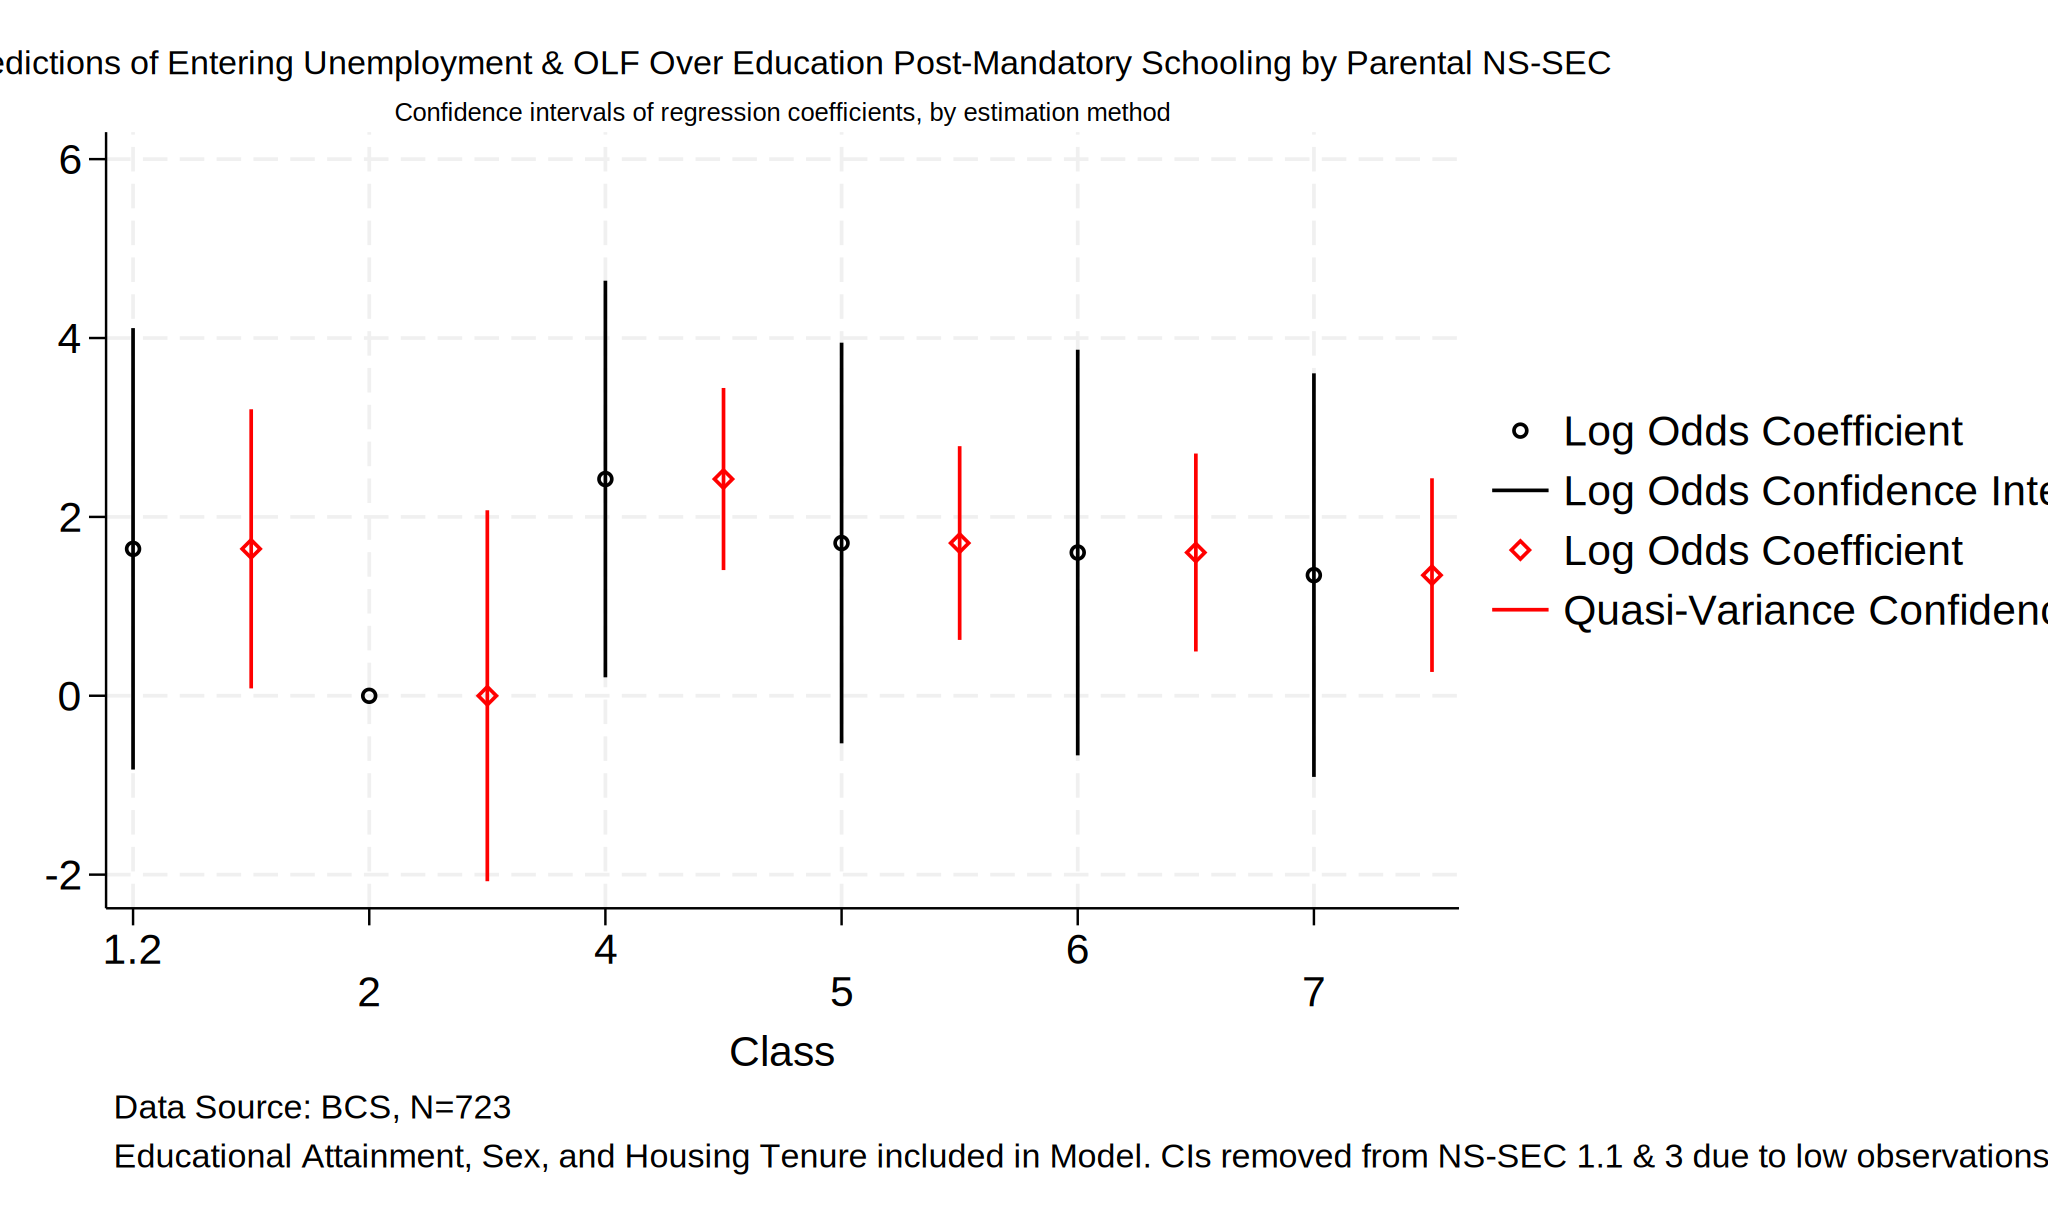

In [34]:
%%stata

gen qvecon2=.
replace qvecon2=1 if(econ201==4)
replace qvecon2=3 if(econ201==3)
replace qvecon2=4 if(econ201==1)
replace qvecon2=2 if(econ201==2)

label define qvecon2_lbl 3"Training & Apprenticeships" 4"Employment" 2"School" 1"Unemployment & OLF"
label values qvecon2 qvecon2_lbl

mlogit qvecon2 i.obin i.female i.htenure i.qvnssec, b(2)

qv i.qvnssec

matrix define LBthree = e(qvlb)
matrix list LBthree

gen lbathree=LBthree[1,1] if _n==6
gen lbcthree=LBthree[3,1] if _n==4
gen lbdthree=LBthree[5,1] if _n==8
gen lbfthree=LBthree[6,1] if _n==10
gen lbgthree=LBthree[7,1] if _n==12
gen lbhthree=LBthree[8,1] if _n==14
egen quasilowerthree = rowtotal(lbathree lbcthree lbdthree lbfthree lbgthree lbhthree)
replace quasilowerthree=. if(quasilowerthree==0)

matrix define UBthree = e(qvub)
matrix list UBthree

gen ubathree=UBthree[1,1] if _n==6
gen ubcthree=UBthree[3,1] if _n==4
gen ubdthree=UBthree[5,1] if _n==8
gen ubfthree=UBthree[6,1] if _n==10
gen ubgthree=UBthree[7,1] if _n==12
gen ubhthree=UBthree[8,1] if _n==14
egen quasiupperthree = rowtotal(ubathree ubcthree ubdthree ubfthree ubgthree ubhthree)
replace quasiupperthree=. if(quasiupperthree==0)

gen bthree=(quasilowerthree+quasiupperthree)/2

gen groupthree=_n if _n==6
replace groupthree=_n if _n==4
replace groupthree=_n if _n==8
replace groupthree=_n if _n==10
replace groupthree=_n if _n==12
replace groupthree=_n if _n==14

label variable groupthree "Class"
label define regionthree 4 "1.2" 6 "2" 8 "4" 10 "5" 12 "6" 14 "7"
label value groupthree regionthree

graph twoway scatter bthree groupthree ///
|| rspike quasiupperthree quasilowerthree groupthree, vert   /// 
xlabel(4 6 8 10 12 14, valuelabel alternate )

mlogit qvecon2 i.obin i.female i.htenure i.qvnssec, b(2)

matrix list e(b)
matrix list r(table)
matrix define Athree = r(table)
matrix define Athree = Athree["ll".."ul", 1...]
matrix list Athree

gen llathree=0 if _n==5
gen llcthree=Athree[1,9] if _n==3
gen lldthree=Athree[1,11] if _n==7
gen llfthree=Athree[1,12] if _n==9
gen llgthree=Athree[1,13] if _n==11
gen llhthree=Athree[1,14] if _n==13
egen lowerboundthree = rowtotal(llathree llcthree lldthree llfthree llgthree llhthree)

gen ulathree=0 if _n==5
gen ulcthree=Athree[2,9] if _n==3
gen uldthree=Athree[2,11] if _n==7
gen ulfthree=Athree[2,12] if _n==9
gen ulgthree=Athree[2,13] if _n==11
gen ulhthree=Athree[2,14] if _n==13
egen upperboundthree = rowtotal(ulathree ulcthree uldthree ulfthree ulgthree ulhthree)

gen betathree=(lowerboundthree+upperboundthree)/2

gen groupingthree=_n if _n==5
replace groupingthree=_n if _n==3
replace groupingthree=_n if _n==7
replace groupingthree=_n if _n==9
replace groupingthree=_n if _n==11
replace groupingthree=_n if _n==13
label variable groupingthree "Class"
label define regionsthree 3 "1.2" 5 "2" 7 "4" 9 "5" 11 "6" 13 "7"
label value groupingthree regionsthree

graph twoway scatter betathree groupingthree ///
|| rspike upperboundthree lowerboundthree groupingthree, vert   /// 
xlabel(3 5 7 9 11 13, valuelabel alternate )

graph twoway (scatter betathree groupingthree, symbol(Oh) mcolor(black) legend(label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) || rspike upperboundthree lowerboundthree groupingthree, lcolor(black) || (scatter bthree groupthree, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspike quasiupperthree quasilowerthree groupthree, lcolor(red) ///
title("Predictions of Entering Unemployment & OLF Over Education Post-Mandatory Schooling by Parental NS-SEC", size(small) color(black)) ///
subtitle("Confidence intervals of regression coefficients, by estimation method", size(vsmall) color(black)) ///
note("Data Source: BCS, N=723", size(small) color(black)) ///
caption("Educational Attainment, Sex, and Housing Tenure included in Model. CIs removed from NS-SEC 1.1 & 3 due to low observations in categories.", size(small) color(black)) ///
xla(3 5 7 9 11 13, valuelabel alternate )

### Sensitivity Analysis

In [35]:
%%stata 

mlogit econ201 i.obin i.htenure i.female camsisdom, b(2)

est store modeltwo

etable, append


. 
. mlogit econ201 i.obin i.htenure i.female camsisdom, b(2)

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -643.04401  
Iteration 2:  Log likelihood = -639.78037  
Iteration 3:  Log likelihood =  -639.6685  
Iteration 4:  Log likelihood = -639.66778  
Iteration 5:  Log likelihood = -639.66778  

Multinomial logistic regression                         Number of obs =    723
                                                        LR chi2(12)   = 138.85
                                                        Prob > chi2   = 0.0000
Log likelihood = -639.66778                             Pseudo R2     = 0.0979

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |
        obin |
Five or M..  |  -1.350276   .2414568    -5.59   0.000    -1.823523   -.8770295
        

In [36]:
%%stata

mlogit econ201 i.obin i.htenure i.female ib(2).rgscdom, b(2)

est store modelthree

etable, append


. 
. mlogit econ201 i.obin i.htenure i.female ib(2).rgscdom, b(2)

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -637.12209  
Iteration 2:  Log likelihood = -630.04893  
Iteration 3:  Log likelihood =  -629.5128  
Iteration 4:  Log likelihood = -629.43246  
Iteration 5:  Log likelihood = -629.41512  
Iteration 6:  Log likelihood =  -629.4109  
Iteration 7:  Log likelihood = -629.41001  
Iteration 8:  Log likelihood = -629.40982  
Iteration 9:  Log likelihood = -629.40978  
Iteration 10: Log likelihood = -629.40977  

Multinomial logistic regression                         Number of obs =    723
                                                        LR chi2(24)   = 159.36
                                                        Prob > chi2   = 0.0000
Log likelihood = -629.40977                             Pseudo R2     = 0.1124

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|

In [37]:
%%stata

collect style showbase all

collect label levels etable_depvar 1 "NS-SEC" ///
								   2 "CAMSIS" ///
								   3 "RGSC", modify

collect style cell, font(Times New Roman)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 2: CCA") ///
		titlestyles(font(Arial Narrow, size(14) bold)) ///
		note("Data Source: BCS") ///
		notestyles(font(Arial Narrow, size(10) italic)) ///
		export("BCS_CCA_Subsample.docx", replace)  


. 
. collect style showbase all

. 
. collect label levels etable_depvar 1 "NS-SEC" ///
>                                                                    2 "CAMSIS"
>  ///
>                                                                    3 "RGSC", 
> modify

. 
. collect style cell, font(Times New Roman)

. 
. etable, replay column(depvar) ///
> cstat(_r_b, nformat(%4.2f))  ///
>                 cstat(_r_se, nformat(%6.2f))  ///
>                 showstars showstarsnote  ///
>                 stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
>                 mstat(N) mstat(aic) mstat(bic) mstat(r2_a)      ///
>                 title("Table 2: CCA") ///
>                 titlestyles(font(Arial Narrow, size(14) bold)) ///
>                 note("Data Source: BCS") ///
>                 notestyles(font(Arial Narrow, size(10) italic)) ///
>                 export("BCS_CCA_Subsample.docx", replace)  

Table 2: CCA
------------------------------------------------------------------

In [38]:
%%stata

mlogit econ201 i.obin i.htenure i.female ib(3).nssecdom, b(2)

margins, dydx(*) post

est store modelfour

etable, append

mlogit econ201 i.obin i.htenure i.female camsisdom, b(2)

margins, dydx(*) post

est store modelfive

etable, append

mlogit econ201 i.obin i.htenure i.female ib(2).rgscdom, b(2)

margins, dydx(*) post

est store modelsix

etable, append


. 
. mlogit econ201 i.obin i.htenure i.female ib(3).nssecdom, b(2)

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -634.68908  
Iteration 2:  Log likelihood = -627.22213  
Iteration 3:  Log likelihood = -626.67022  
Iteration 4:  Log likelihood = -626.57029  
Iteration 5:  Log likelihood = -626.54666  
Iteration 6:  Log likelihood = -626.54157  
Iteration 7:  Log likelihood = -626.54051  
Iteration 8:  Log likelihood = -626.54027  
Iteration 9:  Log likelihood = -626.54021  
Iteration 10: Log likelihood =  -626.5402  

Multinomial logistic regression                         Number of obs =    723
                                                        LR chi2(30)   = 165.10
                                                        Prob > chi2   = 0.0000
Log likelihood = -626.5402                              Pseudo R2     = 0.1164

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>

In [39]:
%%stata

collect style showbase all

collect label levels etable_depvar 1 "NS-SEC" ///
								   2 "CAMSIS" ///
								   3 "RGSC" ///
								   4 "NS-SEC margins" ///
								   5 "CAMSIS margins" ///
								   6 "RGSC margins", modify

collect style cell, font(Times New Roman)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 2: CCA") ///
		titlestyles(font(Arial Narrow, size(14) bold)) ///
		note("Data Source: BCS") ///
		notestyles(font(Arial Narrow, size(10) italic)) ///
		export("BCS_CCA_Subsample_Margins.docx", replace)  


. 
. collect style showbase all

. 
. collect label levels etable_depvar 1 "NS-SEC" ///
>                                                                    2 "CAMSIS"
>  ///
>                                                                    3 "RGSC" /
> //
>                                                                    4 "NS-SEC 
> margins" ///
>                                                                    5 "CAMSIS 
> margins" ///
>                                                                    6 "RGSC ma
> rgins", modify

. 
. collect style cell, font(Times New Roman)

. 
. etable, replay column(depvar) ///
> cstat(_r_b, nformat(%4.2f))  ///
>                 cstat(_r_se, nformat(%6.2f))  ///
>                 showstars showstarsnote  ///
>                 stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
>                 mstat(N) mstat(aic) mstat(bic) mstat(r2_a)      ///
>                 title("Table 2: CCA") ///
>                 titlestyles(font(Arial Narr

### Marginal Effects Graphs


. 
. mlogit econ201 i.obin i.female i.htenure ib(3).nssecdom, b(2)

Iteration 0:  Log likelihood = -709.09124  
Iteration 1:  Log likelihood = -634.68908  
Iteration 2:  Log likelihood = -627.22213  
Iteration 3:  Log likelihood = -626.67022  
Iteration 4:  Log likelihood = -626.57029  
Iteration 5:  Log likelihood = -626.54666  
Iteration 6:  Log likelihood = -626.54157  
Iteration 7:  Log likelihood = -626.54051  
Iteration 8:  Log likelihood = -626.54027  
Iteration 9:  Log likelihood = -626.54021  
Iteration 10: Log likelihood =  -626.5402  

Multinomial logistic regression                         Number of obs =    723
                                                        LR chi2(30)   = 165.10
                                                        Prob > chi2   = 0.0000
Log likelihood = -626.5402                              Pseudo R2     = 0.1164

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>

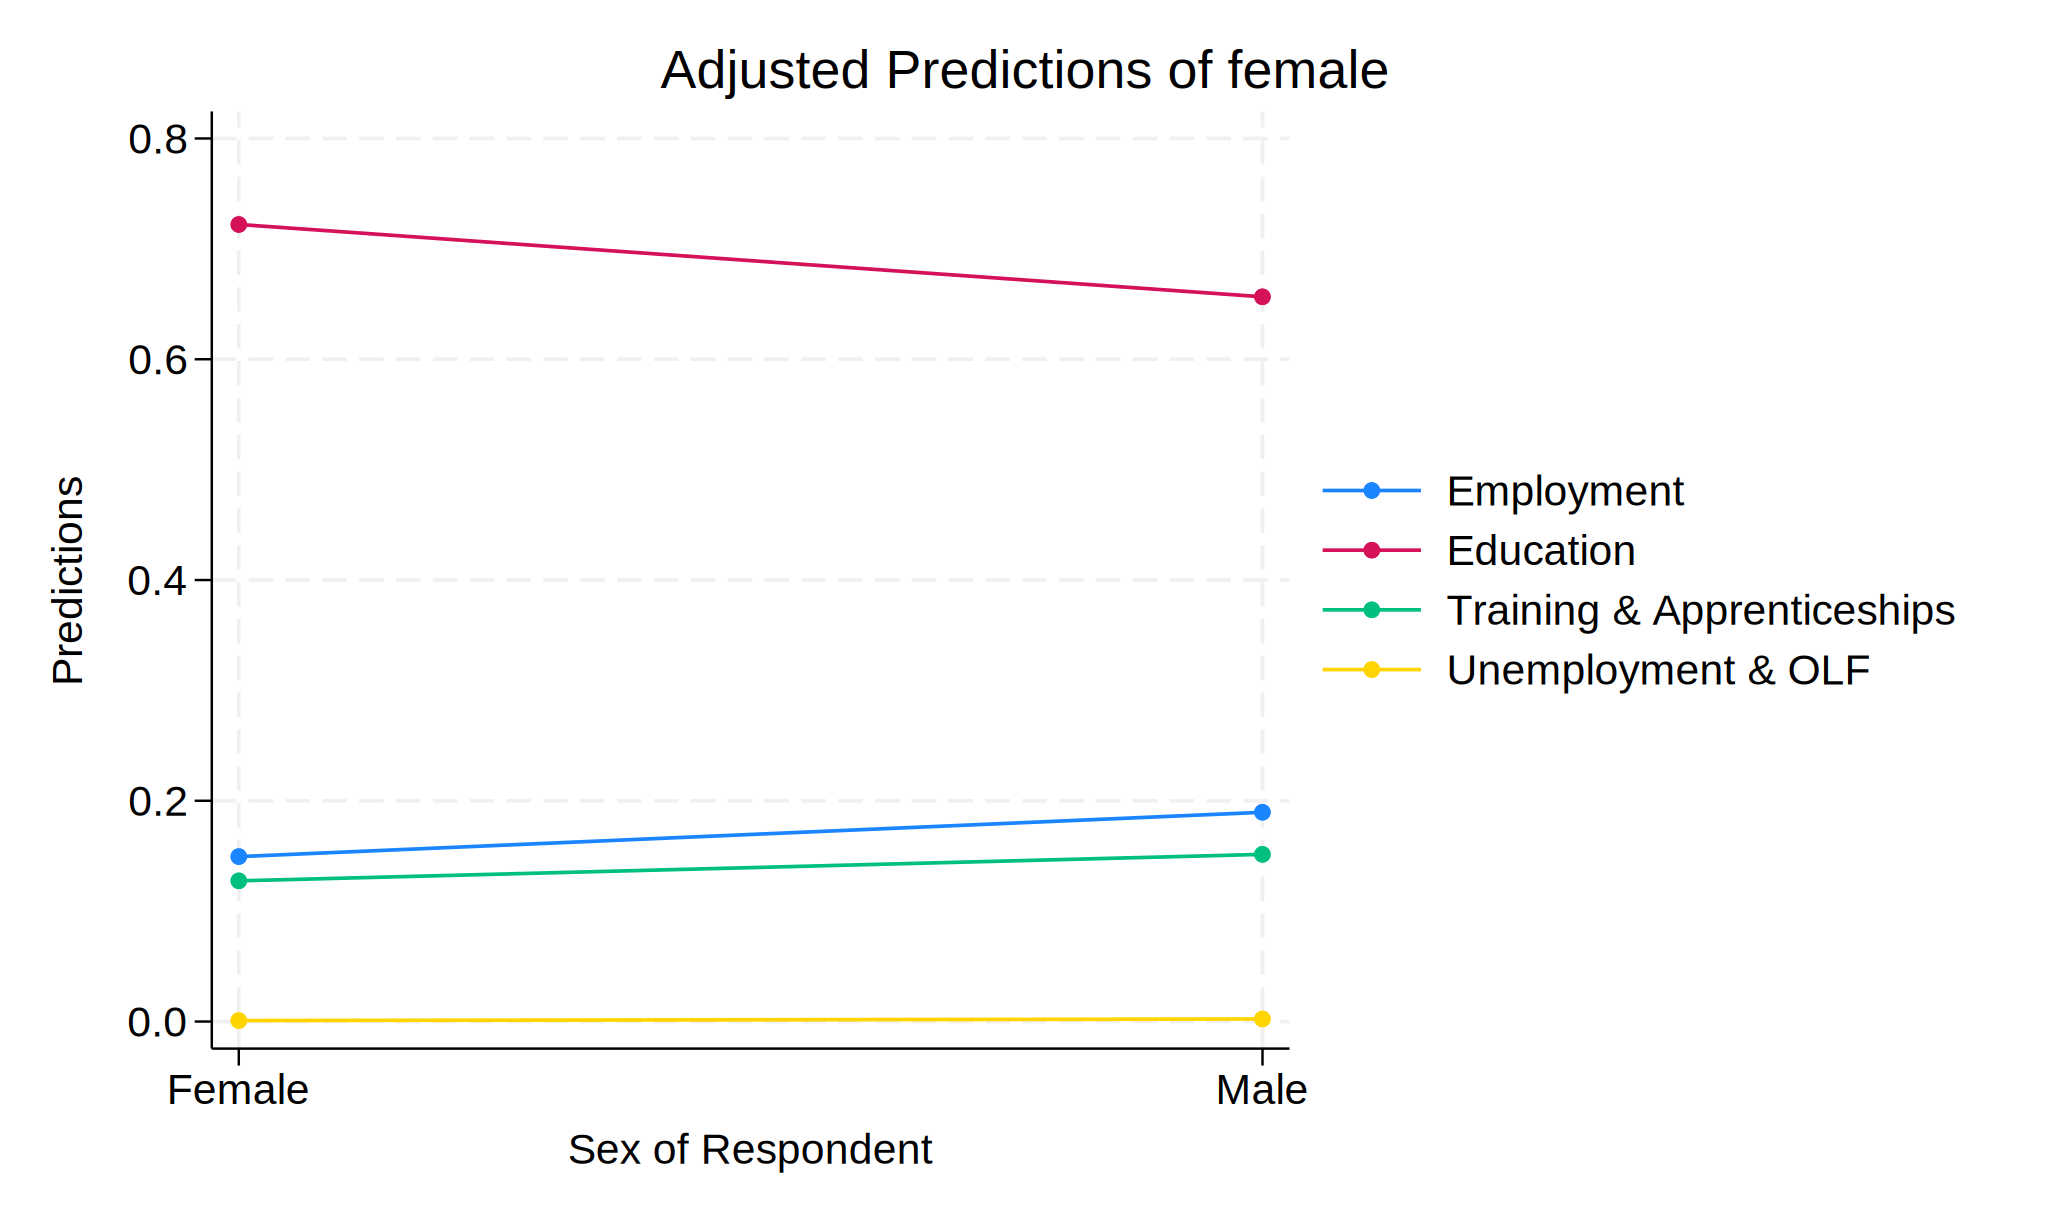

In [40]:
%%stata

mlogit econ201 i.obin i.female i.htenure ib(3).nssecdom, b(2)

margins nssecdom, atmeans predict(outcome(1)) saving(file1, replace)
margins nssecdom, atmeans predict(outcome(2)) saving(file2, replace)
margins nssecdom, atmeans predict(outcome(3)) saving(file3, replace)
margins nssecdom, atmeans predict(outcome(4)) saving(file4, replace)

combomarginsplot file1 file2 file3 file4, labels("Employment" "Education" "Training & Apprenticeships" "Unemployment & OLF") noci

margins obin, atmeans predict(outcome(1)) saving(file5, replace)
margins obin, atmeans predict(outcome(2)) saving(file6, replace)
margins obin, atmeans predict(outcome(3)) saving(file7, replace)
margins obin, atmeans predict(outcome(4)) saving(file8, replace)

combomarginsplot file5 file6 file7 file8, labels("Employment" "Education" "Training & Apprenticeships" "Unemployment & OLF") noci

margins female, atmeans predict(outcome(1)) saving(file9, replace)
margins female, atmeans predict(outcome(2)) saving(file10, replace)
margins female, atmeans predict(outcome(3)) saving(file11, replace)
margins female, atmeans predict(outcome(4)) saving(file12, replace)

combomarginsplot file9 file10 file11 file12, labels("Employment" "Education" "Training & Apprenticeships" "Unemployment & OLF") noci

margins htenure, atmeans predict(outcome(1)) saving(file13, replace)
margins htenure, atmeans predict(outcome(2)) saving(file14, replace)
margins htenure, atmeans predict(outcome(3)) saving(file15, replace)
margins htenure, atmeans predict(outcome(4)) saving(file16, replace)



In [41]:
%%stata

save cca_subsample_complete, replace


. 
. save cca_subsample_complete, replace
file cca_subsample_complete.dta saved

. 


The amount of missingness in the proposed model exceeds 50 per cent. Which is greater than the suggested threshold of missingness for multiple imputation to be effective. Multiple Imputation will still go ahead but will be looked at in comparison to a CRA, a model where all msisingness for educational attainment =1 and another where all missiness for educational attainment =0.

In [42]:
%%stata

use "G:\Stata data and do\do files\PhD Chapters\Chapter Two\BCS_Variables_Complete"

gen obinzero=obin
replace obinzero = 0 if missing(obinzero)

gen obinone=obin
replace obinone = 1 if missing(obinone)

label values obinzero obin_lbl
label values obinone obin_lbl

tab obinzero 

tab obinone



. 
. use "G:\Stata data and do\do files\PhD Chapters\Chapter Two\BCS_Variables_Com
> plete"

. 
. gen obinzero=obin
(805 missing values generated)

. replace obinzero = 0 if missing(obinzero)
(805 real changes made)

. 
. gen obinone=obin
(805 missing values generated)

. replace obinone = 1 if missing(obinone)
(805 real changes made)

. 
. label values obinzero obin_lbl

. label values obinone obin_lbl

. 
. tab obinzero 

               obinzero |      Freq.     Percent        Cum.
------------------------+-----------------------------------
Less than Five O'Levels |      1,291       78.48       78.48
  Five or More O'Levels |        354       21.52      100.00
------------------------+-----------------------------------
                  Total |      1,645      100.00

. 
. tab obinone

                obinone |      Freq.     Percent        Cum.
------------------------+-----------------------------------
Less than Five O'Levels |        486       29.54       29.54
  Five or More 

In [43]:
%%stata

mlogit econ201 i.obinzero i.female i.htenure ib(2).rgscdom, b(2)
est store obinzerom
etable

mlogit econ201 i.obinone i.female i.htenure ib(2).rgscdom, b(2)
est store obinonem
etable, append

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

collect style showbase all

collect label levels etable_depvar 1 "obinzero" ///
								   2 "obinone", modify

collect style cell, font(Times New Roman)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 2: CCA") ///
		titlestyles(font(Arial Narrow, size(14) bold)) ///
		note("Data Source: BCS") ///
		notestyles(font(Arial Narrow, size(10) italic)) ///
		export("BCS_Obin.docx", replace)  
        
save BCS_Educational_Attainment, replace


. 
. mlogit econ201 i.obinzero i.female i.htenure ib(2).rgscdom, b(2)

Iteration 0:  Log likelihood =  -1626.075  
Iteration 1:  Log likelihood = -1438.7018  
Iteration 2:  Log likelihood = -1433.9409  
Iteration 3:  Log likelihood = -1433.7353  
Iteration 4:  Log likelihood = -1433.7341  
Iteration 5:  Log likelihood = -1433.7341  

Multinomial logistic regression                         Number of obs =  1,368
                                                        LR chi2(24)   = 384.68
                                                        Prob > chi2   = 0.0000
Log likelihood = -1433.7341                             Pseudo R2     = 0.1183

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |
    obinzero |
Five or M..  |  -1.911902    .220149    -8.68   0.000    -2.343386   -1.480418


## Missing Data

In [44]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

use "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two\subsample_test"

keep if !missing(crecords)

egen all_missing = rowmiss(econ201 obin female htenure rgscdom)

tab all_missing


. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Tw
> o"
G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two

. 
. use "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter T
> wo\subsample_test"

. 
. keep if !missing(crecords)
(17,042 observations deleted)

. 
. egen all_missing = rowmiss(econ201 obin female htenure rgscdom)

. 
. tab all_missing

all_missing |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        723       43.95       43.95
          1 |        720       43.77       87.72
          2 |        158        9.60       97.33
          3 |         42        2.55       99.88
          4 |          2        0.12      100.00
------------+-----------------------------------
      Total |      1,645      100.00

. 


In [45]:
%%stata 

pwcorr econ201 obin female htenure rgscdom pmart parity breast mage med fed, obs 

foreach var in pmart parity breast mage med fed{
	regress econ201 `var'
	testparm `var'
}


. 
. pwcorr econ201 obin female htenure rgscdom pmart parity breast mage med fed, 
> obs 

             |  econ201     obin   female  htenure  rgscdom    pmart   parity
-------------+---------------------------------------------------------------
     econ201 |   1.0000 
             |     1616
             |
        obin |  -0.1158   1.0000 
             |      833      840
             |
      female |  -0.0045   0.0362   1.0000 
             |     1616      840     1645
             |
     htenure |   0.0544  -0.1754   0.0095   1.0000 
             |     1534      798     1560     1560
             |
     rgscdom |   0.0709  -0.2050   0.0107   0.2971   1.0000 
             |     1371      729     1394     1391     1394
             |
       pmart |   0.0059   0.0734   0.0053  -0.0838  -0.0414   1.0000 
             |     1495      784     1522     1452     1305     1522
             |
      parity |   0.0275  -0.0538   0.0359   0.1585   0.1540   0.1240   1.0000 
             |     

In [46]:
%%stata

mi set wide

mi register imputed econ201 obin female htenure rgscdom breast med fed
tab _mi_miss


. 
. mi set wide

. 
. mi register imputed econ201 obin female htenure rgscdom breast med fed

. tab _mi_miss

 Incomplete |
observation |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        659       40.06       40.06
          1 |        986       59.94      100.00
------------+-----------------------------------
      Total |      1,645      100.00

. 


In [47]:
%%stata 
cd"G:\Stata data and do\BCS"

mi impute chained ///
///
(logit, augment) obin female htenure breast ///
///
(mlogit, augment) econ201 rgscdom med fed ///
///
, rseed(12346) dots force add(60) burnin(20) savetrace(subsample_testimpute, replace)




. cd"G:\Stata data and do\BCS"
G:\Stata data and do\BCS

. 
. mi impute chained ///
> ///
> (logit, augment) obin female htenure breast ///
> ///
> (mlogit, augment) econ201 rgscdom med fed ///
> ///
> , rseed(12346) dots force add(60) burnin(20) savetrace(subsample_testimpute, 
> replace)
note: variable female contains no soft missing (.) values; imputing nothing

Conditional models:
           econ201: mlogit econ201 i.female i.htenure i.breast i.med i.fed
                     i.rgscdom i.obin , augment
           htenure: logit htenure i.female i.econ201 i.breast i.med i.fed
                     i.rgscdom i.obin , augment
            breast: logit breast i.female i.econ201 i.htenure i.med i.fed
                     i.rgscdom i.obin , augment
               med: mlogit med i.female i.econ201 i.htenure i.breast i.fed
                     i.rgscdom i.obin , augment
               fed: mlogit fed i.female i.econ201 i.htenure i.breast i.med
                     i.rgscdom i.obin , augmen

In [48]:
%%stata

mi estimate, post dots: mlogit econ201 i.obin i.female i.htenure ib(2).rgscdom, b(2)

est store imp

etable


. 
. mi estimate, post dots: mlogit econ201 i.obin i.female i.htenure ib(2).rgscdo
> m, b(2)

Imputations (60):
  .........10.........20.........30.........40.........50.........60 done

Multiple-imputation estimates                   Imputations       =         60
Multinomial logistic regression                 Number of obs     =      1,645
                                                Average RVI       =     0.3301
                                                Largest FMI       =     0.5868
DF adjustment:   Large sample                   DF:     min       =     174.15
                                                        avg       =   2,595.19
                                                        max       =  15,370.83
Model F test:       Equal FMI                   F(  24,20141.0)   =       9.73
Within VCE type:          OIM                   Prob > F          =     0.0000

------------------------------------------------------------------------------
     econ201 | Coeffi

In [49]:
%%stata 

mi estimate, post vartable nocitable 

mi estimate, post dftable nocitable 


. 
. mi estimate, post vartable nocitable 

Multiple-imputation estimates                   Imputations       =         60
Multinomial logistic regression

Variance information
------------------------------------------------------------------------------
             |        Imputation variance                             Relative
             |    Within   Between     Total       RVI       FMI    efficiency
-------------+----------------------------------------------------------------
1            |
        obin |
Five or M..  |   .022389   .029412   .052292   1.33558   .576509       .990483
             |
      female |
       Male  |   .018295   .001218   .019534   .067689   .063525       .998942
             |
     htenure |
Don't Own..  |   .021794   .003649   .025504   .170221   .146073       .997571
             |
     rgscdom |
Professio~l  |    .15743   .029532   .187454   .190713   .160897       .997326
Skilled n..  |   .066913   .015044   .082207    .22857   .186999      

In [50]:
%%stata

collect style showbase all

collect label levels etable_depvar 1 "imputed", modify

collect style cell, font(Times New Roman)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 2: CCA") ///
		titlestyles(font(Arial Narrow, size(14) bold)) ///
		note("Data Source: BCS") ///
		notestyles(font(Arial Narrow, size(10) italic)) ///
		export("BCS_Imputed_Subsample.docx", replace)  


. 
. collect style showbase all

. 
. collect label levels etable_depvar 1 "imputed", modify

. 
. collect style cell, font(Times New Roman)

. 
. etable, replay column(depvar) ///
> cstat(_r_b, nformat(%4.2f))  ///
>                 cstat(_r_se, nformat(%6.2f))  ///
>                 showstars showstarsnote  ///
>                 stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
>                 mstat(N) mstat(aic) mstat(bic) mstat(r2_a)      ///
>                 title("Table 2: CCA") ///
>                 titlestyles(font(Arial Narrow, size(14) bold)) ///
>                 note("Data Source: BCS") ///
>                 notestyles(font(Arial Narrow, size(10) italic)) ///
>                 export("BCS_Imputed_Subsample.docx", replace)  

Table 2: CCA
-------------------------------------
                             imputed 
-------------------------------------
obin                                 
  Less than Five O'Levels    0.00    
                           (0.00)    
  Fiv

In [51]:
%%stata

mimrgns , dydx(*) predict(outcome(1))

mimrgns , dydx(*) predict(outcome(3))

mimrgns , dydx(*) predict(outcome(4))

save subsample_impute, replace


. 
. mimrgns , dydx(*) predict(outcome(1))

Multiple-imputation estimates                   Imputations       =         60
Average marginal effects                        Number of obs     =      1,645
                                                Average RVI       =     0.3054
                                                Largest FMI       =     0.5726
DF adjustment:   Large sample                   DF:     min       =     182.93
                                                        avg       =   8,754.72
Within VCE type: Delta-method                           max       =  56,731.60

Expression   : Pr(econ201==1), predict(outcome(1))
dy/dx w.r.t. : 1.obin 1.female 1.htenure 1.rgscdom 3.rgscdom 4.rgscdom 5.rgscdo
> m 6.rgscdom

------------------------------------------------------------------------------
             |      dy/dx   Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        obin |
Fiv


. 
. use "G:\Stata data and do\BCS\subsample_testimpute"
(Summaries of imputed values from -mi impute chained-)

. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Tw
> o"
G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two

. 
. reshape wide *mean *sd, i(iter) j(m)
(j = 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
>  29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 5
> 4 55 56 57 58 59 60)

Data                               Long   ->   Wide
-----------------------------------------------------------------------------
Number of observations            1,260   ->   21          
Number of variables                  16   ->   841         
j variable (60 values)                m   ->   (dropped)
xij variables:
                           econ201_mean   ->   econ201_mean1 econ201_mean2 ... 
> econ201_mean60
                           htenure_mean   ->   htenure_mean1 htenure_mean2 ..

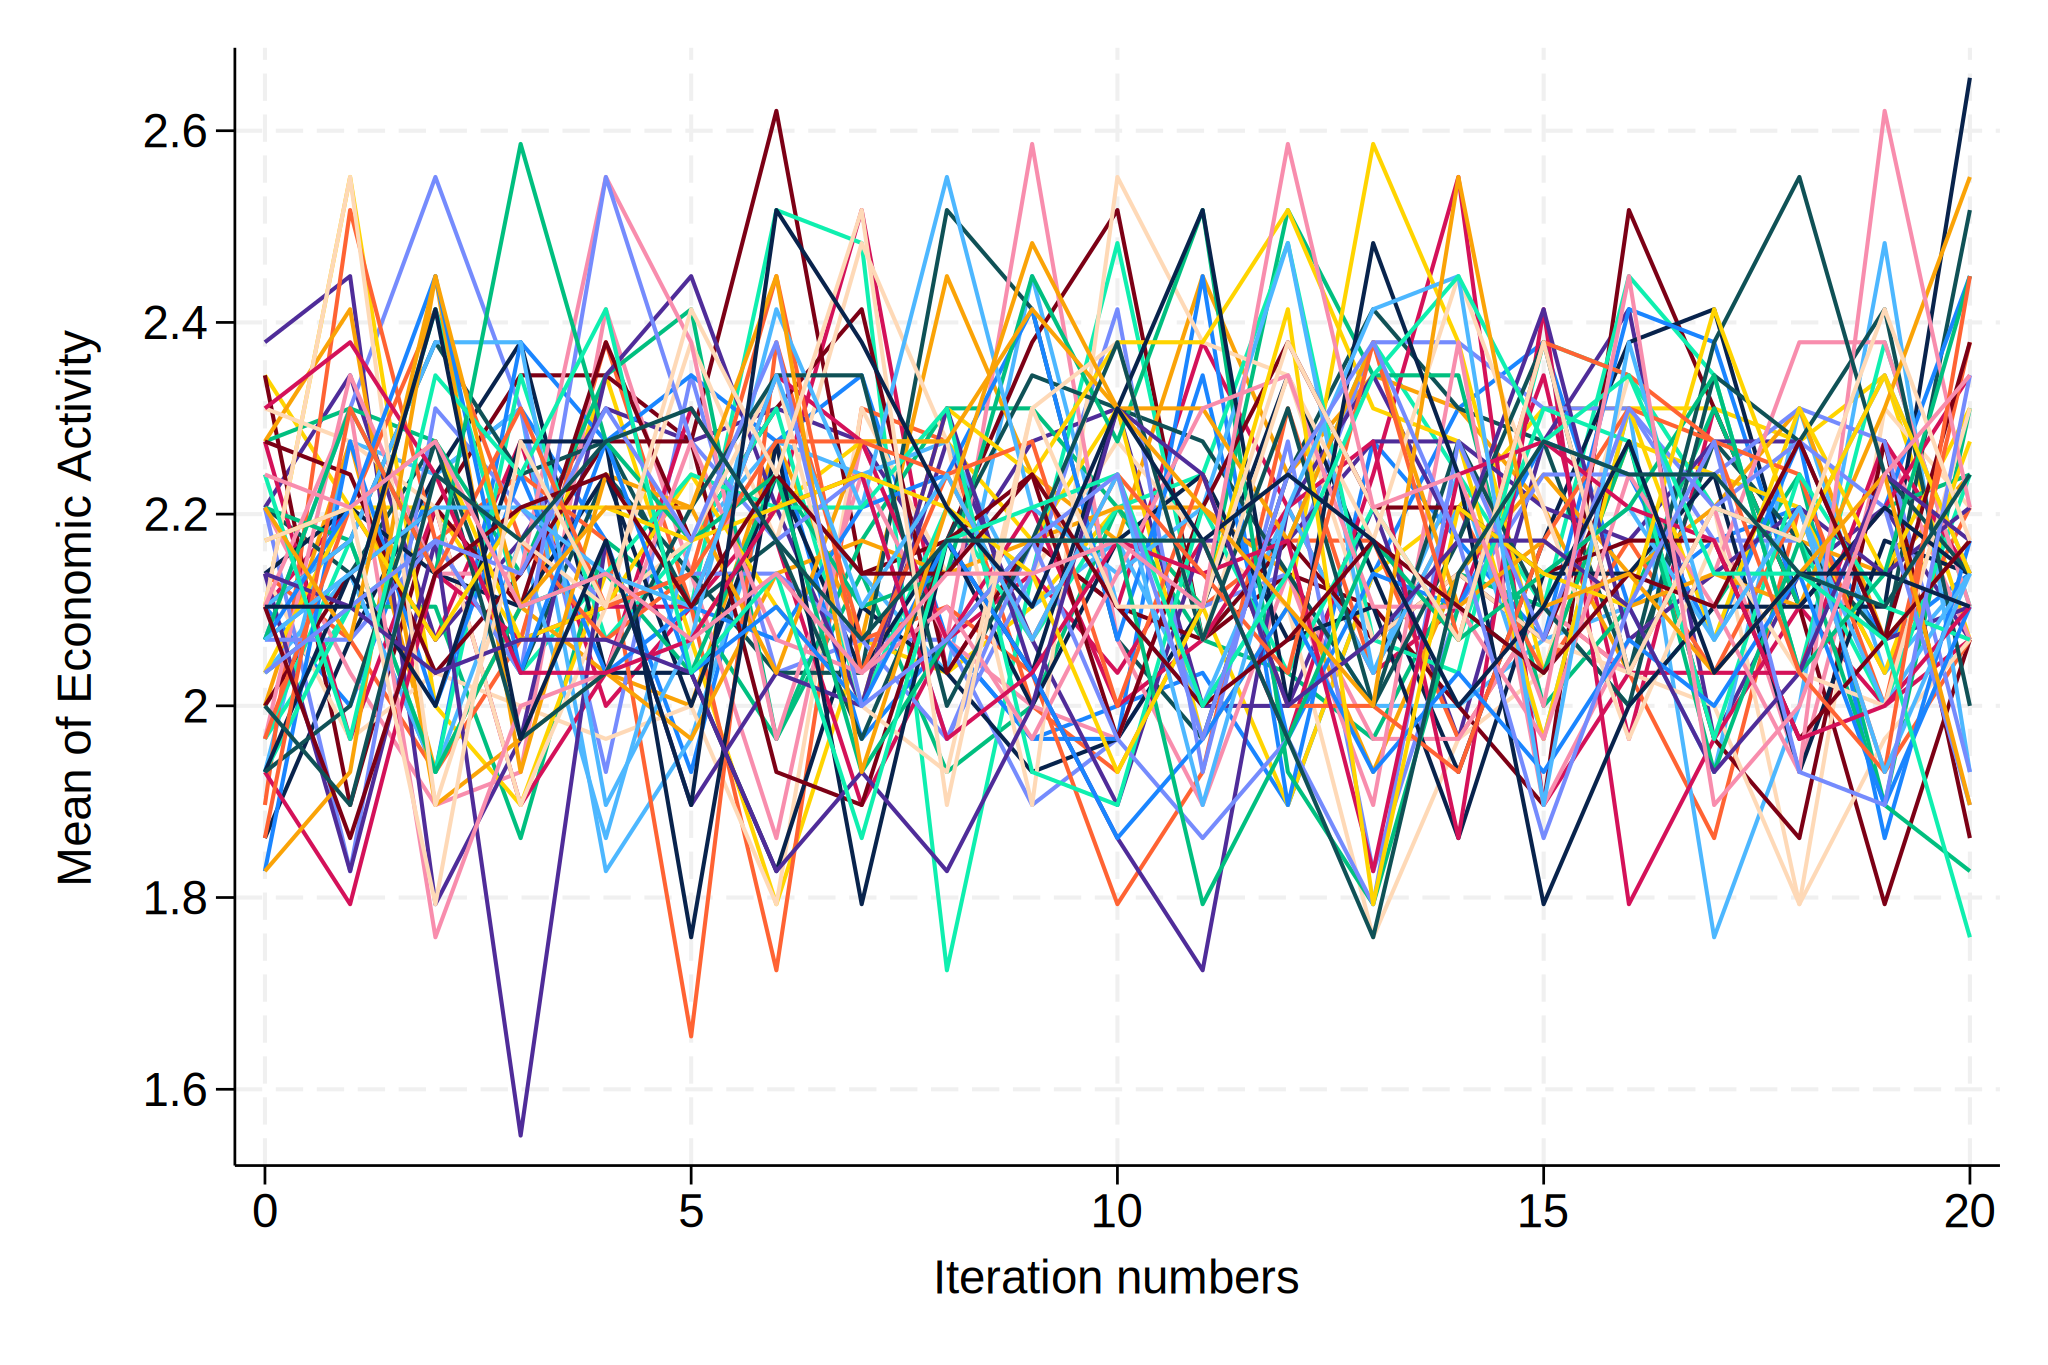

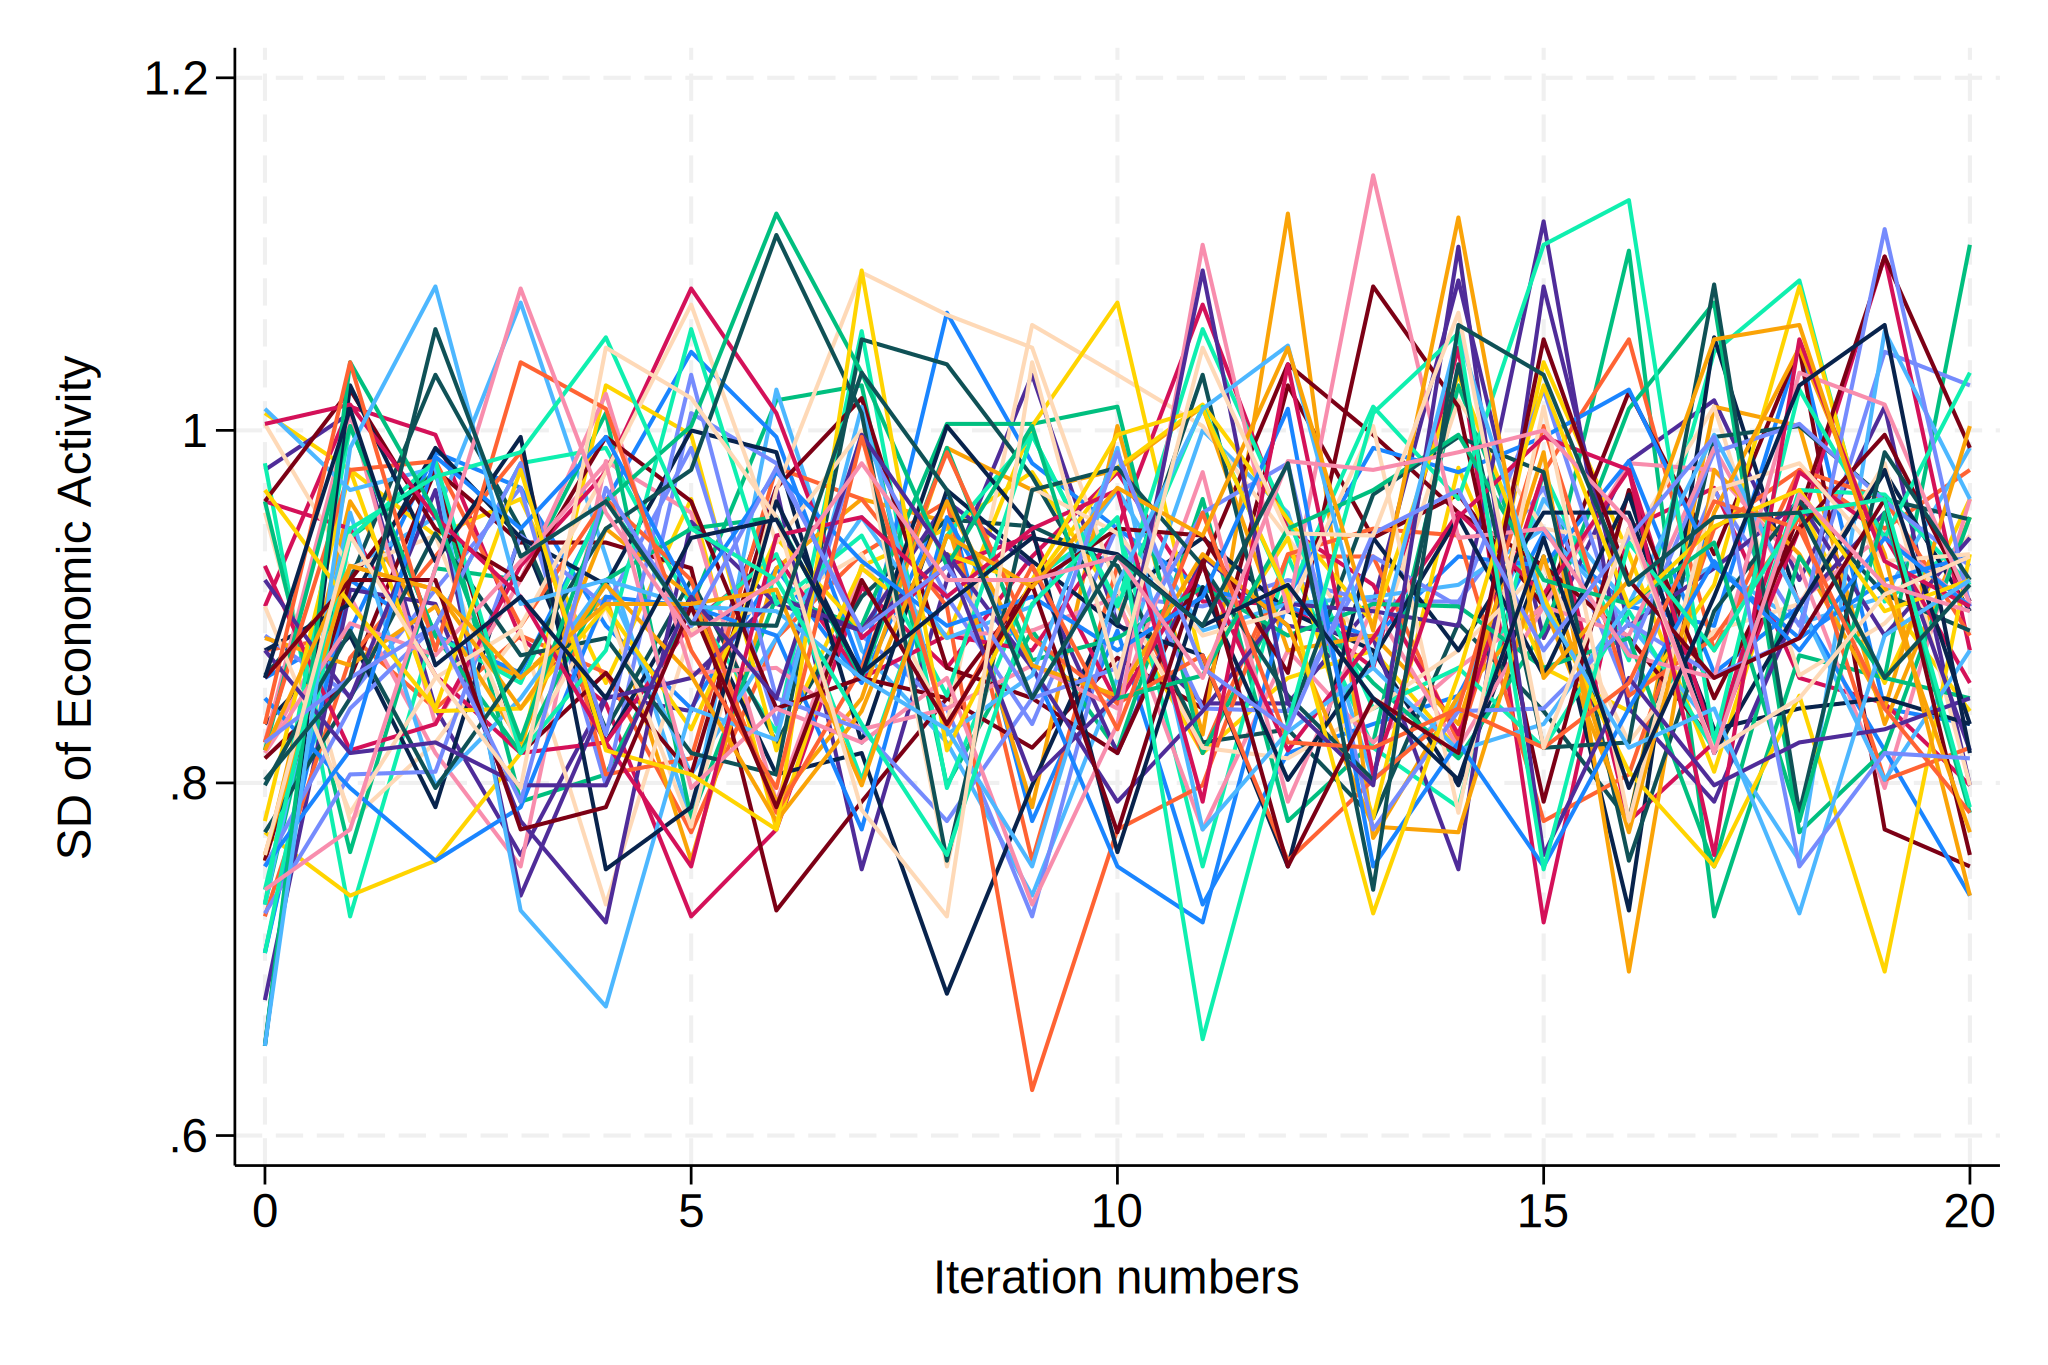

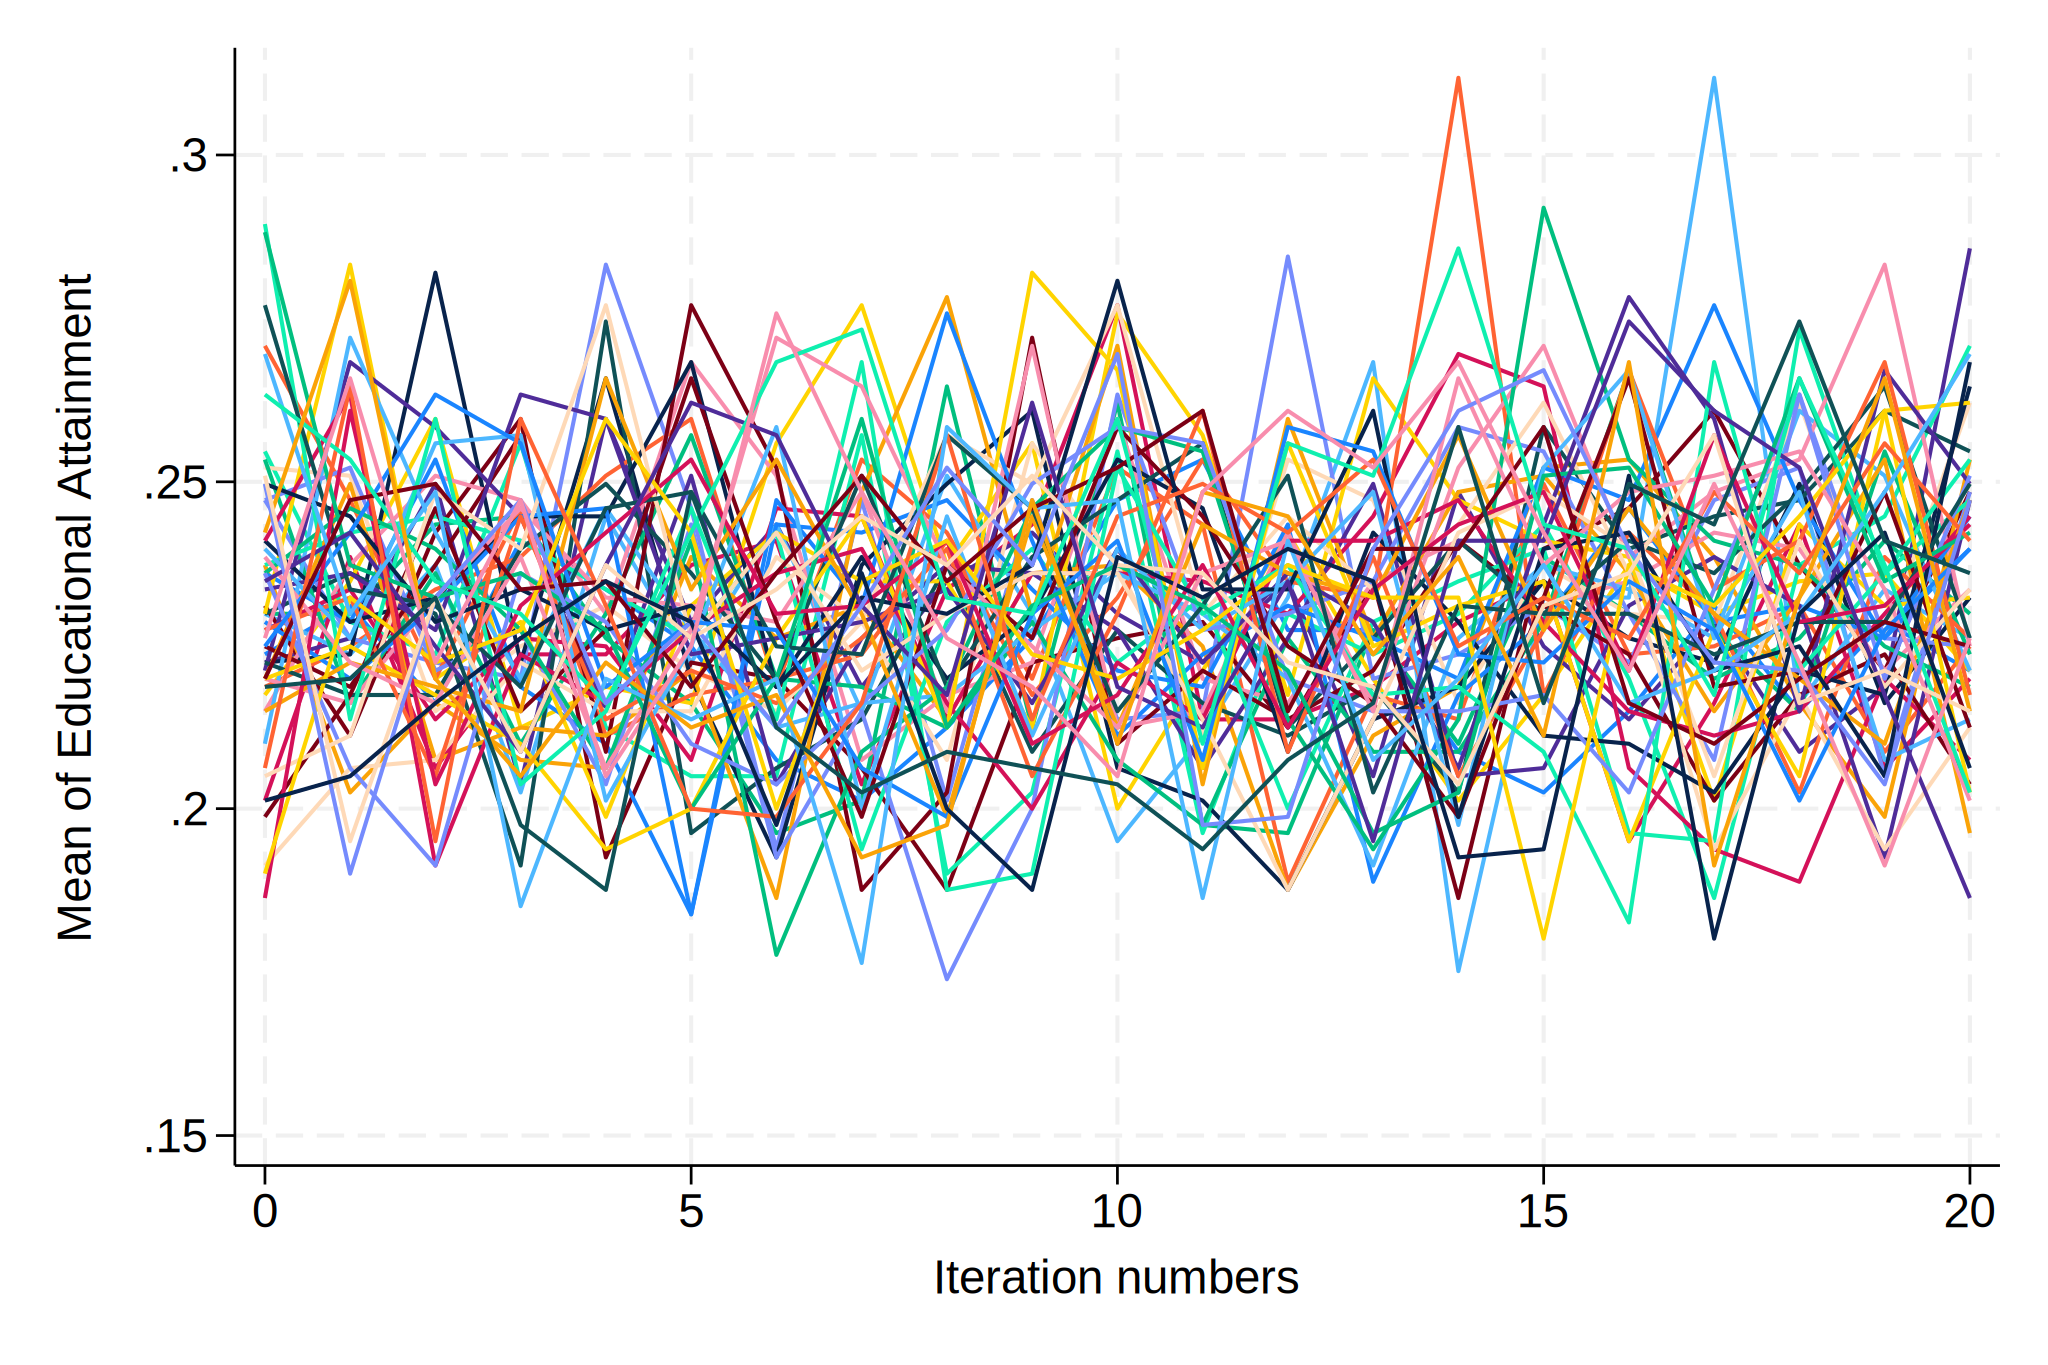

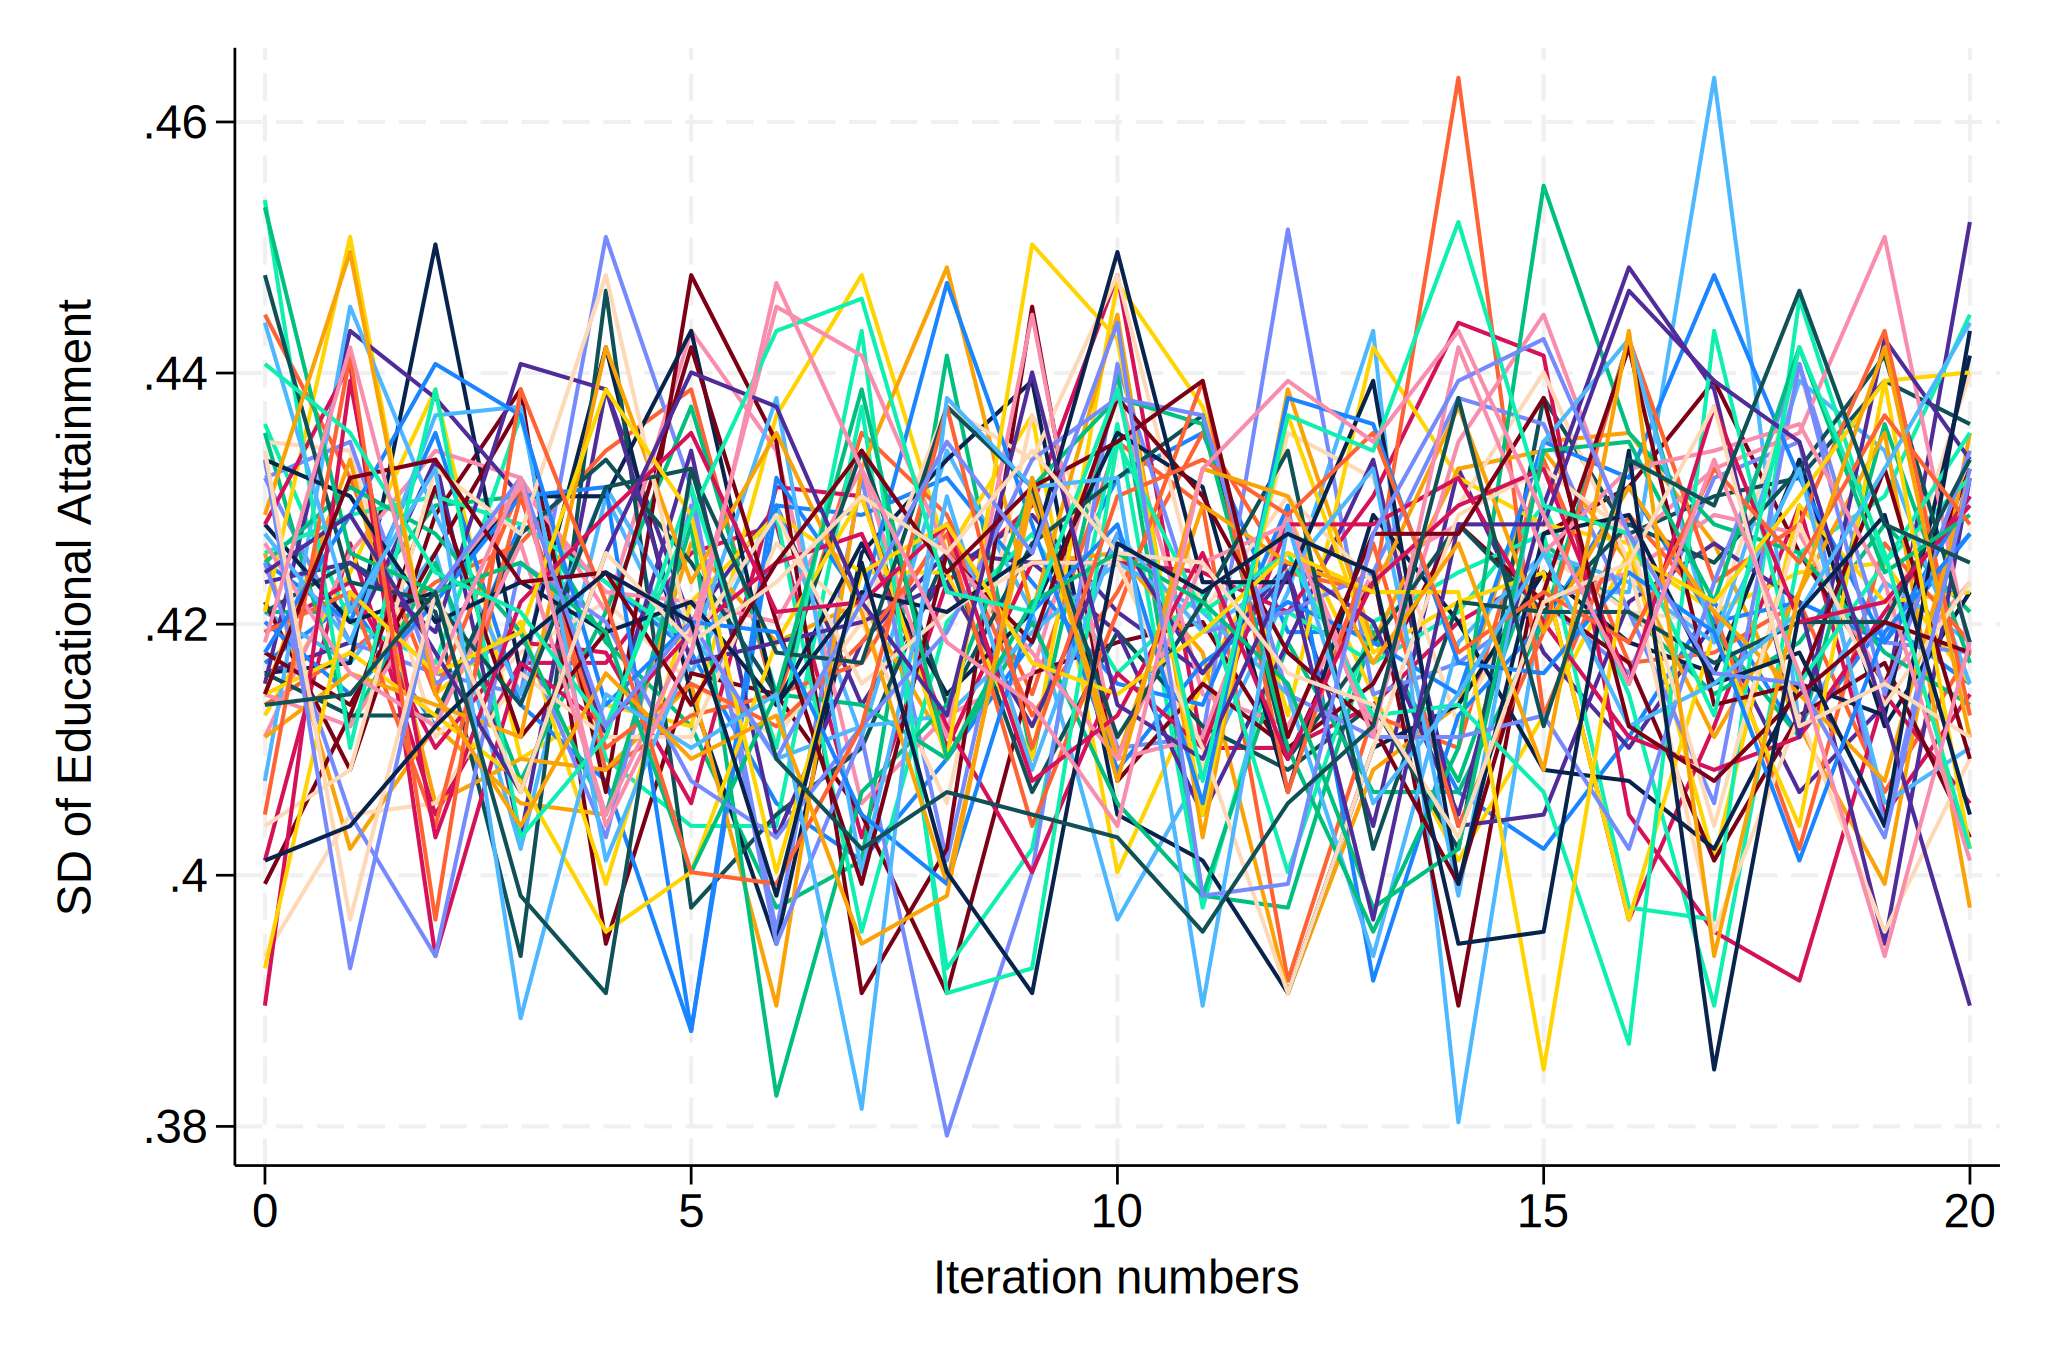

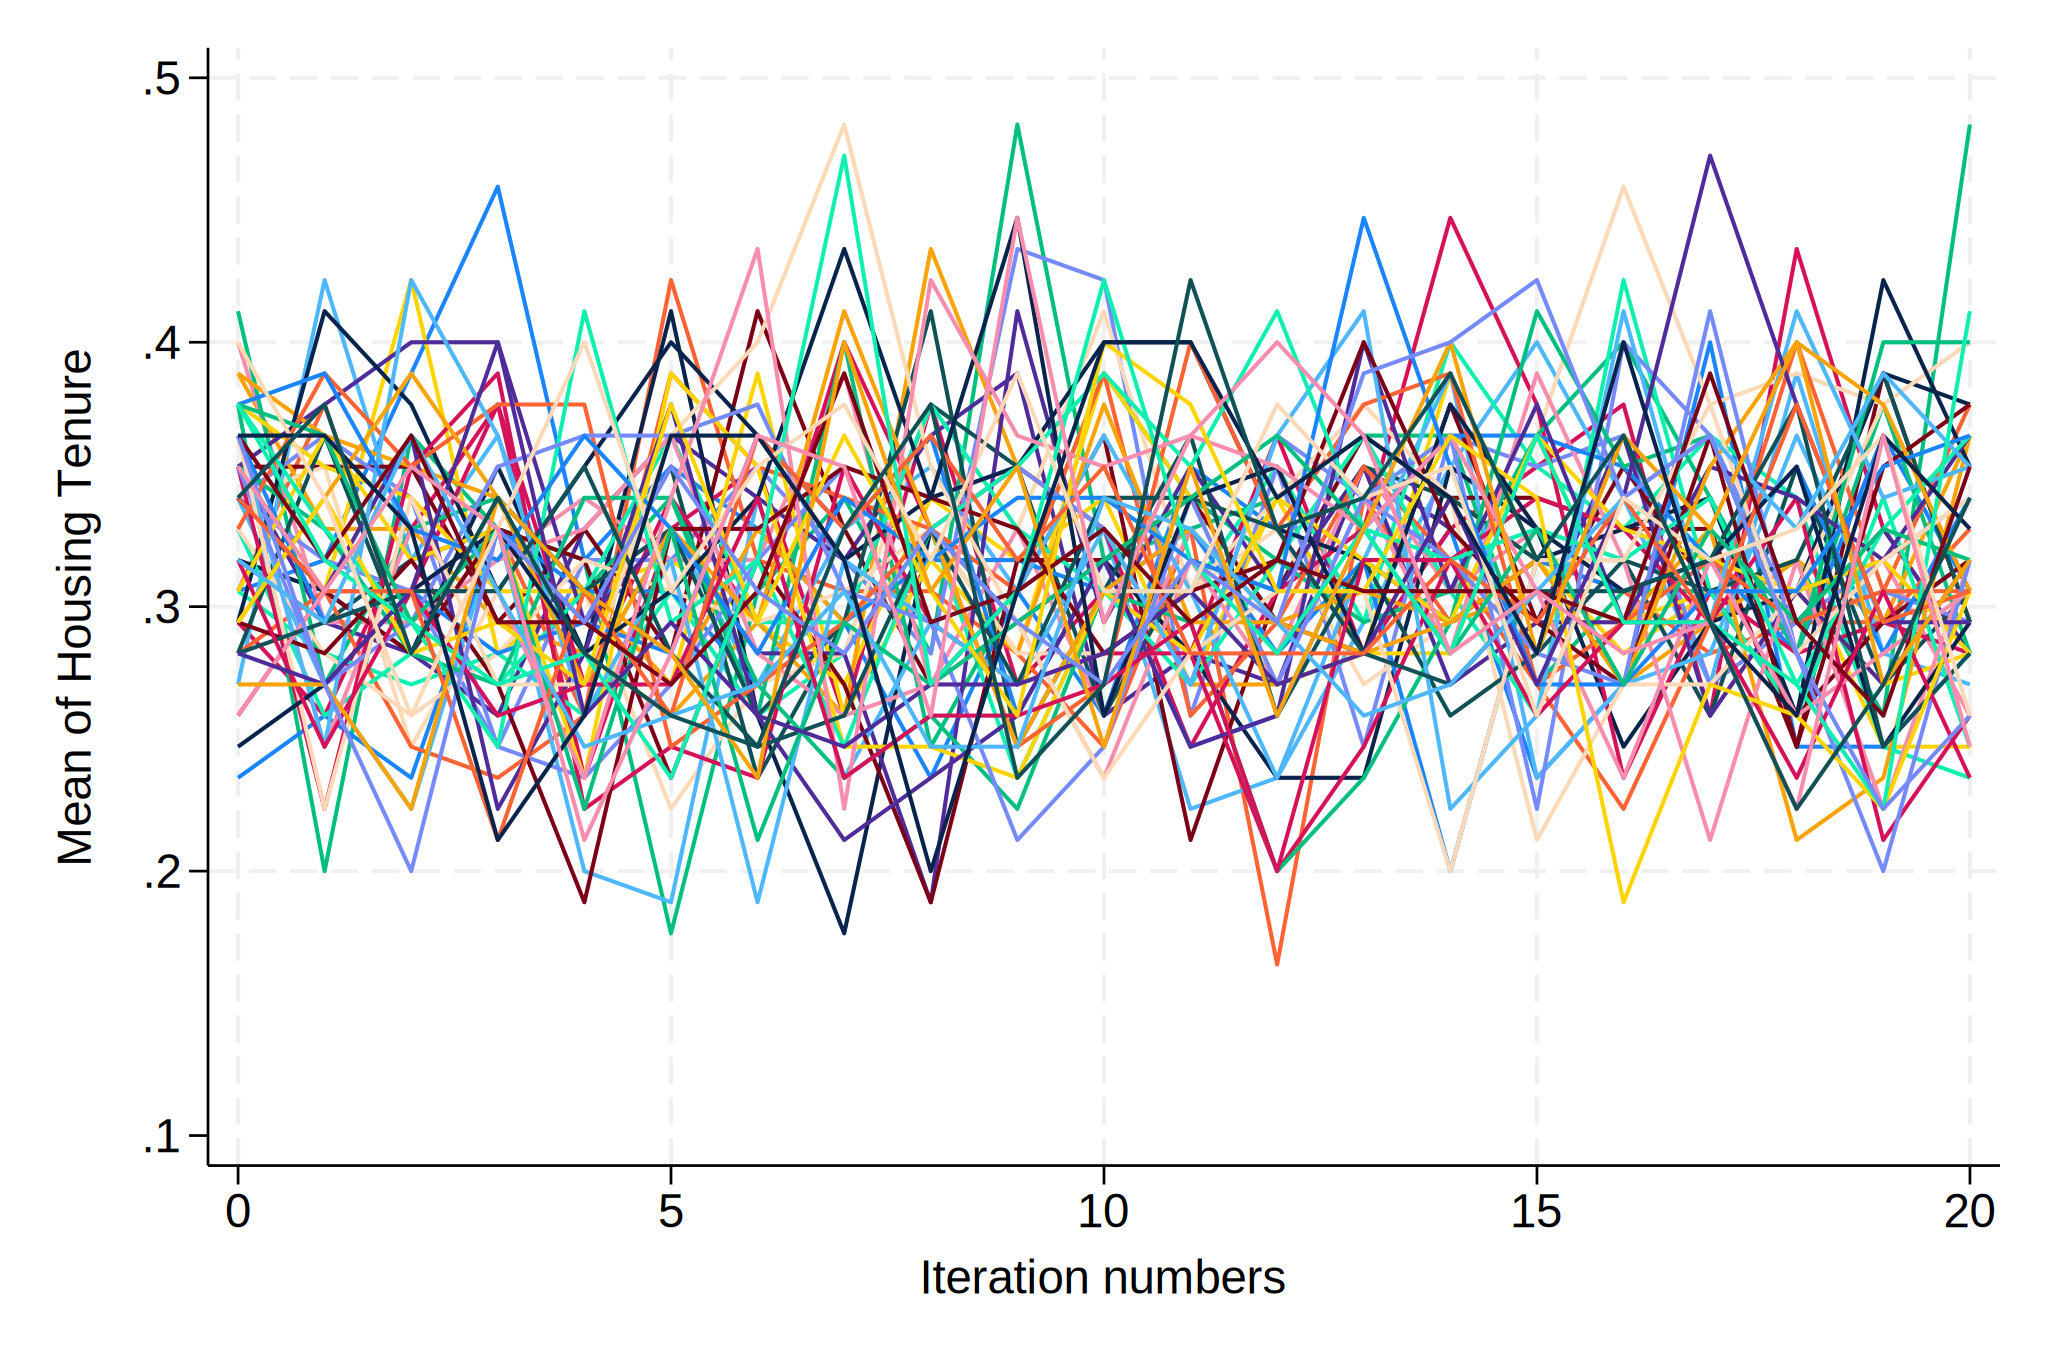

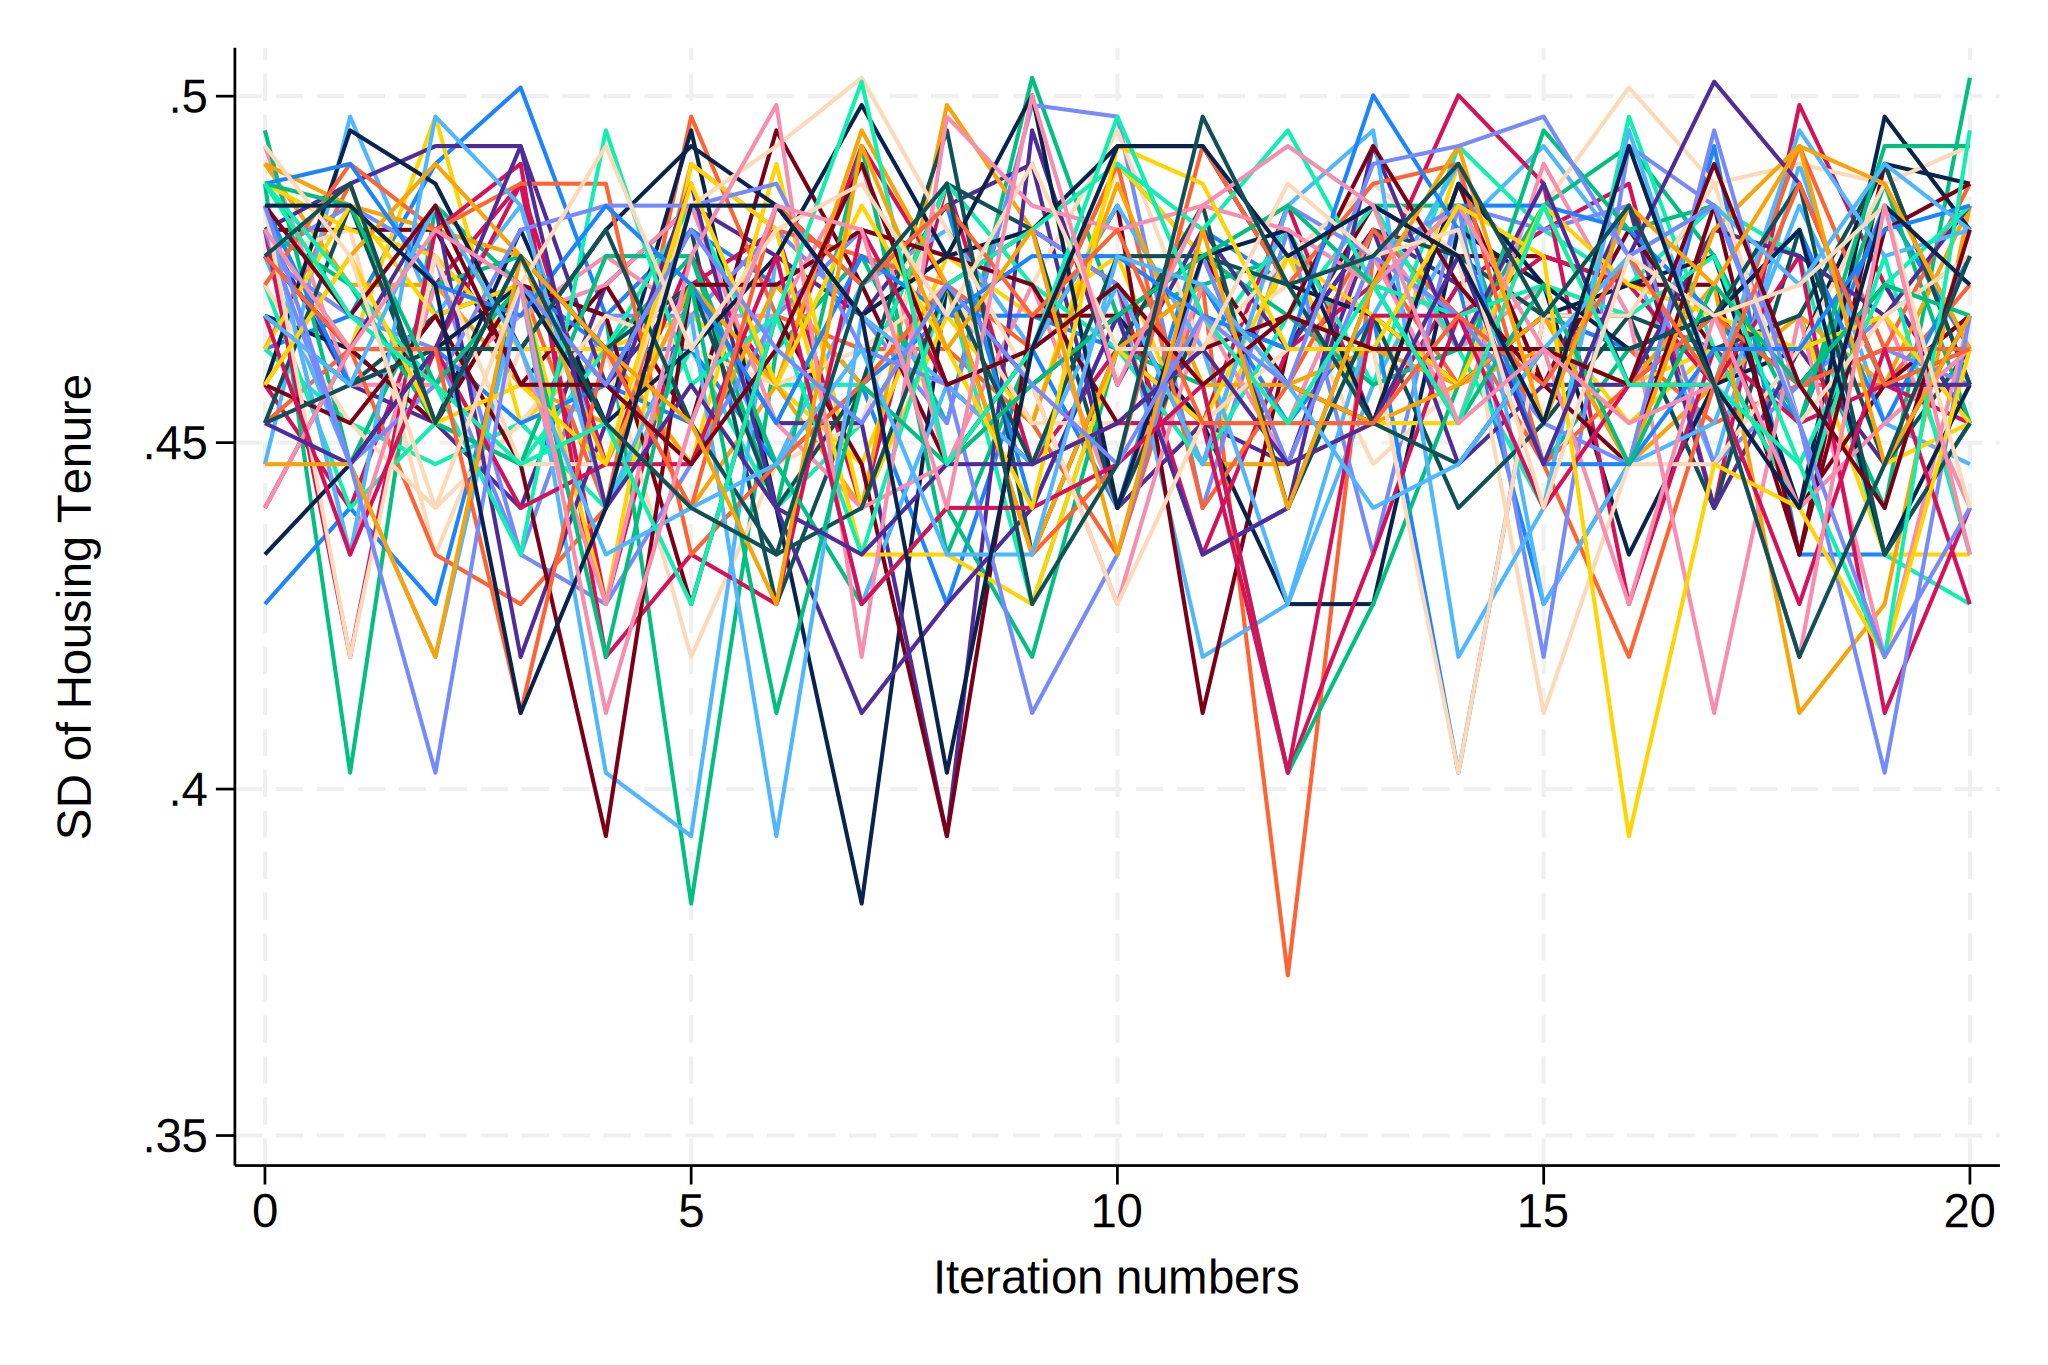

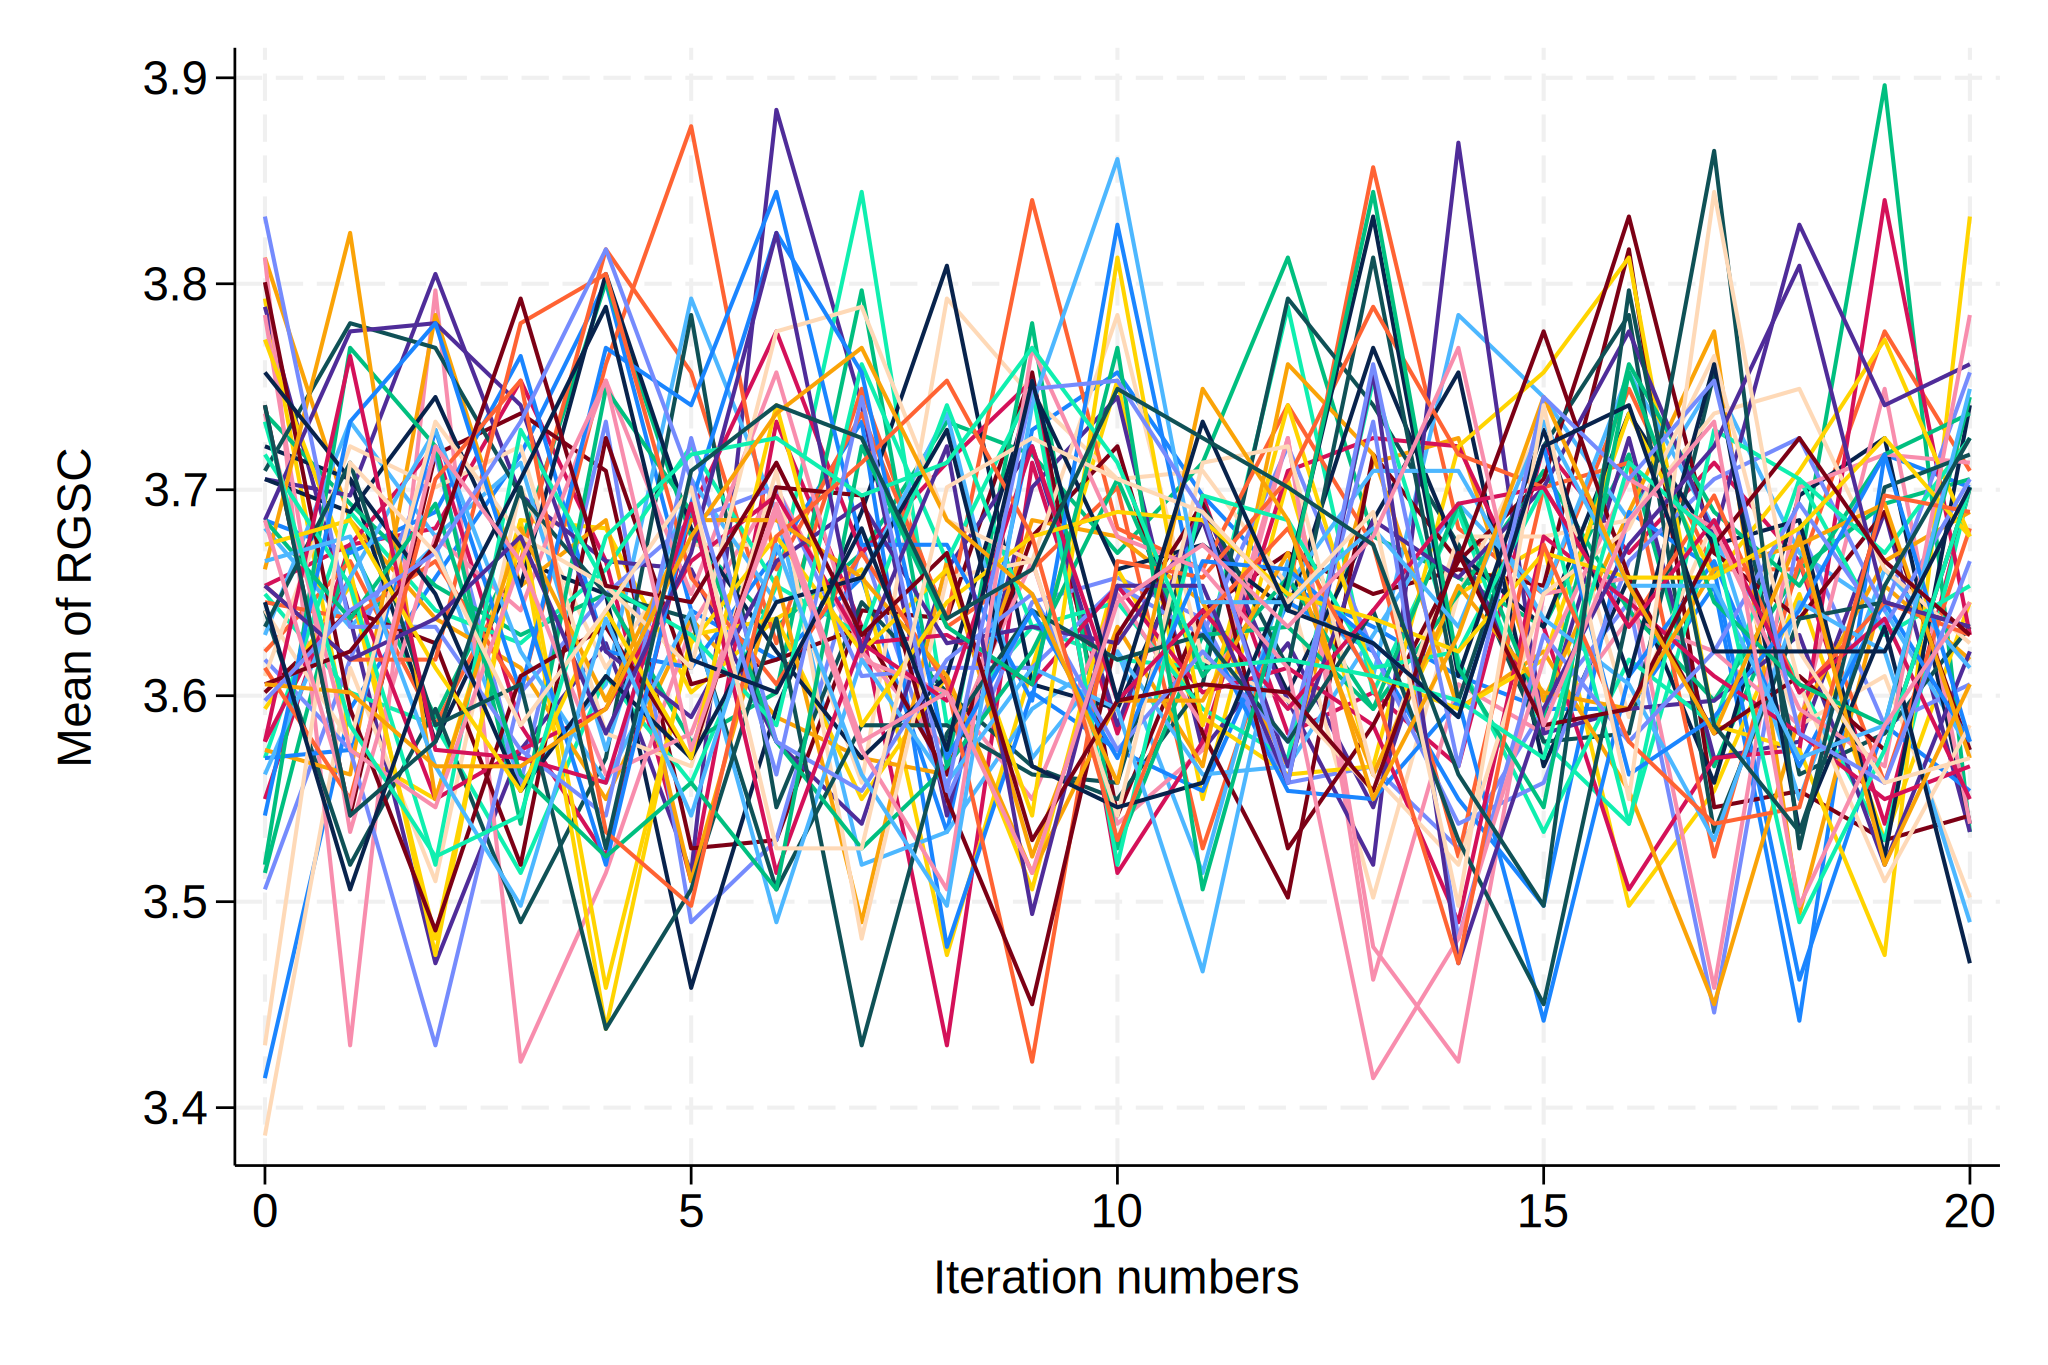

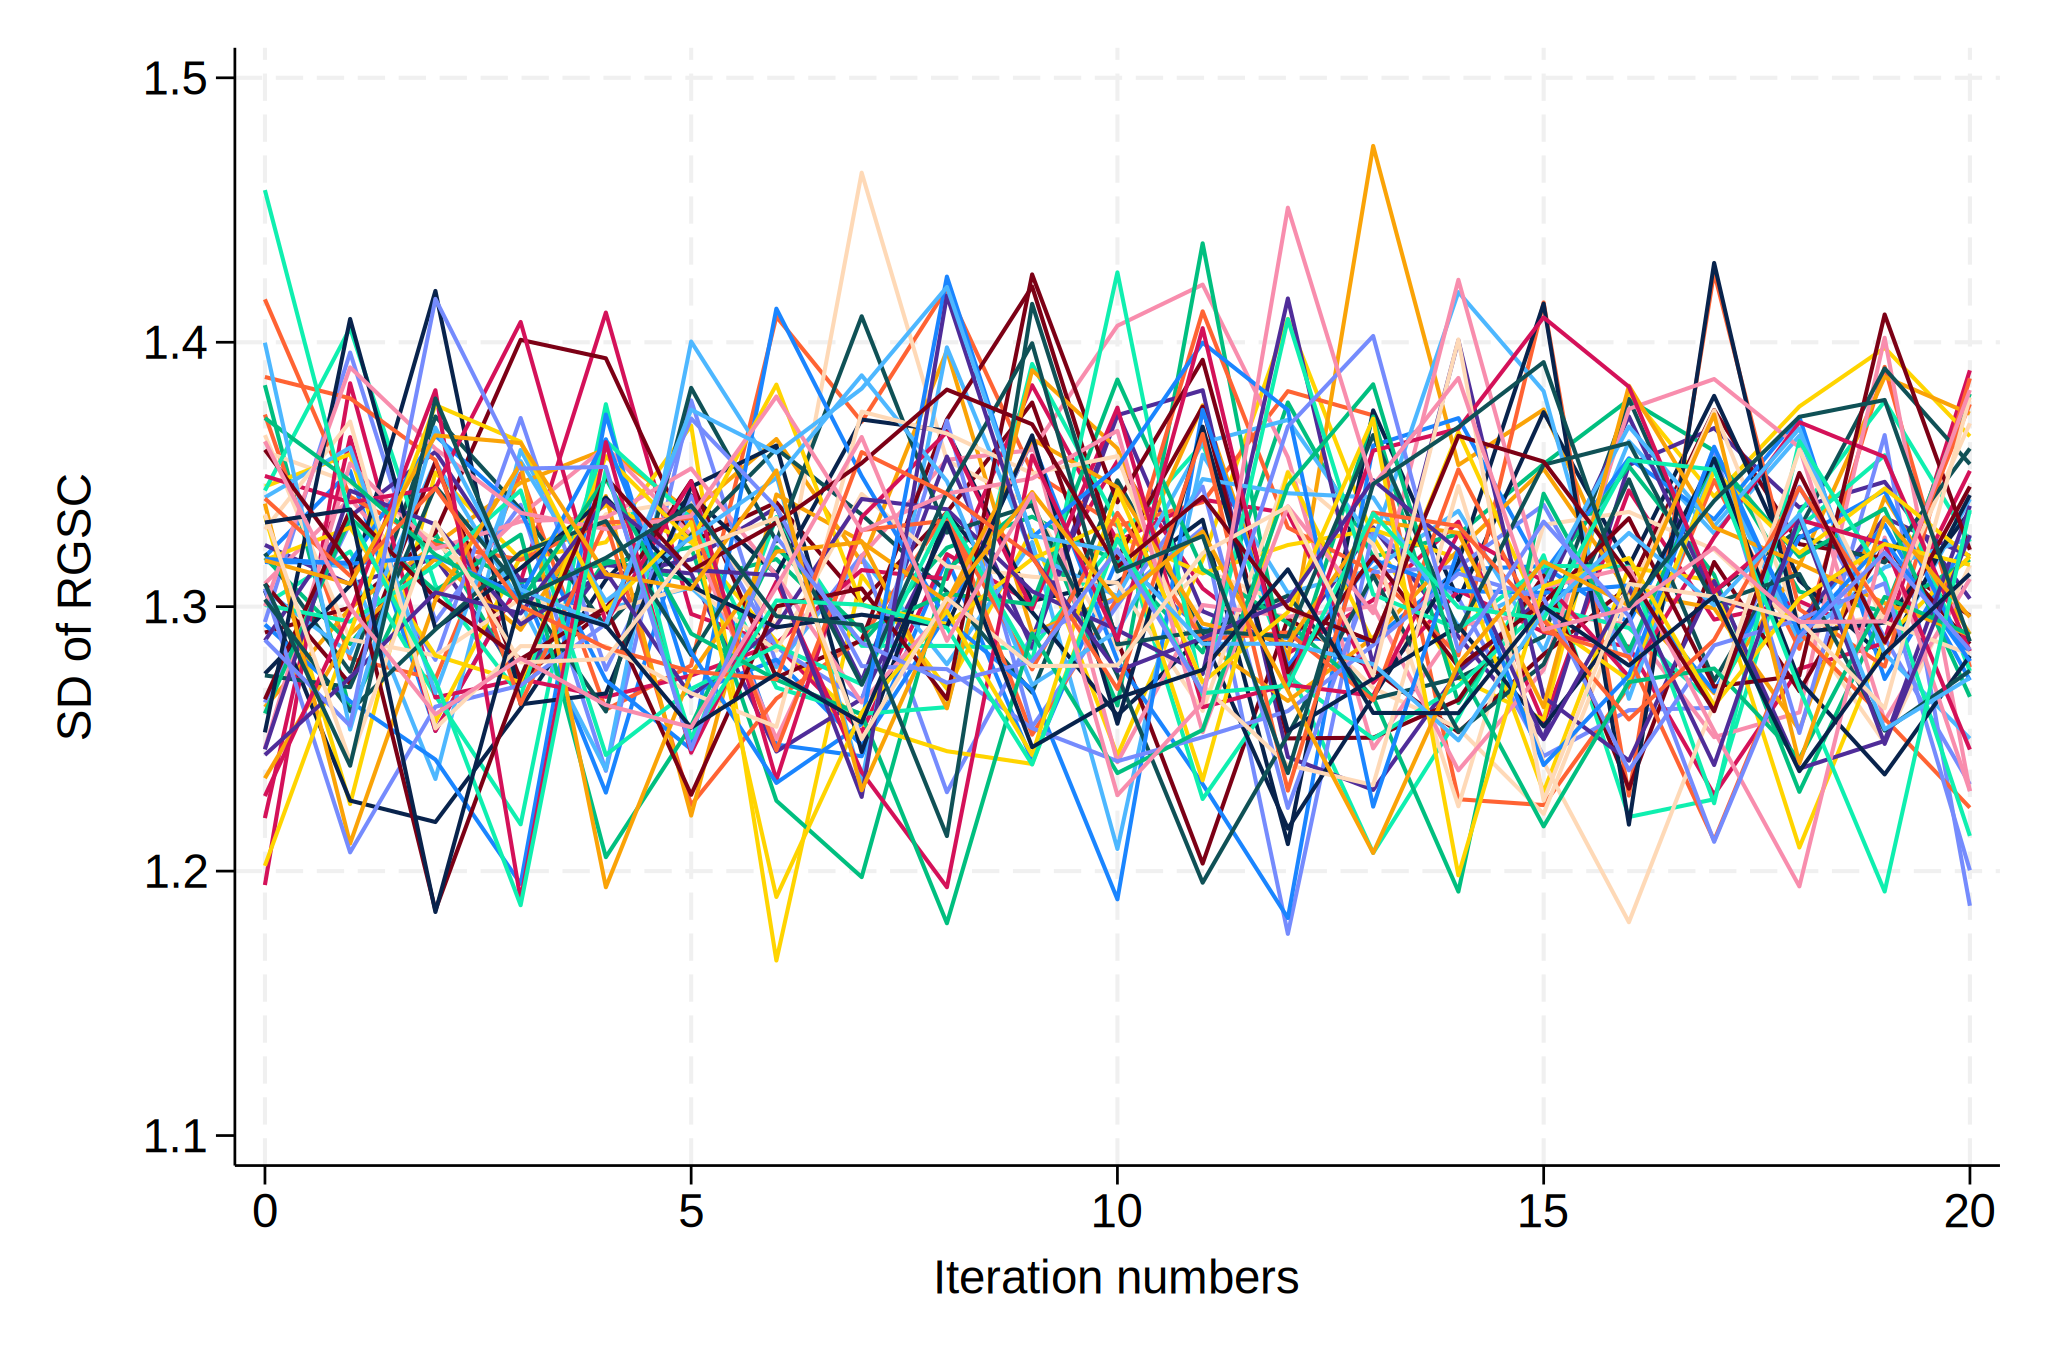

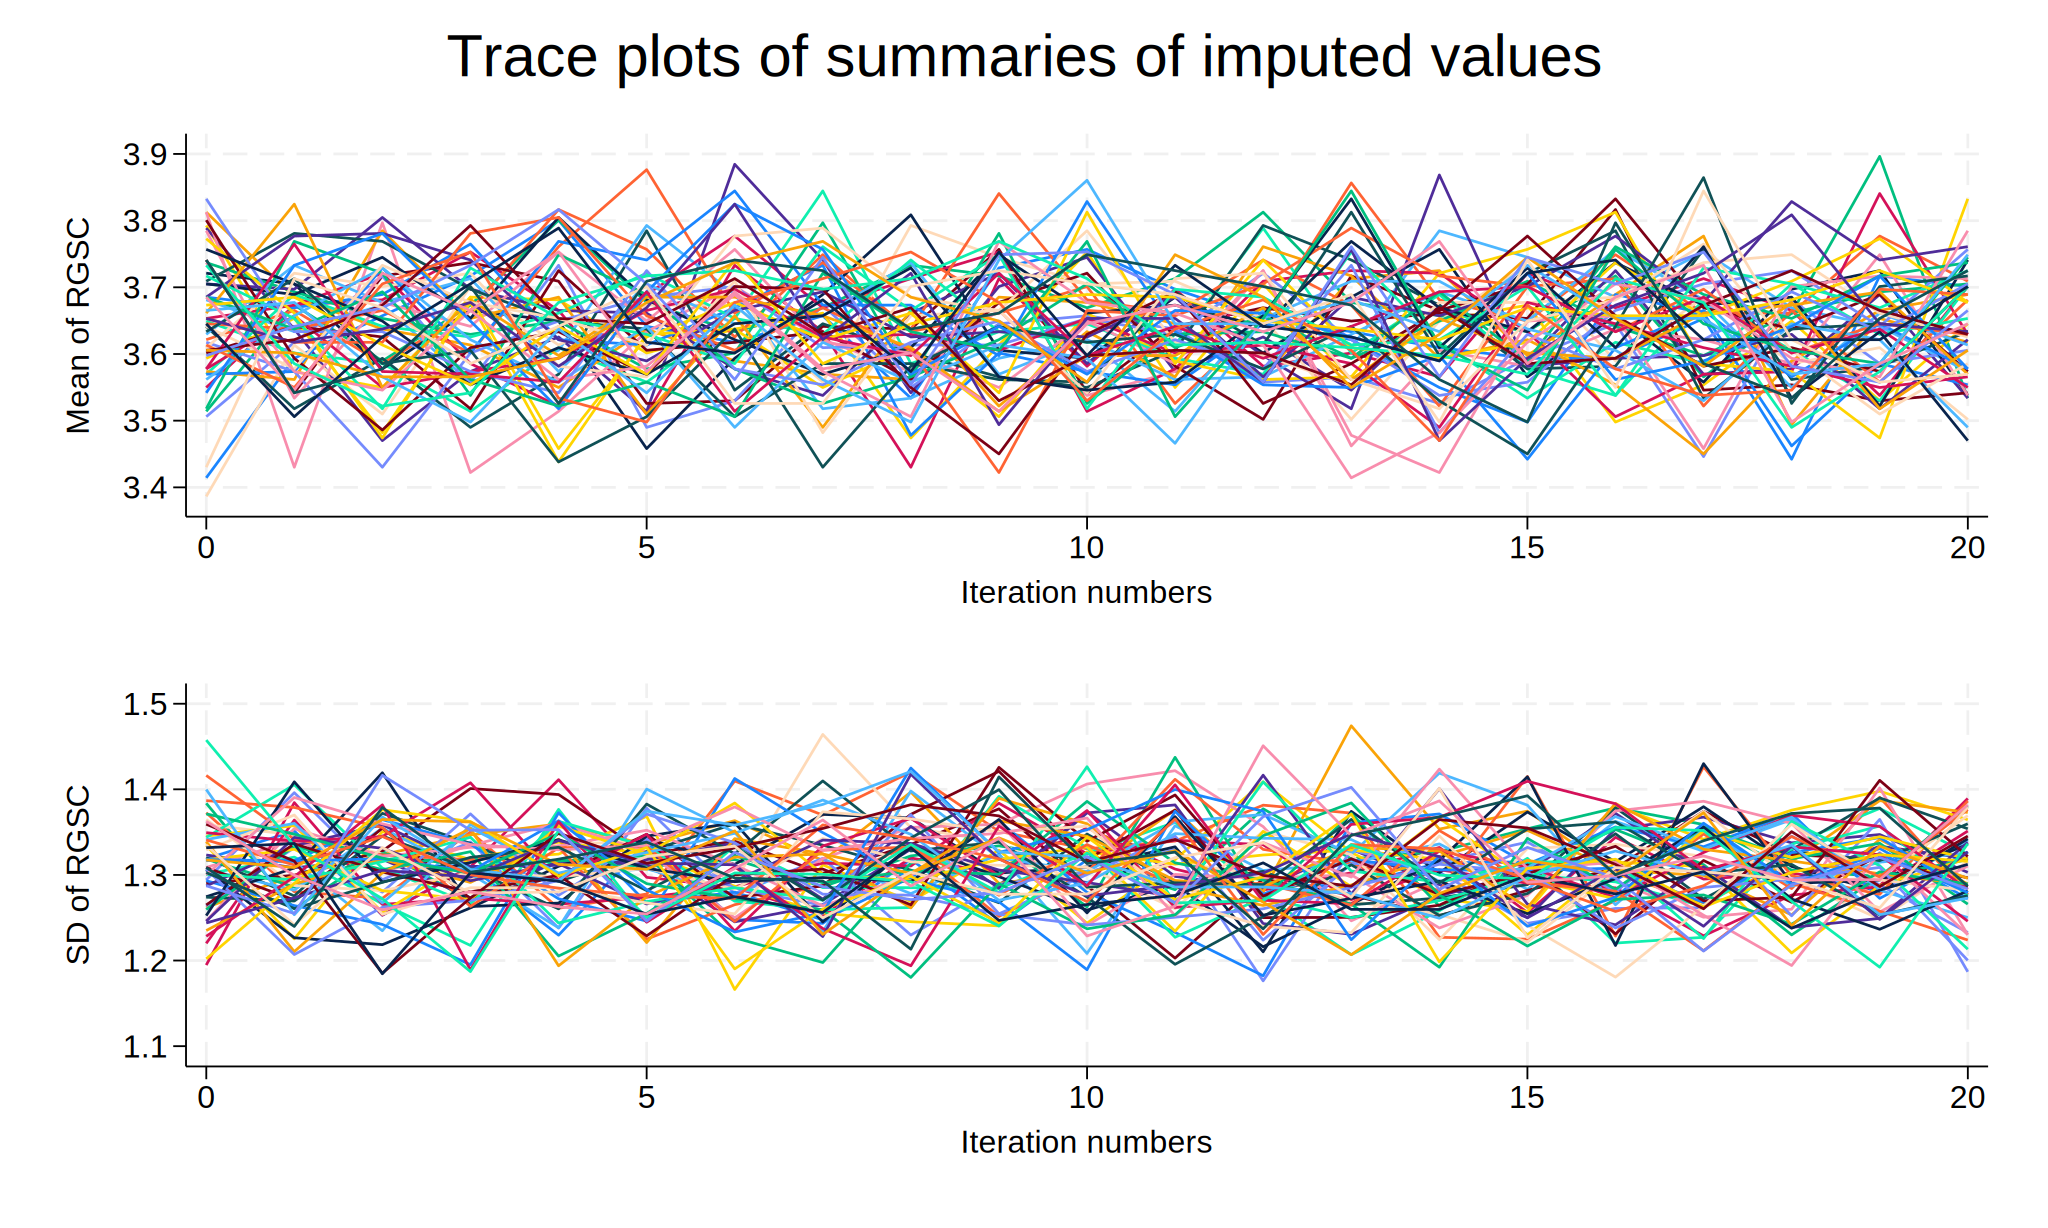

In [52]:
%%stata

use "G:\Stata data and do\BCS\subsample_testimpute"

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

reshape wide *mean *sd, i(iter) j(m)
tsset iter

tsline econ201_mean*, name(mice1,replace)legend(off) ytitle("Mean of Economic Activity")
tsline econ201_sd*, name(mice2, replace) legend(off) ytitle("SD of Economic Activity")
graph combine mice1 mice2, xcommon cols(1) title(Trace plots of summaries of imputed values)
graph save "miecon201.gph", replace

tsline obin_mean*, name(mice3,replace)legend(off) ytitle("Mean of Educational Attainment")
tsline obin_sd*, name(mice4, replace) legend(off) ytitle("SD of Educational Attainment")
graph combine mice3 mice4, xcommon cols(1) title(Trace plots of summaries of imputed values)
graph save "mied.gph", replace

tsline htenure_mean*, name(mice7,replace)legend(off) ytitle("Mean of Housing Tenure")
tsline htenure_sd*, name(mice8, replace) legend(off) ytitle("SD of Housing Tenure")
graph combine mice7 mice8, xcommon cols(1) title(Trace plots of summaries of imputed values)
graph save "mitenure.gph", replace

tsline rgscdom_mean*, name(mice9,replace)legend(off) ytitle("Mean of RGSC")
tsline rgscdom_sd*, name(mice10, replace) legend(off) ytitle("SD of RGSC")
graph combine mice9 mice10, xcommon cols(1) title(Trace plots of summaries of imputed values)
graph save "mirgsc.gph", replace
